In [7]:
import os
from glob import glob
import json
from random import shuffle
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
from PIL import ImageFont
import random
import numpy as np
from tqdm.autonotebook import tqdm 
import random 
from utils_datasets import get_font, get_samples

fonts = glob("fonts/**.ttf")
font_names = open("fonts/font_names.txt", 'r').read().splitlines()
font_colors = ["black"]
font_colors_ar = ["اسود"]

font_names_en = ['diwani decorated', 'diwani diacritized', 'diwani long', 'diwani standard',
                'kufi standard', 'kufi curved suqare', 'farisi standard', 'morrocan andulus',
                'rukaa bold', 'rukaa standard', 'rukaa fast', 'thuluth diwani', 'thuluth standard'
                ,'square standard', 'free bold', 'free standard', 'free long', 'mobili', 'managa'
                , 'aljazeera']

/var/tmp/ipykernel_26433/3086967925.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
!rm -r data_1m_mulfont_64x64_en_brown_no_scale

In [12]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
udev             42G     0   42G   0% /dev
tmpfs           8.4G  688M  7.7G   9% /run
/dev/sda1       246G  126G  111G  54% /
tmpfs            42G  136K   42G   1% /dev/shm
tmpfs           5.0M     0  5.0M   0% /run/lock
tmpfs            42G     0   42G   0% /sys/fs/cgroup
/dev/sda15      124M   11M  114M   9% /boot/efi
tmpfs           8.4G     0  8.4G   0% /run/user/1001
calliargen      1.0P     0  1.0P   0% /home/alyafey22/improved-diffusion/calliargen


In [13]:
max_words = 50000
W, H = (64, 64)

train_samples, valid_samples, test_samples = get_samples(max_words = max_words)
dataset = {'train': train_samples, 'valid': valid_samples, 'test': test_samples}

features = []
i = 0
path_to_data = f"data_1m_mulfont_{W}x{H}_en_brown_no_scale"
os.mkdir(path_to_data)
os.mkdir(f"{path_to_data}/valid")
os.mkdir(f"{path_to_data}/train")
os.mkdir(f"{path_to_data}/test")

In [14]:
from utils_datasets import get_font_fixed_scale
capts = {}
pbar = tqdm(total=max_words*20)
for split in dataset:
    for _, word in enumerate(dataset[split]):
        for _, font_type in enumerate(fonts):
            w, h = (W, H)
            #choose background and resize
            bg = np.random.choice(glob('fonts-bgs/06.jpg'))
            img = Image.open(bg)
            img = img.resize((W, H))
            #choose a font color
            font_color = np.random.choice(font_colors)
            font_color_ar = font_colors_ar[font_colors.index(font_color)]
            #get font description
            ft_idx = int(font_type[6:-4]) - 1
            font_name = font_names[ft_idx]
            #insert space
            if random.random() < 0.01 and len(word) > 2:
                rnd_idx = random.randint(1, len(word) - 1)
                word = word[:rnd_idx] + ' ' + word[rnd_idx:]

            draw = ImageDraw.Draw(img)
            font, w, h, x, y = get_font_fixed_scale(draw, word, font_type, width = W, height = H, margins =(10, 10))
            if font is None:
                continue
            draw.text((x, y), word, (0, 0, 0), font)
            file_name = f"{word}_{i:05d}"
            img.save(f"{path_to_data}/{split}/{file_name}.png")
            capts[file_name] = font_names_en[ft_idx]
            open(f"{path_to_data}/{split}/{file_name}.txt", 'w').write(word)
            i += 1
            pbar.update(1) 

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [15]:
capts[list(capts.keys())[0]]
with open(f"{path_to_data}/capts.json", "w") as fp:
    json.dump(capts,fp) 

In [22]:
"hello"

In [18]:
base_path = f"{path_to_data}/train"
for i, img_name in enumerate(os.listdir(base_path)):
    key, _ = img_name.split('.')
    print(image_name)
    if img_name.endswith(".png"):
        txt = open(f"{base_path}/{img_name[:-4]}.txt", "r").read()
        capt = capts.get(key)
        print(txt)
        print(capt)
        im = Image.open(f"{base_path}/{img_name}")
        plt.imshow(im)
        plt.show()
        if i > 50:
            break

العدول
rukaa fast


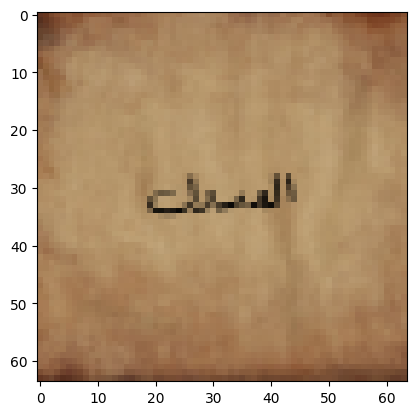

جهودكم
kufi standard


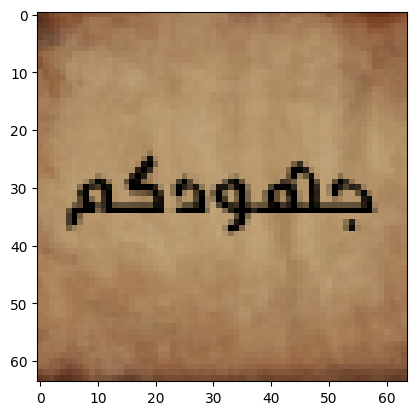

مصنعي
free standard


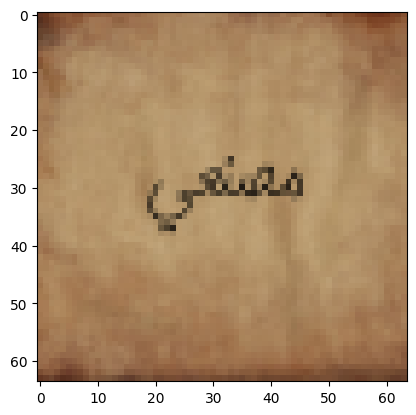

للمتطوعين
thuluth standard


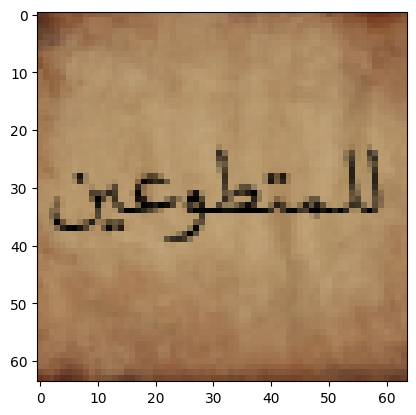

يعظكم
aljazeera


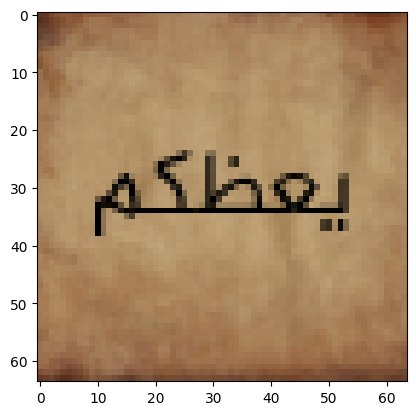

روايات
free bold


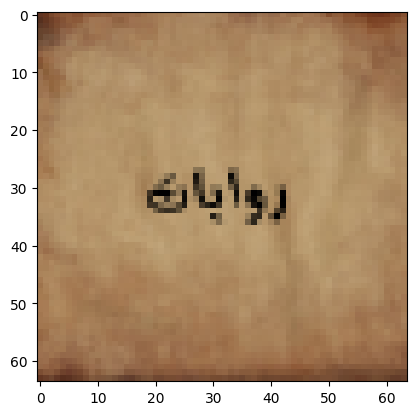

الوجبات
diwani standard


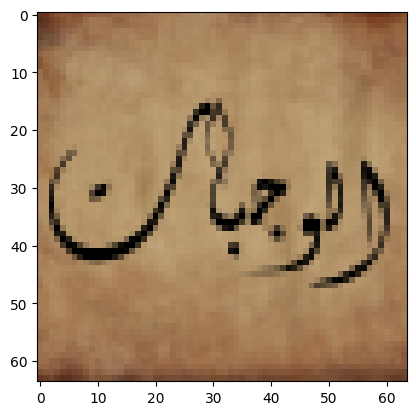

برشاقة
square standard


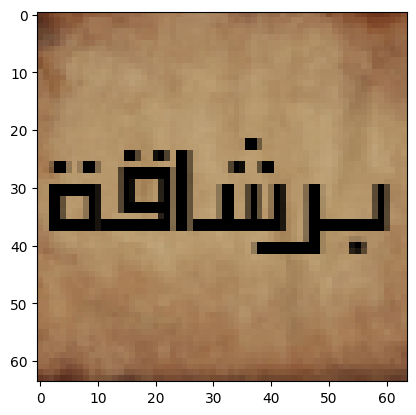

بنجامين
rukaa standard


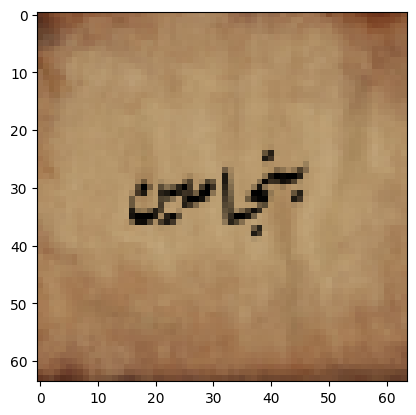

و سنه
diwani long


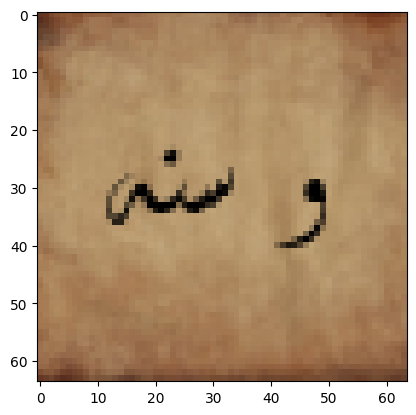

ودمارا
unknown


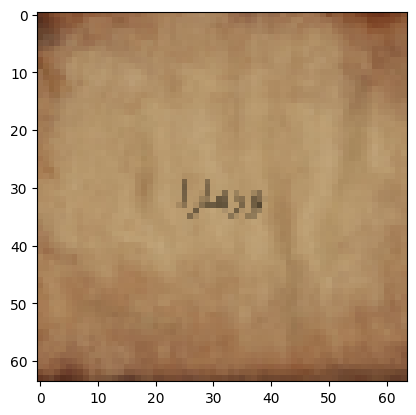

نطرح
diwani standard


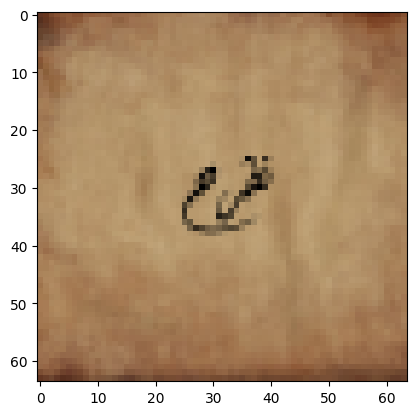

وبوسطن
unknown


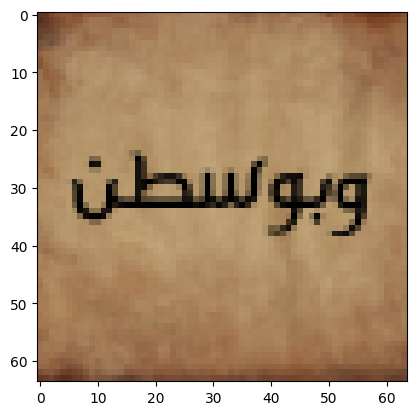

يقدم
diwani decorated


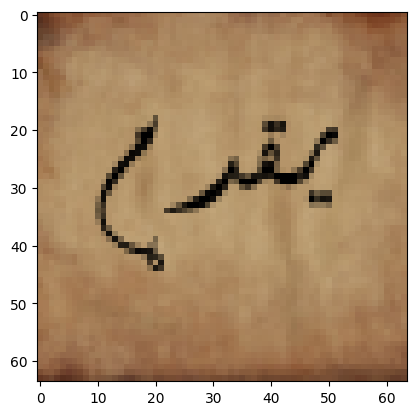

وضعوا
free standard


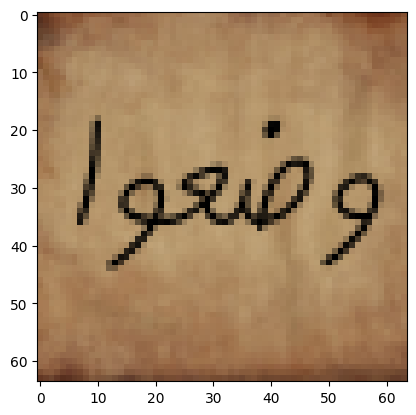

بتوعية
farisi standard


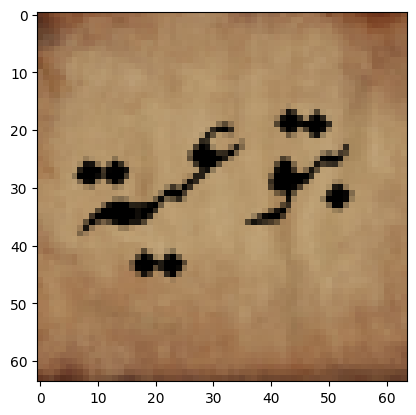

سوزان
unknown


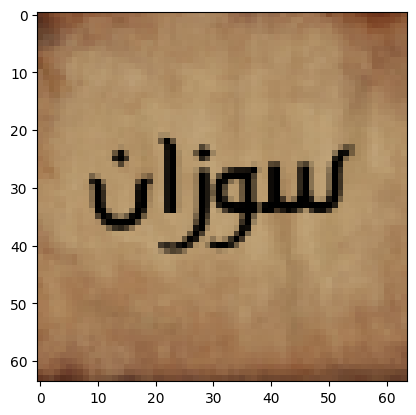

وجدار
free standard


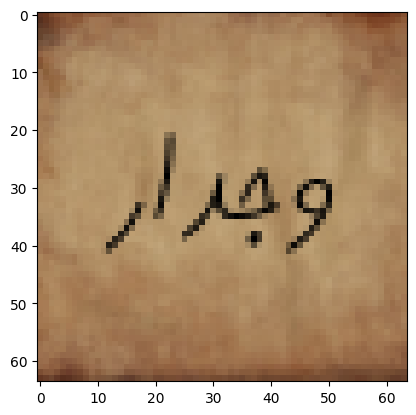

وسكينة
free bold


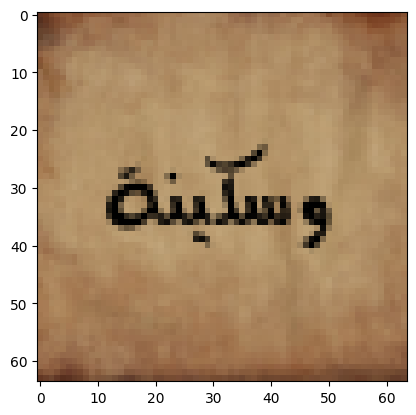

وجهي
rukaa standard


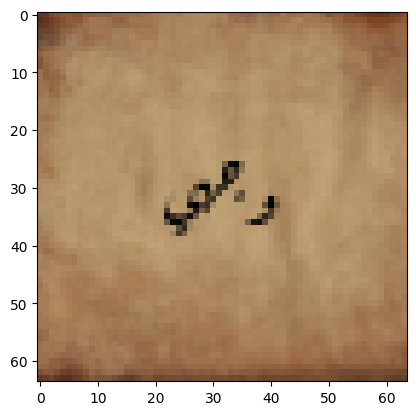

تتحرك
free bold


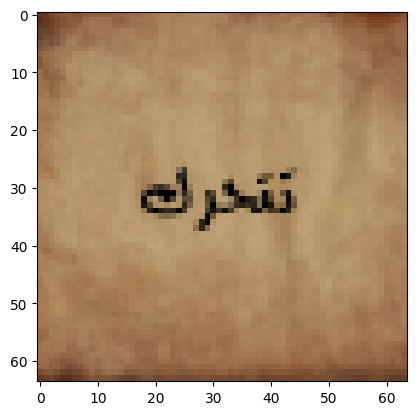

تلكؤ
free bold


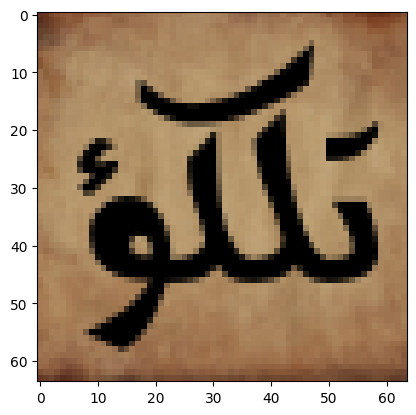

الدخان
rukaa standard


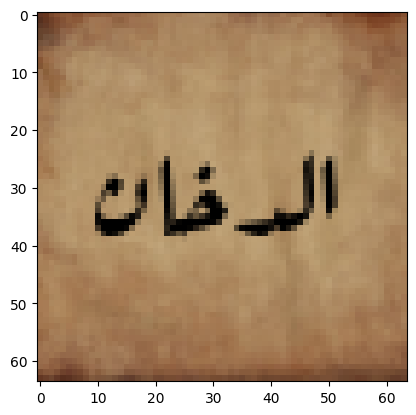

لينهارت
morrocan andulus


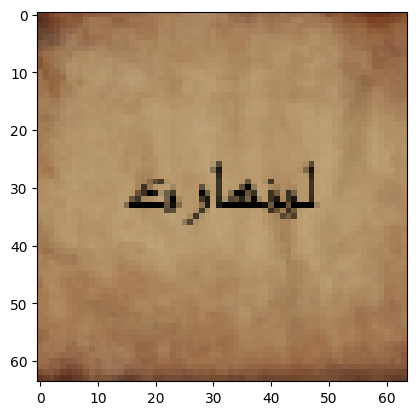

قتيلين
morrocan andulus


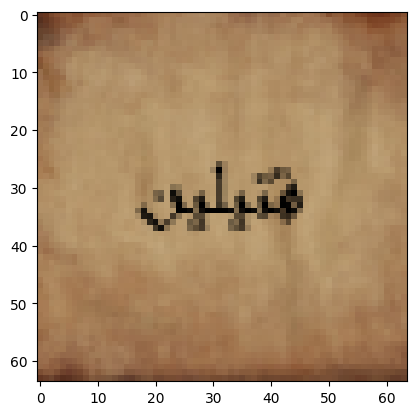

ليتني
thuluth diwani


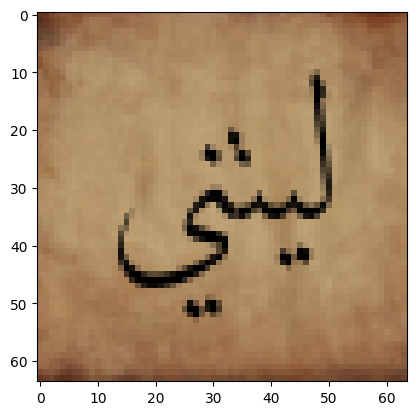

و يحو ره
free standard


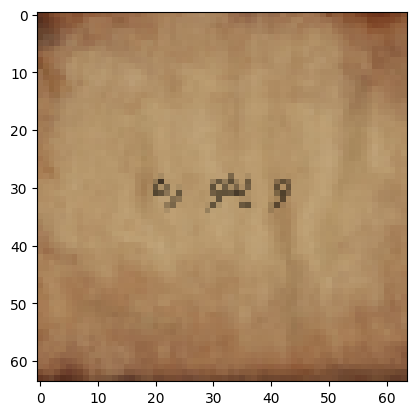

النفسى
rukaa fast


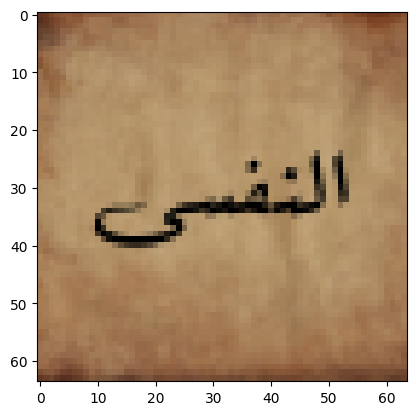

قلقة
square standard


مطلعها
thuluth standard


حلقاته
thuluth diwani


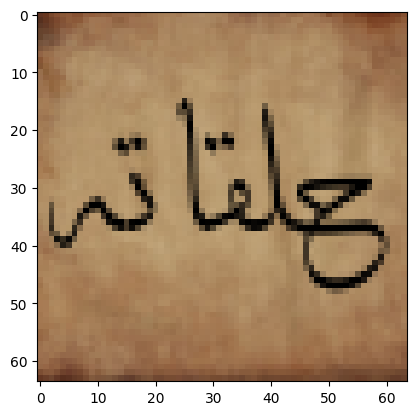

للتمديد
unknown


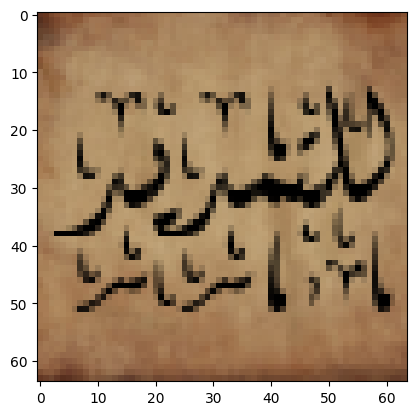

للجماهير
rukaa standard


تذق
kufi standard


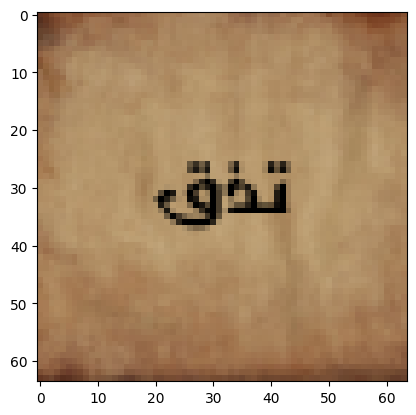

In [11]:
import os
base_path = f"../first_batch"
for i, img_name in enumerate(os.listdir(base_path)):
    key, _ = img_name.split('.')    
    if img_name.endswith(".png"):
        txt = open(f"{base_path}/{img_name[:-4]}.txt", "r").read()
        capt = open(f"{base_path}/{img_name[:-4]}_capt.txt", "r").read()
        print(txt)
        print(capt)
        im = Image.open(f"{base_path}/{img_name}")
        plt.imshow(im)
        plt.show()
        if i > 100:
            break

In [7]:
!pip install huggingface_hub

In [8]:
from huggingface_hub import login
login()

Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as default.

git config --global credential.helper store

Read https://git-scm.com/book/en/v2/Git-Tools-Credential-Storage for more details.
Token has not been saved to git credential helper.
Your token has been saved to /home/alyafey22/.cache/huggingface/token
Login successful


In [10]:
from huggingface_hub import HfApi
api = HfApi()

In [11]:
api.upload_folder(
    folder_path=path_to_data,
    repo_id="arbml/CalliFontMedium",
    repo_type="dataset",
)

آلف_91921.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

آلف_91922.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

آلف_91920.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

آلف_91924.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

Upload 99938 LFS files:   0%|          | 0/99938 [00:00<?, ?it/s]

آلف_91923.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

آلف_91925.png:   0%|          | 0.00/5.96k [00:00<?, ?B/s]

آلف_91927.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

آلف_91926.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

آلف_91929.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

آلف_91928.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

آلف_91930.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

آلف_91931.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

آلف_91932.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

آلف_91933.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

آلف_91934.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

آلف_91935.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

آلف_91936.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

آلف_91937.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

آلف_91938.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

آلف_91939.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

أثب تته_98044.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

أثب تته_98045.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أثب تته_98046.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

أثب تته_98047.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أثب تته_98048.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

أثب تته_98049.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

أثب تته_98050.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

أثب تته_98051.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

أثب تته_98052.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أثب تته_98053.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

أثب تته_98054.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

أثب تته_98055.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

أثب تته_98056.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

أثب تته_98057.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

أثبتته_98038.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

أثبتته_98039.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أثبتته_98041.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

أثبتته_98040.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أثبتته_98042.png:   0%|          | 0.00/7.65k [00:00<?, ?B/s]

أثبتته_98043.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

أجل ت_93839.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

أجلت_93821.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

أجلت_93820.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

أجلت_93822.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

أجلت_93823.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

أجلت_93824.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

أجلت_93825.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

أجلت_93826.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أجلت_93827.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أجلت_93828.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أجلت_93829.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أجلت_93830.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

أجلت_93831.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أجلت_93832.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

أجلت_93833.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أجلت_93834.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

أجلت_93835.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

أجلت_93836.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

أجلت_93838.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

أجلت_93837.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

أركان_92940.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

أركان_92941.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

أركان_92942.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

أركان_92943.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

أركان_92944.png:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

أركان_92945.png:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

أركان_92946.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

أركان_92947.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

أركان_92948.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أركان_92949.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

أركان_92950.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

أركان_92951.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أركان_92952.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

أركان_92953.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

أركان_92954.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

أركان_92955.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

أركان_92956.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

أركان_92957.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

أركان_92958.png:   0%|          | 0.00/8.44k [00:00<?, ?B/s]

أركان_92959.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أشكاله_96219.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

أشكاله_96220.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

أشكاله_96221.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أشكاله_96222.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

أشكاله_96223.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

أشكاله_96224.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

أشكاله_96225.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

أشكاله_96226.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

أشكاله_96227.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

أشكاله_96228.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أشكاله_96229.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

أشكاله_96230.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

أشكاله_96231.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

أشكاله_96232.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

أشكاله_96233.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

أشكاله_96234.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

أشكاله_96235.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

أشكاله_96236.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

أشكاله_96237.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

أشكاله_96238.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

أصداء_94659.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

أصداء_94660.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أصداء_94661.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

أصداء_94662.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

أصداء_94663.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

أصداء_94664.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

أصداء_94665.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

أصداء_94666.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أصداء_94667.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

أصداء_94668.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

أصداء_94669.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

أصداء_94670.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

أصداء_94671.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

أصداء_94672.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

أصداء_94673.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

أصداء_94674.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

أصداء_94675.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أصداء_94676.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

أصداء_94677.png:   0%|          | 0.00/8.36k [00:00<?, ?B/s]

أضاف_96939.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

أضاف_96940.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

أصداء_94678.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

أضاف_96941.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

أضاف_96942.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

أضاف_96943.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

أضاف_96944.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

أضاف_96945.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

أضاف_96946.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

أضاف_96947.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

أضاف_96948.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

أضاف_96949.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

أضاف_96950.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

أضاف_96951.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

أضاف_96952.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

أضاف_96953.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

أضاف_96954.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

أضاف_96955.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

أضاف_96956.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

أضاف_96957.png:   0%|          | 0.00/7.96k [00:00<?, ?B/s]

أضاف_96958.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

أغسطس_93120.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

أغسطس_93121.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

أغسطس_93122.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

أغسطس_93123.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

أغسطس_93124.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

أغسطس_93125.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

أغسطس_93126.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

أغسطس_93127.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

أغسطس_93128.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

أغسطس_93129.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

أغسطس_93130.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أغسطس_93131.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

أغسطس_93132.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

أغسطس_93134.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

أغسطس_93133.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

أغسطس_93135.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

أغسطس_93136.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

أغسطس_93137.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أغسطس_93138.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

أغسطس_93139.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أم ن_97481.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

أم ن_97482.png:   0%|          | 0.00/7.61k [00:00<?, ?B/s]

أم ن_97483.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

أم ن_97484.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أم ن_97485.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أم ن_97486.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

أم ن_97487.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

أم ن_97488.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أم ن_97490.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أم ن_97489.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أم ن_97491.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

أم ن_97492.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أم ن_97493.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

أم ن_97494.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

أم ن_97495.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

أم ن_97496.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

أم ن_97497.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أمس_99318.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

أمس_99319.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

أمس_99320.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

أمس_99321.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

أمس_99322.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

أمس_99323.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

أمس_99324.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

أمس_99325.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

أمس_99326.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

أمس_99327.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

أمس_99328.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

أمس_99329.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أمس_99330.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أمس_99331.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أمس_99332.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

أمس_99333.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

أمس_99334.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

أمس_99335.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

أمس_99336.png:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

أمس_99337.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

أمن_97478.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

أمن_97479.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

أمن_97480.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

أموالهم_92700.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

أموالهم_92701.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

أموالهم_92702.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أموالهم_92703.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

أموالهم_92704.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

أموالهم_92705.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

أموالهم_92706.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أموالهم_92707.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

أموالهم_92708.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

أموالهم_92709.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أموالهم_92710.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أموالهم_92711.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

أموالهم_92712.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

أموالهم_92713.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

أموالهم_92714.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

أموالهم_92715.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

أموالهم_92716.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

أموالهم_92717.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

أموالهم_92718.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

أموالهم_92719.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

أنا_93560.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

أنا_93561.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أنا_93562.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

أنا_93563.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

أنا_93564.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

أنا_93565.png:   0%|          | 0.00/5.42k [00:00<?, ?B/s]

أنا_93566.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

أنا_93567.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

أنا_93568.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

أنا_93569.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

أنا_93570.png:   0%|          | 0.00/5.78k [00:00<?, ?B/s]

أنا_93571.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

أنا_93573.png:   0%|          | 0.00/5.90k [00:00<?, ?B/s]

أنا_93572.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

أنا_93574.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

أنا_93575.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

أنا_93576.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

أنا_93577.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

أنا_93578.png:   0%|          | 0.00/7.73k [00:00<?, ?B/s]

أنا_93579.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

أنظمة_98198.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

أنظمة_98199.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

أنظمة_98200.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

أنظمة_98201.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أنظمة_98202.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

أنظمة_98203.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

أنظمة_98204.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

أنظمة_98205.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

أنظمة_98206.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

أنظمة_98207.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أنظمة_98208.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

أنظمة_98209.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

أنظمة_98210.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

أنظمة_98211.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

أنظمة_98213.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

أنظمة_98212.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

أنظمة_98214.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أنظمة_98215.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

أنظمة_98216.png:   0%|          | 0.00/8.43k [00:00<?, ?B/s]

أنظمة_98217.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

أهم_95579.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

أهم_95580.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

أهم_95581.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

أهم_95582.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

أهم_95583.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

أهم_95584.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

أهم_95585.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

أهم_95586.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

أهم_95587.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

أهم_95588.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

أهم_95589.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

أهم_95590.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أهم_95592.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

أهم_95591.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

أهم_95593.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

أهم_95594.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

أهم_95595.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

أهم_95596.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

أهم_95597.png:   0%|          | 0.00/7.77k [00:00<?, ?B/s]

أهم_95598.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أوسا ط_91298.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

أوسا ط_91299.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

أوساط_91280.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

أوساط_91281.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

أوساط_91283.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أوساط_91282.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

أوساط_91285.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

أوساط_91284.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

أوساط_91286.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

أوساط_91287.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أوساط_91288.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

أوساط_91289.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أوساط_91290.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

أوساط_91291.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

أوساط_91292.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

أوساط_91293.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

أوساط_91294.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

أوساط_91295.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

أوساط_91296.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أوساط_91297.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

أياكس_94639.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

أياكس_94640.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أياكس_94641.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

أياكس_94642.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

أياكس_94643.png:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

أياكس_94644.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

أياكس_94645.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

أياكس_94646.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

أياكس_94647.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

أياكس_94648.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

أياكس_94649.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

أياكس_94650.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

أياكس_94651.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

أياكس_94653.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

أياكس_94652.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

أياكس_94654.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

أياكس_94655.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

أياكس_94656.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

أياكس_94657.png:   0%|          | 0.00/8.39k [00:00<?, ?B/s]

أياكس_94658.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

إجمالية_99178.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

إجمالية_99179.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

إجمالية_99180.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

إجمالية_99181.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

إجمالية_99182.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

إجمالية_99183.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

إجمالية_99184.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

إجمالية_99185.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

إجمالية_99186.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

إجمالية_99187.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

إجمالية_99188.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

إجمالية_99189.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

إجمالية_99190.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

إجمالية_99191.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

إجمالية_99192.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

إجمالية_99193.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

إجمالية_99194.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

إجمالية_99195.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

إجمالية_99196.png:   0%|          | 0.00/8.38k [00:00<?, ?B/s]

إجمالية_99197.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

إرها ب_94494.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

إرها ب_94495.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

إرها ب_94497.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

إرها ب_94496.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

إرها ب_94498.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

إرهاب_94479.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

إرهاب_94480.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

إرهاب_94481.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

إرهاب_94482.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

إرهاب_94483.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

إرهاب_94484.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

إرهاب_94485.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

إرهاب_94486.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

إرهاب_94487.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

إرهاب_94488.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

إرهاب_94489.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

إرهاب_94490.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

إرهاب_94491.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

إرهاب_94492.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

إرهاب_94493.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

إريك_90020.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

إريك_90021.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

إريك_90022.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

إريك_90023.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

إريك_90024.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

إريك_90025.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

إريك_90026.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إريك_90027.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

إريك_90028.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

إريك_90029.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

إريك_90030.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

إريك_90031.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

إريك_90032.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

إريك_90034.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

إريك_90033.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

إريك_90035.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

إريك_90036.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

إريك_90037.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

إريك_90038.png:   0%|          | 0.00/8.39k [00:00<?, ?B/s]

إريك_90039.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

إش راق_91591.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

إش راق_91592.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

إش راق_91593.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

إش راق_91594.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

إش راق_91595.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

إش راق_91596.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

إش راق_91597.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

إش راق_91598.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

إش راق_91599.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

إشراق_91581.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

إشراق_91580.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

إشراق_91582.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إشراق_91583.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

إشراق_91584.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

إشراق_91585.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

إشراق_91586.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

إشراق_91587.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

إشراق_91588.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

إشراق_91589.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

إعجابه_90760.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

إشراق_91590.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

إعجابه_90761.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

إعجابه_90762.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

إعجابه_90763.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

إعجابه_90764.png:   0%|          | 0.00/7.68k [00:00<?, ?B/s]

إعجابه_90765.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

إعجابه_90766.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

إعجابه_90767.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

إعجابه_90768.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

إعجابه_90769.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

إعجابه_90770.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

إعجابه_90771.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

إعجابه_90772.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

إعجابه_90773.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

إعجابه_90774.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

إعجابه_90776.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

إعجابه_90775.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

إعجابه_90777.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

إعجابه_90778.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

إعجابه_90779.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

إليكم_93360.png:   0%|          | 0.00/7.73k [00:00<?, ?B/s]

إليكم_93361.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

إليكم_93362.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

إليكم_93363.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

إليكم_93364.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

إليكم_93365.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

إليكم_93366.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

إليكم_93367.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

إليكم_93368.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

إليكم_93369.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

إليكم_93370.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

إليكم_93371.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

إليكم_93372.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

إليكم_93373.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

إليكم_93374.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

إليكم_93375.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

إليكم_93376.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

إليكم_93377.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

إليكم_93378.png:   0%|          | 0.00/8.04k [00:00<?, ?B/s]

إليكم_93379.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

إلينا_89960.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

إلينا_89961.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

إلينا_89962.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

إلينا_89963.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

إلينا_89964.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

إلينا_89965.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

إلينا_89966.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

إلينا_89967.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

إلينا_89968.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

إلينا_89969.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

إلينا_89970.png:   0%|          | 0.00/6.11k [00:00<?, ?B/s]

إلينا_89971.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

إلينا_89972.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

إلينا_89973.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

إلينا_89974.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

إلينا_89975.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

إلينا_89976.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

إلينا_89977.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

إلينا_89978.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

إلينا_89979.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

إماراتيةاتسمت_97439.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

إماراتيةاتسمت_97440.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

إماراتيةاتسمت_97441.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

إماراتيةاتسمت_97442.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

إماراتيةاتسمت_97443.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

إماراتيةاتسمت_97444.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

إماراتيةاتسمت_97445.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

إماراتيةاتسمت_97446.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

إماراتيةاتسمت_97447.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

إماراتيةاتسمت_97448.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

إماراتيةاتسمت_97449.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

إماراتيةاتسمت_97450.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

إماراتيةاتسمت_97451.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

إماراتيةاتسمت_97452.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

إماراتيةاتسمت_97453.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

إماراتيةاتسمت_97454.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

إماراتيةاتسمت_97455.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

إماراتيةاتسمت_97456.png:   0%|          | 0.00/7.76k [00:00<?, ?B/s]

إماراتيةاتسمت_97457.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

إمكانات_95459.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

إمكانات_95460.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

إمكانات_95461.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

إمكانات_95462.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

إمكانات_95463.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

إمكانات_95464.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

إمكانات_95466.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

إمكانات_95467.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

إمكانات_95465.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

إمكانات_95468.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

إمكانات_95469.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

إمكانات_95470.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

إمكانات_95471.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

إمكانات_95472.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

إمكانات_95473.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

إمكانات_95474.png:   0%|          | 0.00/7.85k [00:00<?, ?B/s]

إمكانات_95475.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

إمكانات_95476.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

إمكانات_95477.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

إمكانات_95478.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

إنسانيةلقد_97918.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

إنسانيةلقد_97919.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إنسانيةلقد_97920.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

إنسانيةلقد_97921.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

إنسانيةلقد_97922.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

إنسانيةلقد_97923.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

إنسانيةلقد_97924.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

إنسانيةلقد_97925.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

إنسانيةلقد_97926.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

إنسانيةلقد_97927.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

إنسانيةلقد_97928.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

إنسانيةلقد_97929.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

إنسانيةلقد_97930.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

إنسانيةلقد_97931.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

إنسانيةلقد_97932.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

إنسانيةلقد_97933.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

إنسانيةلقد_97934.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

إنسانيةلقد_97935.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إنسانيةلقد_97936.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

إنسانيةلقد_97937.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

إيمان_95299.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

إيمان_95300.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

إيمان_95301.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

إيمان_95302.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

إيمان_95303.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

إيمان_95304.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

إيمان_95305.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إيمان_95306.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

إيمان_95307.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إيمان_95308.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

إيمان_95309.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

إيمان_95310.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

إيمان_95311.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

إيمان_95312.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

إيمان_95313.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

إيمان_95314.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

إيمان_95315.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

إيمان_95316.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

إيمان_95317.png:   0%|          | 0.00/8.51k [00:00<?, ?B/s]

إيمان_95318.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ا ستيقاظ_96364.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

ا ستيقاظ_96365.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ا ستيقاظ_96366.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ا ستيقاظ_96367.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ا ستيقاظ_96368.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

ا ستيقاظ_96369.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

ا ستيقاظ_96370.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ا ستيقاظ_96371.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

ا ستيقاظ_96372.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ا ستيقاظ_96373.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ا ستيقاظ_96374.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

ا ستيقاظ_96375.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ا ستيقاظ_96376.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

ا ستيقاظ_96377.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

ا ستيقاظ_96378.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ا قتصادات_98632.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ا قتصادات_98633.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

ا قتصادات_98634.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ا قتصادات_98635.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ا قتصادات_98636.png:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

ا قتصادات_98637.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

ا ل بنات_95094.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ا ل بنات_95095.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ا ل بنات_95096.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ا ل بنات_95097.png:   0%|          | 0.00/7.91k [00:00<?, ?B/s]

ا ل بنات_95098.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ا لبنات_95079.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ا لبنات_95080.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ا لبنات_95081.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ا لبنات_95082.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ا لبنات_95083.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

ا لبنات_95084.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

ا لبنات_95085.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ا لبنات_95086.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

ا لبنات_95087.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ا لبنات_95088.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

ا لبنات_95089.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

ا لبنات_95090.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ا لبنات_95091.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

ا لبنات_95092.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

ا لبنات_95093.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ا لرغم_93817.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ا لرغم_93818.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

ا لرغم_93819.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ا لطلبة_91327.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

ا لطلبة_91326.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ا لطلبة_91325.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

ا لطلبة_91328.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ا لطلبة_91329.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

ا لطلبة_91330.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

ا لطلبة_91332.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ا لطلبة_91331.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ا لطلبة_91333.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

ا لطلبة_91334.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ا لطلبة_91335.png:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

ا لطلبة_91337.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ا لطلبة_91336.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ا لطلبة_91338.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

ا لطلبة_91339.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

ا لعلمية_93149.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

ا لعلمية_93150.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ا لعلمية_93148.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ا لعلمية_93151.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ا لعلمية_93152.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ا لعلمية_93153.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

ا لعلمية_93154.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ا لعلمية_93155.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

ا لعلمية_93156.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ا لعلمية_93157.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ا لعلمية_93159.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ا لعلمية_93158.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

اجتماعات_96339.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

اجتماعات_96340.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

اجتماعات_96341.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

اجتماعات_96342.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

اجتماعات_96343.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

اجتماعات_96344.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

اجتماعات_96346.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

اجتماعات_96345.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

اجتماعات_96347.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

اجتماعات_96348.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

اجتماعات_96349.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

اجتماعات_96350.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

اجتماعات_96351.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

اجتماعات_96352.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

اجتماعات_96353.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

اجتماعات_96354.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

اجتماعات_96355.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

اجتماعات_96356.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

اجتماعات_96357.png:   0%|          | 0.00/8.01k [00:00<?, ?B/s]

اجتماعات_96358.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ارتفاعا_95999.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ارتفاعا_96000.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ارتفاعا_96002.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ارتفاعا_96001.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ارتفاعا_96003.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

ارتفاعا_96004.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

ارتفاعا_96005.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ارتفاعا_96007.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ارتفاعا_96006.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ارتفاعا_96008.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ارتفاعا_96009.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

ارتفاعا_96010.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ارتفاعا_96011.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ارتفاعا_96013.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ارتفاعا_96012.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ارتفاعا_96014.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

ارتفاعا_96015.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ارتفاعا_96016.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ارتفاعا_96017.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

ارتفاعا_96018.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

استقر_97319.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

استقر_97320.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

استقر_97321.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

استقر_97322.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

استقر_97323.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

استقر_97324.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

استقر_97325.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

استقر_97326.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

استقر_97327.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

استقر_97328.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

استقر_97329.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

استقر_97330.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

استقر_97331.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

استقر_97332.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

استقر_97333.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

استقر_97334.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

استقر_97335.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

استقر_97336.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

استقر_97337.png:   0%|          | 0.00/8.33k [00:00<?, ?B/s]

استقر_97338.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

استيقاظ_96359.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

استيقاظ_96360.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

استيقاظ_96361.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

استيقاظ_96362.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

استيقاظ_96363.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

اقتصادات_98618.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

اقتصادات_98619.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

اقتصادات_98620.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

اقتصادات_98621.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

اقتصادات_98622.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

اقتصادات_98623.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

اقتصادات_98624.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

اقتصادات_98625.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

اقتصادات_98626.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

اقتصادات_98627.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

اقتصادات_98628.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

اقتصادات_98629.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

اقتصادات_98630.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

اقض_91160.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

اقتصادات_98631.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

اقض_91161.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

اقض_91162.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

اقض_91163.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

اقض_91164.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

اقض_91166.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

اقض_91165.png:   0%|          | 0.00/6.19k [00:00<?, ?B/s]

اقض_91167.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

اقض_91168.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

اقض_91169.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

اقض_91171.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

اقض_91170.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

اقض_91172.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

اقض_91173.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

اقض_91174.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

اقض_91175.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

اقض_91176.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

اقض_91177.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

اقض_91178.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

اقض_91179.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ال أولية_92368.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ال أولية_92369.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

ال أولية_92370.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ال أولية_92371.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ال أولية_92372.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ال أولية_92373.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ال أولية_92374.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ال أولية_92375.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

ال أولية_92376.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ال أولية_92377.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ال أولية_92379.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ال أولية_92378.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

ال م طلب_93032.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

ال م طلب_93033.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ال م طلب_93034.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ال م طلب_93035.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

ال م طلب_93036.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ال م طلب_93037.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ال م طلب_93038.png:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

ال م طلب_93039.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

الأرخبيل_96859.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

الأرخبيل_96860.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الأرخبيل_96861.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الأرخبيل_96862.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الأرخبيل_96863.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

الأرخبيل_96864.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

الأرخبيل_96865.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الأرخبيل_96866.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الأرخبيل_96869.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الأرخبيل_96867.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الأرخبيل_96868.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الأرخبيل_96870.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الأرخبيل_96871.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الأرخبيل_96874.png:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

الأرخبيل_96873.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الأرخبيل_96872.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الأرخبيل_96875.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الأرخبيل_96876.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الأرخبيل_96877.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

الأرخبيل_96878.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الأمل_97758.png:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

الأمل_97759.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الأمل_97760.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الأمل_97761.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الأمل_97762.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

الأمل_97763.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

الأمل_97764.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الأمل_97765.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الأمل_97766.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الأمل_97767.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الأمل_97768.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الأمل_97769.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الأمل_97770.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الأمل_97771.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الأمل_97772.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الأمل_97773.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

الأمل_97774.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الأمل_97775.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الأمل_97776.png:   0%|          | 0.00/8.43k [00:00<?, ?B/s]

الأمل_97777.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الأمن_93900.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

الأمن_93901.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الأمن_93902.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الأمن_93903.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الأمن_93904.png:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

الأمن_93905.png:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

الأمن_93906.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الأمن_93907.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الأمن_93908.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الأمن_93909.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الأمن_93910.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الأمن_93911.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الأمن_93912.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الأمن_93913.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الأمن_93914.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

الأمن_93915.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

الأمن_93916.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الأمن_93917.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الأمن_93918.png:   0%|          | 0.00/8.38k [00:00<?, ?B/s]

الأمن_93919.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الأوس_93400.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الأوس_93401.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الأوس_93402.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الأوس_93403.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الأوس_93404.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

الأوس_93405.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

الأوس_93406.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الأوس_93407.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الأوس_93408.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الأوس_93409.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الأوس_93410.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الأوس_93411.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الأوس_93412.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الأوس_93413.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الأوس_93414.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الأوس_93415.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الأوس_93416.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الأوس_93417.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الأوس_93418.png:   0%|          | 0.00/8.38k [00:00<?, ?B/s]

الأوس_93419.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الأوسط_94779.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

الأوسط_94780.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الأوسط_94781.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الأوسط_94782.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الأوسط_94783.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

الأوسط_94784.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

الأوسط_94785.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الأوسط_94786.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الأوسط_94787.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الأوسط_94788.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الأوسط_94789.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الأوسط_94790.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الأوسط_94791.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الأوسط_94792.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الأوسط_94793.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الأوسط_94794.png:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

الأوسط_94795.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الأوسط_94796.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الأوسط_94797.png:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

الأوسط_94798.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الأولية_92360.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

الأولية_92361.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

الأولية_92362.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الأولية_92363.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

الأولية_92364.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

الأولية_92365.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

الأولية_92366.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

الأولية_92367.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

الإجراءا ت_92302.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الإجراءا ت_92303.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الإجراءا ت_92304.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الإجراءا ت_92305.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

الإجراءا ت_92306.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الإجراءا ت_92307.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

الإجراءا ت_92308.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الإجراءا ت_92309.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الإجراءا ت_92310.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

الإجراءا ت_92311.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

الإجراءا ت_92312.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الإجراءا ت_92313.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الإجراءا ت_92314.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الإجراءا ت_92315.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

الإجراءا ت_92316.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الإجراءا ت_92317.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الإجراءا ت_92318.png:   0%|          | 0.00/7.82k [00:00<?, ?B/s]

الإجراءا ت_92319.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الإجراءات_92300.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الإجراءات_92301.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الإسعاف_92380.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الإسعاف_92382.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الإسعاف_92381.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الإسعاف_92383.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الإسعاف_92384.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

الإسعاف_92385.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

الإسعاف_92386.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الإسعاف_92387.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

الإسعاف_92389.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الإسعاف_92388.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الإسعاف_92390.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الإسعاف_92391.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الإسعاف_92392.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الإسعاف_92393.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الإسعاف_92394.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الإسعاف_92395.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

الإسعاف_92396.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الإسعاف_92397.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الإسعاف_92398.png:   0%|          | 0.00/7.89k [00:00<?, ?B/s]

الإسعاف_92399.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الإقبال_96059.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

الإقبال_96060.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

الإقبال_96061.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الإقبال_96063.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

الإقبال_96062.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

الإقبال_96064.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

الإقبال_96065.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الإقبال_96066.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الإقبال_96067.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الإقبال_96068.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الإقبال_96069.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الإقبال_96070.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الإقبال_96071.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الإقبال_96072.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الإقبال_96073.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الإقبال_96074.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

الإقبال_96075.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الإقبال_96076.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الإقبال_96077.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

الإقبال_96078.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الإياب_90000.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الإياب_90001.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الإياب_90002.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الإياب_90003.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الإياب_90004.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الإياب_90005.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

الإياب_90006.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الإياب_90007.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

الإياب_90008.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الإياب_90009.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الإياب_90010.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الإياب_90011.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الإياب_90012.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

الإياب_90014.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الإياب_90013.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الإياب_90015.png:   0%|          | 0.00/7.95k [00:00<?, ?B/s]

الإياب_90016.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الإياب_90017.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الإياب_90018.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

الإياب_90019.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الا قتصادية_96911.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

الا قتصادية_96912.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الا قتصادية_96913.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الا قتصادية_96914.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

الا قتصادية_96915.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الا قتصادية_96916.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الا قتصادية_96917.png:   0%|          | 0.00/7.96k [00:00<?, ?B/s]

الا قتصادية_96918.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الارتفاعات_96319.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الارتفاعات_96320.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الارتفاعات_96321.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الارتفاعات_96322.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الارتفاعات_96323.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

الارتفاعات_96324.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

الارتفاعات_96325.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الارتفاعات_96326.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

الارتفاعات_96327.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الارتفاعات_96328.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الارتفاعات_96329.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الارتفاعات_96330.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الارتفاعات_96331.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الارتفاعات_96332.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الارتفاعات_96333.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الارتفاعات_96334.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

الارتفاعات_96336.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الارتفاعات_96335.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الارتفاعات_96337.png:   0%|          | 0.00/7.83k [00:00<?, ?B/s]

الارتفاعات_96338.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الاستثمار_96399.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

الاستثمار_96400.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الاستثمار_96401.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الاستثمار_96402.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الاستثمار_96403.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الاستثمار_96404.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

الاستثمار_96405.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الاستثمار_96406.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الاستثمار_96407.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الاستثمار_96408.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الاستثمار_96409.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الاستثمار_96410.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الاستثمار_96411.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الاستثمار_96412.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الاستثمار_96413.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الاستثمار_96414.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

الاستثمار_96417.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

الاستثمار_96415.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الاستثمار_96416.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الاستثمار_96418.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الاقتصادية_96899.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

الاقتصادية_96900.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الاقتصادية_96902.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الاقتصادية_96901.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الاقتصادية_96903.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

الاقتصادية_96904.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

الاقتصادية_96905.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الاقتصادية_96906.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الاقتصادية_96907.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الاقتصادية_96908.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الاقتصادية_96909.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الاقتصادية_96910.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الامناء_93860.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

الامناء_93861.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الامناء_93862.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الامناء_93863.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الامناء_93866.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الامناء_93864.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الامناء_93865.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

الامناء_93867.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الامناء_93868.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الامناء_93869.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الامناء_93870.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الامناء_93871.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الامناء_93872.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

الامناء_93873.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الامناء_93874.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الامناء_93875.png:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

الامناء_93876.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الامناء_93877.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الامناء_93878.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

الامناء_93879.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

البحتة_98978.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

البحتة_98979.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

البحتة_98980.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

البحتة_98981.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

البحتة_98982.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

البحتة_98983.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

البحتة_98984.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

البحتة_98985.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

البحتة_98986.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

البحتة_98987.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

البحتة_98988.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

البحتة_98990.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

البحتة_98989.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

البحتة_98991.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

البحتة_98992.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

البحتة_98993.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

البحتة_98994.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

البحتة_98995.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

البحتة_98996.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

البحتة_98997.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

البنية_90240.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

البنية_90241.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

البنية_90242.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

البنية_90243.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

البنية_90244.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

البنية_90246.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

البنية_90245.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

البنية_90247.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

البنية_90248.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

البنية_90249.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

البنية_90250.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

البنية_90251.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

البنية_90252.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

البنية_90253.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

البنية_90254.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

البنية_90255.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

البنية_90256.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

البنية_90257.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

البنية_90258.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

البنية_90259.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

البهاما_96299.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

البهاما_96300.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

البهاما_96301.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

البهاما_96302.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

البهاما_96303.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

البهاما_96304.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

البهاما_96305.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

البهاما_96306.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

البهاما_96308.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

البهاما_96307.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

البهاما_96309.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

البهاما_96310.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

البهاما_96311.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

البهاما_96312.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

البهاما_96314.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

البهاما_96315.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

البهاما_96313.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

البهاما_96316.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

البهاما_96317.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

الترا ث_94413.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

البهاما_96318.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الترا ث_94414.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

الترا ث_94415.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الترا ث_94416.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الترا ث_94418.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

التراث_94399.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

الترا ث_94417.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

التراث_94400.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

التراث_94401.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

التراث_94402.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

التراث_94403.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

التراث_94404.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

التراث_94405.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

التراث_94406.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

التراث_94407.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

التراث_94408.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

التراث_94409.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

التراث_94410.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

التراث_94411.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

التراث_94412.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

الترخيص_92040.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

الترخيص_92041.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الترخيص_92042.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الترخيص_92043.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الترخيص_92044.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

الترخيص_92045.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

الترخيص_92046.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الترخيص_92047.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الترخيص_92048.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الترخيص_92049.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الترخيص_92050.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الترخيص_92051.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الترخيص_92052.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الترخيص_92053.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الترخيص_92054.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الترخيص_92055.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

الترخيص_92056.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الترخيص_92057.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الترخيص_92058.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

الترخيص_92059.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الترميمية_93180.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

الترميمية_93181.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الترميمية_93182.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الترميمية_93183.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الترميمية_93184.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

الترميمية_93185.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

الترميمية_93186.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الترميمية_93187.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الترميمية_93188.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الترميمية_93189.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الترميمية_93190.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الترميمية_93191.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الترميمية_93192.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الترميمية_93193.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الترميمية_93194.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الترميمية_93195.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

الترميمية_93196.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الترميمية_93197.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الترميمية_93198.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

الترميمية_93199.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

التطوعهل_98218.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

التطوعهل_98219.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

التطوعهل_98220.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

التطوعهل_98221.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

التطوعهل_98222.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

التطوعهل_98223.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

التطوعهل_98224.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

التطوعهل_98225.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

التطوعهل_98226.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

التطوعهل_98227.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

التطوعهل_98228.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

التطوعهل_98229.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

التطوعهل_98230.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

التطوعهل_98231.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

التطوعهل_98232.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

التطوعهل_98233.png:   0%|          | 0.00/7.74k [00:00<?, ?B/s]

التطوعهل_98234.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

التطوعهل_98235.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

التطوعهل_98236.png:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

التطوعهل_98237.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

التظاهرات_90560.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

التظاهرات_90561.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

التظاهرات_90562.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

التظاهرات_90563.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

التظاهرات_90564.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

التظاهرات_90565.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

التظاهرات_90566.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

التظاهرات_90567.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

التظاهرات_90568.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

التظاهرات_90570.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

التظاهرات_90569.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

التظاهرات_90571.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

التظاهرات_90572.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

التظاهرات_90573.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

التظاهرات_90574.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

التظاهرات_90575.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

التظاهرات_90576.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

التظاهرات_90577.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

التظاهرات_90578.png:   0%|          | 0.00/7.97k [00:00<?, ?B/s]

التظاهرات_90579.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

التقليدية_93300.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

التقليدية_93301.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

التقليدية_93302.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

التقليدية_93303.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

التقليدية_93304.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

التقليدية_93305.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

التقليدية_93306.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

التقليدية_93307.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

التقليدية_93308.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

التقليدية_93309.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

التقليدية_93310.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

التقليدية_93311.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

التقليدية_93312.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

التقليدية_93313.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

التقليدية_93314.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

التقليدية_93315.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

التقليدية_93316.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

التقليدية_93317.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

التقليدية_93318.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

التقليدية_93319.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

التقنيات_99758.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

التقنيات_99759.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

التقنيات_99760.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

التقنيات_99761.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

التقنيات_99762.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

التقنيات_99764.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

التقنيات_99763.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

التقنيات_99765.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

التقنيات_99766.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

التقنيات_99767.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

التقنيات_99768.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

التقنيات_99769.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

التقنيات_99770.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

التقنيات_99771.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

التقنيات_99772.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

التقنيات_99773.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

التقنيات_99774.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

التقنيات_99775.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

التقنيات_99776.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

التقنيات_99777.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

التكاليف_97698.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

التكاليف_97699.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

التكاليف_97700.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

التكاليف_97701.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

التكاليف_97702.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

التكاليف_97703.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

التكاليف_97704.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

التكاليف_97705.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

التكاليف_97706.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

التكاليف_97707.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

التكاليف_97708.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

التكاليف_97709.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

التكاليف_97710.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

التكاليف_97711.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

التكاليف_97712.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

التكاليف_97713.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

التكاليف_97714.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

التكاليف_97716.png:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

التكاليف_97715.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

التكاليف_97717.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

التكليف_91540.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

التكليف_91541.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

التكليف_91544.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

التكليف_91543.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

التكليف_91542.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

التكليف_91545.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

التكليف_91546.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

التكليف_91547.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

التكليف_91548.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

التكليف_91549.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

التكليف_91550.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

التكليف_91551.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

التكليف_91552.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

التكليف_91553.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

التكليف_91554.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

التكليف_91555.png:   0%|          | 0.00/7.65k [00:00<?, ?B/s]

التكليف_91556.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

التكليف_91557.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

التكليف_91558.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

التكليف_91559.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

التكنولوجية_98738.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

التكنولوجية_98739.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

التكنولوجية_98740.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

التكنولوجية_98741.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

التكنولوجية_98742.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

التكنولوجية_98743.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

التكنولوجية_98744.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

التكنولوجية_98745.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

التكنولوجية_98746.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

التكنولوجية_98747.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

التكنولوجية_98748.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

التكنولوجية_98749.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

التكنولوجية_98750.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

التكنولوجية_98751.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

التكنولوجية_98752.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

التكنولوجية_98753.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

التكنولوجية_98754.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

التكنولوجية_98755.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

التكنولوجية_98756.png:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

التكنولوجية_98757.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

التي_91760.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

التي_91761.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

التي_91762.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

التي_91763.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

التي_91764.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

التي_91765.png:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

التي_91766.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

التي_91767.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

التي_91768.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

التي_91769.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

التي_91771.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

التي_91770.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

التي_91772.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

التي_91773.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

التي_91774.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

التي_91775.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

التي_91777.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

التي_91776.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

التي_91778.png:   0%|          | 0.00/7.99k [00:00<?, ?B/s]

التي_91779.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الثقافي_98778.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

الثقافي_98779.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

الثقافي_98780.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الثقافي_98781.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الثقافي_98782.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

الثقافي_98783.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

الثقافي_98785.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

الثقافي_98784.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الثقافي_98786.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

الثقافي_98787.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الثقافي_98788.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الثقافي_98789.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

الثقافي_98791.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الثقافي_98790.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الثقافي_98792.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

الثقافي_98793.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الثقافي_98795.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

الثقافي_98794.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الثقافي_98796.png:   0%|          | 0.00/8.44k [00:00<?, ?B/s]

الثقافي_98797.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الجريمة_99818.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

الجريمة_99819.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الجريمة_99820.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الجريمة_99821.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الجريمة_99822.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

الجريمة_99823.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

الجريمة_99824.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الجريمة_99825.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الجريمة_99826.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الجريمة_99827.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الجريمة_99828.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الجريمة_99829.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الجريمة_99830.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الجريمة_99831.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الجريمة_99832.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الجريمة_99833.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

الجريمة_99834.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الجريمة_99835.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الجريمة_99836.png:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

الجريمة_99837.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الجملة_99638.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

الجملة_99639.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الجملة_99640.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الجملة_99641.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الجملة_99642.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

الجملة_99643.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

الجملة_99644.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الجملة_99645.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

الجملة_99646.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الجملة_99647.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الجملة_99648.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الجملة_99649.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الجملة_99650.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الجملة_99651.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الجملة_99652.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الجملة_99653.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

الجملة_99654.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الجملة_99655.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الجملة_99656.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

الجملة_99657.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الحادي_98580.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الحادي_98578.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

الحادي_98579.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

الحادي_98581.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

الحادي_98582.png:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

الحادي_98583.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

الحادي_98584.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الحادي_98585.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الحادي_98586.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الحادي_98587.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الحادي_98588.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الحادي_98589.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الحادي_98590.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الحادي_98591.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الحادي_98592.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الحادي_98593.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الحادي_98594.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الحادي_98595.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الحادي_98596.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

الحادي_98597.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الحالي_91260.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

الحالي_91261.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الحالي_91262.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الحالي_91263.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الحالي_91265.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

الحالي_91264.png:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

الحالي_91266.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الحالي_91267.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الحالي_91268.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الحالي_91269.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الحالي_91270.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

الحالي_91271.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الحالي_91272.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

الحالي_91273.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

الحالي_91274.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الحالي_91275.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

الحالي_91276.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الحالي_91277.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الحالي_91278.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

الحالي_91279.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الحب_95899.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

الحب_95900.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الحب_95901.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الحب_95902.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الحب_95903.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الحب_95904.png:   0%|          | 0.00/6.06k [00:00<?, ?B/s]

الحب_95905.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الحب_95906.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الحب_95907.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الحب_95908.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

الحب_95909.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

الحب_95910.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الحب_95911.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

الحب_95912.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

الحب_95913.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الحب_95914.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

الحب_95915.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الحب_95916.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الحب_95917.png:   0%|          | 0.00/8.33k [00:00<?, ?B/s]

الحب_95918.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الخطوة_96781.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الخطوة_96780.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

الخطوة_96779.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

الخطوة_96782.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

الخطوة_96783.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

الخطوة_96784.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

الخطوة_96786.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

الخطوة_96785.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الخطوة_96787.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الخطوة_96788.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الخطوة_96789.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الخطوة_96790.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الخطوة_96791.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الخطوة_96792.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الخطوة_96793.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الخطوة_96794.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

الخطوة_96795.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الخطوة_96796.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

الخطوة_96797.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

الخطوة_96798.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الخو ض_92237.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الخو ض_92238.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

الخو ض_92239.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الخوض_92220.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

الخوض_92221.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

الخوض_92222.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الخوض_92223.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الخوض_92224.png:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

الخوض_92225.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

الخوض_92226.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الخوض_92227.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الخوض_92228.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الخوض_92229.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الخوض_92231.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الخوض_92230.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الخوض_92232.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الخوض_92233.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الخوض_92234.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الخوض_92235.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

الخوض_92236.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الدفء_92680.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الدفء_92681.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الدفء_92682.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الدفء_92683.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الدفء_92684.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

الدفء_92685.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

الدفء_92686.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الدفء_92687.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

الدفء_92688.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الدفء_92689.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الدفء_92690.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الدفء_92691.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الدفء_92692.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الدفء_92693.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الدفء_92694.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الدفء_92695.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

الدفء_92696.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الدفء_92697.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الدفء_92698.png:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

الدفء_92699.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الدقيقة_94519.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الدقيقة_94520.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الدقيقة_94521.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الدقيقة_94522.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الدقيقة_94523.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

الدقيقة_94524.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

الدقيقة_94525.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الدقيقة_94526.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

الدقيقة_94527.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الدقيقة_94528.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الدقيقة_94529.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الدقيقة_94530.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الدقيقة_94531.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الدقيقة_94532.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الدقيقة_94533.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

الدقيقة_94534.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

الدقيقة_94535.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الدقيقة_94536.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الدقيقة_94537.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

الدقيقة_94538.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الدوري_96439.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

الدوري_96440.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الدوري_96441.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الدوري_96443.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

الدوري_96442.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الدوري_96444.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

الدوري_96445.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الدوري_96446.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الدوري_96447.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الدوري_96448.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الدوري_96449.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الدوري_96450.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الدوري_96451.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الدوري_96452.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الدوري_96453.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الدوري_96454.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

الدوري_96455.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الدوري_96456.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الدوري_96457.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

الدوري_96458.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الدولة_94919.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الدولة_94920.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الدولة_94921.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الدولة_94923.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

الدولة_94922.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الدولة_94924.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

الدولة_94925.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الدولة_94926.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الدولة_94927.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الدولة_94928.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الدولة_94929.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الدولة_94930.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الدولة_94931.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الدولة_94932.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الدولة_94933.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الدولة_94934.png:   0%|          | 0.00/7.68k [00:00<?, ?B/s]

الدولة_94935.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الدولة_94936.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الدولة_94937.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

الدولة_94938.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الرئيس_98798.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

الرئيس_98799.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الرئيس_98800.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الرئيس_98801.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الرئيس_98802.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

الرئيس_98803.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

الرئيس_98804.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الرئيس_98805.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الرئيس_98806.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الرئيس_98807.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

الرئيس_98808.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

الرئيس_98809.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الرئيس_98810.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الرئيس_98811.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الرئيس_98812.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الرئيس_98813.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

الرئيس_98814.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الرئيس_98815.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الرئيس_98816.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

الرئيس_98817.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الرطب_92460.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

الرطب_92461.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الرطب_92462.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الرطب_92463.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الرطب_92464.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

الرطب_92465.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

الرطب_92466.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الرطب_92468.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الرطب_92467.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

الرطب_92469.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

الرطب_92470.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

الرطب_92471.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الرطب_92472.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الرطب_92473.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

الرطب_92474.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الرطب_92475.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

الرطب_92476.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الرطب_92477.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الرطب_92479.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الرطب_92478.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

الرغم_93800.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الرغم_93801.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الرغم_93802.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الرغم_93803.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الرغم_93804.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

الرغم_93805.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

الرغم_93806.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الرغم_93807.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الرغم_93808.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الرغم_93809.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الرغم_93810.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الرغم_93811.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الرغم_93812.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الرغم_93813.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الرغم_93814.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الرغم_93815.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

الرغم_93816.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الزائدة_95379.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الزائدة_95380.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الزائدة_95381.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الزائدة_95382.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

الزائدة_95383.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

الزائدة_95384.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

الزائدة_95385.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الزائدة_95386.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الزائدة_95387.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الزائدة_95388.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الزائدة_95389.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الزائدة_95390.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الزائدة_95391.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الزائدة_95392.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الزائدة_95393.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الزائدة_95394.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

الزائدة_95395.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الزائدة_95396.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الزائدة_95397.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

الزائدة_95398.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الزائرين_91660.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

الزائرين_91661.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الزائرين_91662.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الزائرين_91663.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الزائرين_91664.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الزائرين_91665.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

الزائرين_91666.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

الزائرين_91669.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الزائرين_91667.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الزائرين_91668.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الزائرين_91670.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الزائرين_91671.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الزائرين_91672.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الزائرين_91673.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الزائرين_91674.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الزائرين_91675.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

الزائرين_91676.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الزائرين_91677.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الزائرين_91678.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

الزائرين_91679.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

السبب_95219.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

السبب_95220.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

السبب_95221.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السبب_95222.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

السبب_95223.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

السبب_95224.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

السبب_95226.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

السبب_95225.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

السبب_95227.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

السبب_95228.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

السبب_95229.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

السبب_95230.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

السبب_95231.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السبب_95232.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

السبب_95233.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

السبب_95234.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

السبب_95235.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

السبب_95236.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

السبب_95237.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

السبب_95238.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

السرطان_90060.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

السرطان_90061.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

السرطان_90062.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

السرطان_90063.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

السرطان_90064.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

السرطان_90065.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

السرطان_90066.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

السرطان_90067.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

السرطان_90068.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

السرطان_90069.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السرطان_90070.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

السرطان_90071.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

السرطان_90072.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

السرطان_90073.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

السرطان_90074.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

السرطان_90075.png:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

السرطان_90077.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

السرطان_90076.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

السرطان_90078.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

السرطان_90079.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

السفلي_96659.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

السفلي_96662.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

السفلي_96660.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

السفلي_96661.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

السفلي_96663.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

السفلي_96664.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

السفلي_96665.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

السفلي_96666.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

السفلي_96667.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

السفلي_96668.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

السفلي_96669.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

السفلي_96670.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

السفلي_96672.png:   0%|          | 0.00/6.61k [00:01<?, ?B/s]

السفلي_96673.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

السفلي_96671.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

السفلي_96674.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

السفلي_96675.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

السفلي_96676.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

السفلي_96678.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

السفلي_96677.png:   0%|          | 0.00/8.36k [00:00<?, ?B/s]

السلبيات_93740.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

السلبيات_93741.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

السلبيات_93742.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

السلبيات_93743.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

السلبيات_93744.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

السلبيات_93745.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

السلبيات_93746.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

السلبيات_93747.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

السلبيات_93749.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

السلبيات_93750.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

السلبيات_93748.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

السلبيات_93751.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

السلبيات_93752.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

السلبيات_93753.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

السلبيات_93754.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

السلبيات_93755.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

السلبيات_93756.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

السلبيات_93757.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

السلبيات_93758.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

السلطات_92780.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

السلبيات_93759.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

السلطات_92781.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

السلطات_92782.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

السلطات_92783.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

السلطات_92785.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

السلطات_92784.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

السلطات_92786.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

السلطات_92787.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

السلطات_92788.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

السلطات_92789.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

السلطات_92790.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

السلطات_92791.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

السلطات_92792.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السلطات_92793.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

السلطات_92794.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

السلطات_92795.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

السلطات_92796.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

السلطات_92797.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

السلطات_92798.png:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

السلطات_92799.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السلوك_96239.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

السلوك_96240.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

السلوك_96241.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

السلوك_96242.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

السلوك_96243.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

السلوك_96244.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

السلوك_96245.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

السلوك_96246.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

السلوك_96247.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

السلوك_96248.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

السلوك_96249.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

السلوك_96250.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

السلوك_96251.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

السلوك_96252.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السلوك_96253.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

السلوك_96254.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

السلوك_96255.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

السلوك_96256.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

السلوك_96257.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

السلوك_96258.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

السوقية_97179.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

السوقية_97180.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

السوقية_97181.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

السوقية_97182.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

السوقية_97183.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

السوقية_97184.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

السوقية_97185.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

السوقية_97186.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

السوقية_97187.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

السوقية_97188.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

السوقية_97189.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

السوقية_97190.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

السوقية_97191.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

السوقية_97192.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

السوقية_97193.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

السوقية_97194.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

السوقية_97195.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

السوقية_97196.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

السوقية_97197.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

السوقية_97198.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

السياحة_95839.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

السياحة_95840.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

السياحة_95841.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

السياحة_95842.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

السياحة_95843.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

السياحة_95844.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

السياحة_95845.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

السياحة_95846.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

السياحة_95847.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

السياحة_95848.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

السياحة_95849.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

السياحة_95850.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

السياحة_95851.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

السياحة_95852.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

السياحة_95853.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

السياحة_95854.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

السياحة_95855.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

السياحة_95856.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

السياحة_95857.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

السياحة_95858.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الصربي_92960.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

الصربي_92961.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الصربي_92962.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الصربي_92963.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الصربي_92964.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

الصربي_92965.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

الصربي_92966.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الصربي_92967.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الصربي_92968.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الصربي_92969.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الصربي_92970.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

الصربي_92971.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الصربي_92972.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الصربي_92973.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الصربي_92974.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الصربي_92975.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

الصربي_92976.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الصربي_92977.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الصربي_92978.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

الصربي_92979.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الصلاح_99338.png:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

الصلاح_99339.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الصلاح_99340.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الصلاح_99341.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

الصلاح_99342.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

الصلاح_99343.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

الصلاح_99344.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الصلاح_99345.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الصلاح_99346.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الصلاح_99347.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الصلاح_99348.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

الصلاح_99349.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الصلاح_99350.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الصلاح_99351.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الصلاح_99352.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الصلاح_99353.png:   0%|          | 0.00/7.74k [00:00<?, ?B/s]

الصلاح_99354.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الصلاح_99355.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الصلاح_99356.png:   0%|          | 0.00/8.33k [00:00<?, ?B/s]

الصلاح_99357.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الطلبة_91320.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

الطلبة_91321.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

الطلبة_91322.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الطلبة_91323.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

الطلبة_91324.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

الطيران_94959.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

الطيران_94960.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

الطيران_94961.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الطيران_94962.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

الطيران_94963.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

الطيران_94964.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

الطيران_94965.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الطيران_94966.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الطيران_94967.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الطيران_94968.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الطيران_94969.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الطيران_94970.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الطيران_94971.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الطيران_94972.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الطيران_94973.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الطيران_94974.png:   0%|          | 0.00/7.92k [00:00<?, ?B/s]

الطيران_94975.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الطيران_94976.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الطيران_94977.png:   0%|          | 0.00/8.35k [00:00<?, ?B/s]

الطيران_94978.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

العالية_94539.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

العالية_94540.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

العالية_94541.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

العالية_94542.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

العالية_94543.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

العالية_94544.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

العالية_94545.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

العالية_94546.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

العالية_94547.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

العالية_94548.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

العالية_94549.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

العالية_94550.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

العالية_94551.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

العالية_94552.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

العالية_94553.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

العالية_94554.png:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

العالية_94555.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

العالية_94556.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

العالية_94557.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

العالية_94558.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

العباد_93680.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

العباد_93681.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

العباد_93682.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

العباد_93683.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

العباد_93684.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

العباد_93685.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

العباد_93686.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

العباد_93687.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

العباد_93688.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

العباد_93689.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

العباد_93690.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

العباد_93691.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

العباد_93692.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

العباد_93694.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

العباد_93693.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

العباد_93695.png:   0%|          | 0.00/7.61k [00:00<?, ?B/s]

العباد_93696.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

العباد_93697.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

العباد_93699.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

العباد_93698.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

العقوبات_95759.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

العقوبات_95760.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

العقوبات_95762.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

العقوبات_95761.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

العقوبات_95763.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

العقوبات_95764.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

العقوبات_95765.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

العقوبات_95766.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

العقوبات_95767.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

العقوبات_95769.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

العقوبات_95768.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

العقوبات_95770.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

العقوبات_95771.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

العقوبات_95772.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

العقوبات_95773.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

العقوبات_95774.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

العقوبات_95775.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

العقوبات_95776.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

العقوبات_95777.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

العقوبات_95778.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

العلم_91300.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

العلم_91301.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

العلم_91302.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

العلم_91303.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

العلم_91304.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

العلم_91305.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

العلم_91306.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

العلم_91307.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

العلم_91308.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

العلم_91309.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

العلم_91310.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

العلم_91311.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

العلم_91312.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

العلم_91313.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

العلم_91314.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

العلم_91315.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

العلم_91316.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

العلم_91317.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

العلم_91318.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

العلم_91319.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

العلمية_93140.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

العلمية_93141.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

العلمية_93142.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

العلمية_93143.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

العلمية_93144.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

العلمية_93145.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

العلمية_93146.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

العلمية_93147.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

الغضبية_90540.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

الغضبية_90541.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الغضبية_90542.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الغضبية_90543.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الغضبية_90544.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

الغضبية_90545.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

الغضبية_90546.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

الغضبية_90547.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الغضبية_90548.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

الغضبية_90549.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الغضبية_90550.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الغضبية_90551.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الغضبية_90552.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الغضبية_90553.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الغضبية_90554.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الغضبية_90555.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الغضبية_90556.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الغضبية_90557.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

الغضبية_90558.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

الغضبية_90559.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الفئة_94180.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

الفئة_94181.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الفئة_94182.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الفئة_94183.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

الفئة_94184.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

الفئة_94185.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

الفئة_94186.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الفئة_94187.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

الفئة_94188.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الفئة_94189.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الفئة_94190.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الفئة_94191.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

الفئة_94192.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الفئة_94193.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الفئة_94194.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الفئة_94195.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الفئة_94196.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الفئة_94197.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الفئة_94198.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

الفئة_94199.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الفارسي_89940.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الفارسي_89941.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الفارسي_89942.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفارسي_89943.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الفارسي_89944.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

الفارسي_89946.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الفارسي_89945.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

الفارسي_89947.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الفارسي_89948.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الفارسي_89951.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الفارسي_89949.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الفارسي_89950.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الفارسي_89952.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الفارسي_89953.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

الفارسي_89954.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الفارسي_89955.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

الفارسي_89956.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفارسي_89957.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الفارسي_89958.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

الفارسي_89959.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الفاعلة_97498.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

الفاعلة_97499.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الفاعلة_97500.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الفاعلة_97501.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

الفاعلة_97502.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

الفاعلة_97503.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

الفاعلة_97504.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الفاعلة_97505.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الفاعلة_97506.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الفاعلة_97507.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

الفاعلة_97508.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الفاعلة_97509.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الفاعلة_97510.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الفاعلة_97511.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الفاعلة_97512.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

الفاعلة_97513.png:   0%|          | 0.00/7.93k [00:00<?, ?B/s]

الفاعلة_97514.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

الفاعلة_97515.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الفاعلة_97516.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

الفاعلة_97517.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الفجوة_90680.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

الفجوة_90681.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

الفجوة_90682.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الفجوة_90683.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

الفجوة_90684.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

الفجوة_90685.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

الفجوة_90686.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الفجوة_90687.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

الفجوة_90688.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الفجوة_90689.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفجوة_90690.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الفجوة_90692.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الفجوة_90691.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

الفجوة_90693.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

الفجوة_90694.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الفجوة_90695.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

الفجوة_90696.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الفجوة_90697.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

الفجوة_90698.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

الفجوة_90699.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الفرصة_95319.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

الفرصة_95320.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الفرصة_95321.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الفرصة_95322.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الفرصة_95323.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الفرصة_95324.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

الفرصة_95325.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفرصة_95326.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الفرصة_95327.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الفرصة_95328.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الفرصة_95329.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الفرصة_95330.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الفرصة_95331.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الفرصة_95332.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الفرصة_95333.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

الفرصة_95334.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

الفرصة_95335.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الفرصة_95336.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الفرصة_95337.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

الفرصة_95338.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الفقر_91480.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

الفقر_91481.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الفقر_91482.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الفقر_91483.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

الفقر_91484.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

الفقر_91485.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

الفقر_91486.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الفقر_91487.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الفقر_91488.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الفقر_91489.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الفقر_91490.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

الفقر_91491.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الفقر_91492.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الفقر_91493.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الفقر_91494.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الفقر_91495.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

الفقر_91496.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفقر_91497.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

الفقر_91498.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

الفقر_91499.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الفلسطينية_96279.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

الفلسطينية_96281.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

الفلسطينية_96280.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

الفلسطينية_96282.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الفلسطينية_96283.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

الفلسطينية_96284.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

الفلسطينية_96285.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

الفلسطينية_96286.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الفلسطينية_96288.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

الفلسطينية_96287.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الفلسطينية_96289.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

الفلسطينية_96290.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الفلسطينية_96291.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

الفلسطينية_96292.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

الفلسطينية_96293.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الفلسطينية_96294.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

الفلسطينية_96295.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفلسطينية_96296.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الفلسطينية_96297.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

الفلسطينية_96298.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

الفيروسية_95519.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

الفيروسية_95520.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الفيروسية_95521.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الفيروسية_95522.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الفيروسية_95523.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

الفيروسية_95524.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

الفيروسية_95525.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الفيروسية_95526.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

الفيروسية_95527.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الفيروسية_95528.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

الفيروسية_95529.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الفيروسية_95530.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الفيروسية_95531.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الفيروسية_95532.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الفيروسية_95533.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الفيروسية_95534.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

الفيروسية_95535.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الفيروسية_95536.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الفيروسية_95537.png:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

الفيروسية_95538.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

القرآن_95159.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

القرآن_95160.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

القرآن_95161.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

القرآن_95162.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

القرآن_95163.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

القرآن_95164.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

القرآن_95165.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

القرآن_95166.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

القرآن_95167.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

القرآن_95168.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

القرآن_95169.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

القرآن_95170.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

القرآن_95171.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

القرآن_95172.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

القرآن_95173.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

القرآن_95174.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

القرآن_95175.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

القرآن_95176.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

القرآن_95177.png:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

القرآن_95178.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

القصة_98118.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

القصة_98119.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

القصة_98120.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

القصة_98121.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

القصة_98122.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

القصة_98123.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

القصة_98124.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

القصة_98125.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

القصة_98126.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

القصة_98127.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

القصة_98128.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

القصة_98129.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

القصة_98130.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

القصة_98131.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

القصة_98132.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

القصة_98133.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

القصة_98134.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

القصة_98135.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

القصة_98136.png:   0%|          | 0.00/8.39k [00:00<?, ?B/s]

القصة_98137.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

القصصي_92160.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

القصصي_92161.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

القصصي_92162.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

القصصي_92163.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

القصصي_92164.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

القصصي_92165.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

القصصي_92166.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

القصصي_92167.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

القصصي_92168.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

القصصي_92169.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

القصصي_92170.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

القصصي_92171.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

القصصي_92172.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

القصصي_92173.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

القصصي_92174.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

القصصي_92175.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

القصصي_92176.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

القصصي_92177.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

القصصي_92178.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

القصصي_92179.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

القلب_99198.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

القلب_99199.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

القلب_99200.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

القلب_99201.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

القلب_99202.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

القلب_99203.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

القلب_99204.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

القلب_99205.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

القلب_99206.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

القلب_99207.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

القلب_99208.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

القلب_99209.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

القلب_99210.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

القلب_99211.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

القلب_99212.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

القلب_99213.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

القلب_99214.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

القلب_99215.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

القلب_99216.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

القلب_99217.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

القوى_96519.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

القوى_96520.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

القوى_96521.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

القوى_96522.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

القوى_96523.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

القوى_96524.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

القوى_96525.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

القوى_96526.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

القوى_96527.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

القوى_96528.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

القوى_96529.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

القوى_96531.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

القوى_96530.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

القوى_96532.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

القوى_96533.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

القوى_96534.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

القوى_96535.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

القوى_96536.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

القوى_96537.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

القوى_96538.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

القيادة_92841.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

القيادة_92840.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

القيادة_92842.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

القيادة_92843.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

القيادة_92844.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

القيادة_92845.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

القيادة_92846.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

القيادة_92847.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

القيادة_92848.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

القيادة_92849.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

القيادة_92850.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

القيادة_92851.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

القيادة_92852.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

القيادة_92853.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

القيادة_92854.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

القيادة_92855.png:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

القيادة_92856.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

القيادة_92857.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

القيادة_92858.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

القيادة_92859.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

اللذين_94459.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

اللذين_94460.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

اللذين_94461.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

اللذين_94462.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

اللذين_94463.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

اللذين_94464.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

اللذين_94465.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

اللذين_94466.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

اللذين_94467.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

اللذين_94468.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

اللذين_94469.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

اللذين_94470.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

اللذين_94471.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

اللذين_94472.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

اللذين_94473.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

اللذين_94474.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

اللذين_94475.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

اللذين_94476.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

اللذين_94477.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

اللذين_94478.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

اللوحية_91780.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

اللوحية_91781.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

اللوحية_91782.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

اللوحية_91783.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

اللوحية_91784.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

اللوحية_91785.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

اللوحية_91786.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

اللوحية_91787.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

اللوحية_91788.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

اللوحية_91789.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

اللوحية_91790.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

اللوحية_91791.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

اللوحية_91792.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

اللوحية_91793.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

اللوحية_91794.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

اللوحية_91795.png:   0%|          | 0.00/7.75k [00:00<?, ?B/s]

اللوحية_91797.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

اللوحية_91796.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

اللوحية_91798.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

اللوحية_91799.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

الليبراليين_96919.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

الليبراليين_96920.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الليبراليين_96921.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

الليبراليين_96922.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

الليبراليين_96923.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

الليبراليين_96924.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

الليبراليين_96925.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

الليبراليين_96926.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

الليبراليين_96927.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الليبراليين_96928.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

الليبراليين_96929.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

الليبراليين_96930.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

الليبراليين_96931.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الليبراليين_96932.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

الليبراليين_96933.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الليبراليين_96934.png:   0%|          | 0.00/7.76k [00:00<?, ?B/s]

الليبراليين_96935.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الليبراليين_96936.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الليبراليين_96937.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

الليبراليين_96938.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

الم طلب_93022.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الم طلب_93023.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الم طلب_93024.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

الم طلب_93025.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

الم طلب_93026.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

الم طلب_93027.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

الم طلب_93028.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الم طلب_93029.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

الم طلب_93030.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

الم طلب_93031.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

الما ئي ة_97754.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الما ئي ة_97755.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الما ئي ة_97756.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

الما ئي ة_97757.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

الما ئية_97750.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الما ئية_97751.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الما ئية_97752.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

الما ئية_97753.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

المائية_97738.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

المائية_97739.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

المائية_97740.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المائية_97741.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

المائية_97742.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

المائية_97743.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

المائية_97744.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المائية_97745.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المائية_97746.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المائية_97747.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المائية_97748.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

المائية_97749.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

المتطوعين_94880.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

المتطوعين_94879.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

المتطوعين_94881.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المتطوعين_94882.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

المتطوعين_94883.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

المتطوعين_94884.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

المتطوعين_94885.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

المتطوعين_94886.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

المتطوعين_94887.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

المتطوعين_94888.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

المتطوعين_94889.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المتطوعين_94890.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المتطوعين_94891.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المتطوعين_94892.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

المتطوعين_94893.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

المتطوعين_94894.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

المتطوعين_94895.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المتطوعين_94896.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

المتطوعين_94897.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

المتطوعين_94898.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المدفوعة_99218.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

المدفوعة_99219.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

المدفوعة_99220.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

المدفوعة_99221.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

المدفوعة_99222.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

المدفوعة_99223.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

المدفوعة_99224.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المدفوعة_99225.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

المدفوعة_99226.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المدفوعة_99227.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المدفوعة_99228.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

المدفوعة_99229.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المدفوعة_99230.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

المدفوعة_99231.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المدفوعة_99232.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المدفوعة_99233.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

المدفوعة_99234.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المدفوعة_99235.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

المدفوعة_99236.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

المدفوعة_99237.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المدورة_98338.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

المدورة_98339.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

المدورة_98340.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المدورة_98341.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

المدورة_98342.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

المدورة_98343.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

المدورة_98344.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

المدورة_98345.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

المدورة_98346.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المدورة_98347.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

المدورة_98348.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

المدورة_98349.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المدورة_98350.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المدورة_98351.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المدورة_98352.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المدورة_98353.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

المدورة_98354.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

المدورة_98355.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

المدورة_98356.png:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

المدورة_98357.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المراسياويا_91960.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

المراسياويا_91961.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المراسياويا_91962.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المراسياويا_91963.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المراسياويا_91964.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

المراسياويا_91965.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

المراسياويا_91966.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المراسياويا_91967.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

المراسياويا_91968.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المراسياويا_91970.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

المراسياويا_91969.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

المراسياويا_91971.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المراسياويا_91972.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

المراسياويا_91974.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

المراسياويا_91973.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

المراسياويا_91975.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

المراسياويا_91976.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المراسياويا_91977.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

المراسياويا_91978.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

المراسياويا_91979.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المرضى_95679.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

المرضى_95680.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

المرضى_95681.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المرضى_95682.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المرضى_95684.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

المرضى_95683.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

المرضى_95685.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المرضى_95686.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

المرضى_95687.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المرضى_95688.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المرضى_95689.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

المرضى_95690.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المرضى_95691.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المرضى_95693.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

المرضى_95692.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المرضى_95694.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

المرضى_95695.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المساعد_91100.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

المرضى_95698.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المرضى_95697.png:   0%|          | 0.00/8.38k [00:00<?, ?B/s]

المرضى_95696.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

المساعد_91101.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

المساعد_91102.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

المساعد_91103.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

المساعد_91104.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

المساعد_91105.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

المساعد_91106.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

المساعد_91107.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

المساعد_91108.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المساعد_91109.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

المساعد_91110.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

المساعد_91111.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

المساعد_91112.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المساعد_91113.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

المساعد_91114.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المساعد_91115.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

المساعد_91116.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المساعد_91117.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

المساعد_91118.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

المساعد_91119.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

المستفيدين_99658.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

المستفيدين_99659.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

المستفيدين_99660.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المستفيدين_99661.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المستفيدين_99662.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

المستفيدين_99663.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

المستفيدين_99664.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

المستفيدين_99665.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

المستفيدين_99666.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

المستفيدين_99667.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

المستفيدين_99668.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

المستفيدين_99669.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

المستفيدين_99670.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

المستفيدين_99671.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

المستفيدين_99672.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المستفيدين_99673.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

المستفيدين_99674.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

المستفيدين_99675.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المستفيدين_99676.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

المستفيدين_99677.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المشاركة_96039.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

المشاركة_96040.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

المشاركة_96041.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المشاركة_96042.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

المشاركة_96043.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

المشاركة_96044.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

المشاركة_96045.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

المشاركة_96046.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

المشاركة_96048.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المشاركة_96047.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

المشاركة_96049.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

المشاركة_96051.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المشاركة_96052.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

المشاركة_96050.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

المشاركة_96053.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المشاركة_96054.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

المشاركة_96056.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

المشاركة_96057.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

المشاركة_96055.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

المشاركة_96058.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المصارف_98658.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

المصارف_98659.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

المصارف_98660.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المصارف_98661.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المصارف_98662.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

المصارف_98663.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

المصارف_98664.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المصارف_98665.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

المصارف_98666.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المصارف_98667.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

المصارف_98668.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المصارف_98669.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المصارف_98670.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المصارف_98671.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

المصارف_98672.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

المصارف_98673.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

المصارف_98674.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

المصارف_98675.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

المصارف_98676.png:   0%|          | 0.00/7.78k [00:00<?, ?B/s]

المصارف_98677.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

المصغرة_99698.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

المصغرة_99699.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

المصغرة_99700.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المصغرة_99701.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

المصغرة_99702.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

المصغرة_99703.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

المصغرة_99704.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

المصغرة_99705.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

المصغرة_99706.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

المصغرة_99707.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

المصغرة_99708.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المصغرة_99709.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

المصغرة_99711.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المصغرة_99710.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المصغرة_99712.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

المصغرة_99713.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

المصغرة_99714.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

المصغرة_99715.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

المصغرة_99716.png:   0%|          | 0.00/8.35k [00:00<?, ?B/s]

المصغرة_99717.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

المصنفة_94559.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

المصنفة_94560.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

المصنفة_94561.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

المصنفة_94562.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

المصنفة_94563.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

المصنفة_94564.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

المصنفة_94565.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

المصنفة_94566.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

المصنفة_94567.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

المصنفة_94568.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

المصنفة_94569.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

المصنفة_94570.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المصنفة_94571.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المصنفة_94572.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

المصنفة_94573.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

المصنفة_94574.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

المصنفة_94575.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المصنفة_94576.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

المصنفة_94577.png:   0%|          | 0.00/8.33k [00:00<?, ?B/s]

المصنفة_94578.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

المطلب_93020.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

المطلب_93021.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

المعارض_93420.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

المعارض_93421.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

المعارض_93423.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المعارض_93422.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

المعارض_93424.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

المعارض_93425.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

المعارض_93426.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المعارض_93427.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

المعارض_93429.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

المعارض_93428.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المعارض_93430.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المعارض_93431.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

المعارض_93432.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المعارض_93433.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المعارض_93434.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المعارض_93435.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

المعارض_93436.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المعارض_93437.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

المعارض_93438.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

المعارض_93439.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

المفزعة_90400.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

المفزعة_90401.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

المفزعة_90402.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المفزعة_90403.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

المفزعة_90404.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

المفزعة_90405.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

المفزعة_90406.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

المفزعة_90408.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

المفزعة_90407.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

المفزعة_90409.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

المفزعة_90410.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المفزعة_90411.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

المفزعة_90413.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

المفزعة_90412.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

المفزعة_90414.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المفزعة_90415.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

المفزعة_90416.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

المفزعة_90417.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

المفزعة_90418.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

المقيمين_96499.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

المفزعة_90419.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المقيمين_96500.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

المقيمين_96501.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

المقيمين_96502.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

المقيمين_96503.png:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

المقيمين_96504.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

المقيمين_96505.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

المقيمين_96506.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

المقيمين_96507.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

المقيمين_96508.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المقيمين_96509.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

المقيمين_96510.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

المقيمين_96511.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

المقيمين_96512.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

المقيمين_96513.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المقيمين_96514.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

المقيمين_96515.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

المقيمين_96516.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

المقيمين_96517.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

المقيمين_96518.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المنجزات_94279.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

المنجزات_94280.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

المنجزات_94281.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

المنجزات_94282.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المنجزات_94283.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

المنجزات_94284.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

المنجزات_94285.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

المنجزات_94286.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

المنجزات_94287.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المنجزات_94288.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

المنجزات_94289.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

المنجزات_94290.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

المنجزات_94291.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

المنجزات_94292.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

المنجزات_94293.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

المنجزات_94294.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

المنجزات_94295.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

المنجزات_94296.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المنجزات_94298.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

المنصوري_91240.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

المنصوري_91241.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

المنجزات_94297.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

المنصوري_91242.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

المنصوري_91243.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المنصوري_91244.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

المنصوري_91246.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

المنصوري_91245.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

المنصوري_91247.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

المنصوري_91248.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

المنصوري_91249.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

المنصوري_91251.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

المنصوري_91250.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

المنصوري_91253.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

المنصوري_91252.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

المنصوري_91254.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المنصوري_91255.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

المنصوري_91256.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

المنصوري_91258.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

المنصوري_91257.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

المنصوري_91259.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

المهام_91680.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

المهام_91681.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

المهام_91682.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

المهام_91683.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

المهام_91684.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

المهام_91685.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

المهام_91686.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

المهام_91687.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

المهام_91688.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

المهام_91689.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

المهام_91690.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

المهام_91691.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

المهام_91692.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

المهام_91693.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

المهام_91694.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المهام_91695.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

المهام_91696.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

المهام_91697.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المهام_91698.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

المهام_91699.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

المواجهة_98718.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

المواجهة_98719.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

المواجهة_98720.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

المواجهة_98721.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

المواجهة_98722.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

المواجهة_98723.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

المواجهة_98724.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

المواجهة_98725.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

المواجهة_98726.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

المواجهة_98727.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

المواجهة_98728.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

المواجهة_98729.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

المواجهة_98730.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

المواجهة_98731.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

المواجهة_98732.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

المواجهة_98733.png:   0%|          | 0.00/7.68k [00:00<?, ?B/s]

المواجهة_98734.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

المواجهة_98735.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

المواجهة_98736.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

المواجهة_98737.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

النطفة_90480.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

النطفة_90481.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

النطفة_90482.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

النطفة_90483.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

النطفة_90484.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

النطفة_90485.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

النطفة_90486.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

النطفة_90487.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

النطفة_90488.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

النطفة_90489.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

النطفة_90490.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

النطفة_90491.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

النطفة_90493.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

النطفة_90492.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

النطفة_90494.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

النطفة_90495.png:   0%|          | 0.00/7.76k [00:00<?, ?B/s]

النطفة_90496.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

النطفة_90497.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

النطفة_90498.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

النطفة_90499.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

النظرة_93320.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

النظرة_93321.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

النظرة_93322.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

النظرة_93323.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

النظرة_93324.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

النظرة_93325.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

النظرة_93326.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

النظرة_93327.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

النظرة_93328.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

النظرة_93329.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

النظرة_93330.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

النظرة_93331.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

النظرة_93332.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

النظرة_93333.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

النظرة_93334.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

النظرة_93335.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

النظرة_93336.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

النظرة_93337.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

النظرة_93338.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

النظرة_93339.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الهامة_97938.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

الهامة_97939.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الهامة_97940.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الهامة_97941.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الهامة_97942.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

الهامة_97943.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

الهامة_97944.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الهامة_97945.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

الهامة_97946.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الهامة_97947.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

الهامة_97948.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

الهامة_97949.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

الهامة_97950.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

الهامة_97951.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الهامة_97952.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

الهامة_97953.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

الهامة_97954.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الهامة_97955.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

الهامة_97957.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الهامة_97956.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

الهندسة_98458.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

الهندسة_98459.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

الهندسة_98460.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الهندسة_98461.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

الهندسة_98462.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

الهندسة_98463.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

الهندسة_98464.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

الهندسة_98465.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الهندسة_98467.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

الهندسة_98466.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

الهندسة_98468.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الهندسة_98469.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الهندسة_98470.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

الهندسة_98471.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

الهندسة_98472.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الهندسة_98473.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

الهندسة_98474.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

الهندسة_98476.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

الهندسة_98475.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

الهندسة_98477.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

الواحدة_99898.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

الواحدة_99899.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

الواحدة_99900.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الواحدة_99901.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

الواحدة_99902.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

الواحدة_99903.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

الواحدة_99904.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

الواحدة_99905.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

الواحدة_99906.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الواحدة_99907.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الواحدة_99908.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

الواحدة_99909.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الواحدة_99910.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

الواحدة_99911.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

الواحدة_99912.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

الواحدة_99913.png:   0%|          | 0.00/7.73k [00:00<?, ?B/s]

الواحدة_99914.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

الواحدة_99915.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

الواحدة_99916.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

الواحدة_99917.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

ان دير_98861.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ان دير_98862.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

ان دير_98863.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

ان دير_98864.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ان دير_98865.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ان دير_98866.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ان دير_98867.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

ان دير_98868.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ان دير_98870.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

ان دير_98869.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ان دير_98871.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ان دير_98872.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ان دير_98873.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ان دير_98874.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

ان دير_98875.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ان دير_98876.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

ان دير_98877.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

انتصر_92140.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

انتصر_92141.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

انتصر_92142.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

انتصر_92143.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

انتصر_92144.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

انتصر_92145.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

انتصر_92146.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

انتصر_92147.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

انتصر_92148.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

انتصر_92149.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

انتصر_92150.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

انتصر_92151.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

انتصر_92152.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

انتصر_92153.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

انتصر_92154.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

انتصر_92155.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

انتصر_92156.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

انتصر_92157.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

انتصر_92158.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

انتصر_92159.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

انتقلت_92740.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

انتقلت_92741.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

انتقلت_92742.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

انتقلت_92743.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

انتقلت_92744.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

انتقلت_92745.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

انتقلت_92746.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

انتقلت_92747.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

انتقلت_92748.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

انتقلت_92749.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

انتقلت_92750.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

انتقلت_92751.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

انتقلت_92752.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

انتقلت_92753.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

انتقلت_92754.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

انتقلت_92755.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

انتقلت_92756.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

انتقلت_92757.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

انتقلت_92758.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

انتقلت_92759.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

اندير_98858.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

انضمامه_93840.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

اندير_98859.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

اندير_98860.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

انضمامه_93841.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

انضمامه_93842.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

انضمامه_93843.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

انضمامه_93844.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

انضمامه_93845.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

انضمامه_93846.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

انضمامه_93847.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

انضمامه_93848.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

انضمامه_93849.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

انضمامه_93850.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

انضمامه_93851.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

انضمامه_93852.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

انضمامه_93853.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

انضمامه_93854.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

انضمامه_93855.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

انضمامه_93856.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

انضمامه_93857.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

انضمامه_93858.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

انضمامه_93859.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

ايفان_90100.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

ايفان_90101.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ايفان_90102.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ايفان_90103.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ايفان_90104.png:   0%|          | 0.00/7.73k [00:00<?, ?B/s]

ايفان_90105.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

ايفان_90107.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ايفان_90106.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ايفان_90108.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ايفان_90109.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ايفان_90110.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ايفان_90111.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ايفان_90112.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ايفان_90113.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ايفان_90114.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ايفان_90115.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

ايفان_90116.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ايفان_90117.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ايفان_90118.png:   0%|          | 0.00/8.46k [00:00<?, ?B/s]

ايفان_90119.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ب الاعتم اد_92935.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ب الاعتم اد_92936.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ب الاعتم اد_92937.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ب الاعتم اد_92938.png:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

ب الاعتم اد_92939.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ب الاعتماد_92927.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

ب الاعتماد_92928.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ب الاعتماد_92929.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

ب الاعتماد_92930.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

ب الاعتماد_92931.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ب الاعتماد_92932.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

ب الاعتماد_92933.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

ب الاعتماد_92934.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

ب قد م_90294.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ب قد م_90295.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ب قد م_90296.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ب قد م_90297.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ب قد م_90298.png:   0%|          | 0.00/7.96k [00:00<?, ?B/s]

ب قد م_90299.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

بأخذ_98898.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بأخذ_98899.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بأخذ_98900.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

بأخذ_98901.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

بأخذ_98902.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

بأخذ_98903.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

بأخذ_98904.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بأخذ_98905.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بأخذ_98906.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بأخذ_98907.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

بأخذ_98908.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

بأخذ_98909.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

بأخذ_98910.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بأخذ_98911.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

بأخذ_98912.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بأخذ_98913.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بأخذ_98914.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

بأخذ_98915.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

بأخذ_98916.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

بأخذ_98917.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بارتفاع_93240.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

بارتفاع_93241.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

بارتفاع_93242.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بارتفاع_93243.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

بارتفاع_93244.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

بارتفاع_93245.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

بارتفاع_93246.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بارتفاع_93247.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

بارتفاع_93248.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

بارتفاع_93250.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

بارتفاع_93249.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

بارتفاع_93251.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

بارتفاع_93252.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

بارتفاع_93253.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

بارتفاع_93254.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

بارتفاع_93255.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

بارتفاع_93256.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بارتفاع_93257.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

بارتفاع_93258.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

بارتفاع_93259.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

باسمه_95479.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

باسمه_95480.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

باسمه_95481.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

باسمه_95482.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

باسمه_95483.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

باسمه_95484.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

باسمه_95485.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

باسمه_95486.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

باسمه_95487.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

باسمه_95489.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

باسمه_95488.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

باسمه_95490.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

باسمه_95491.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

باسمه_95492.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

باسمه_95493.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

باسمه_95494.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

باسمه_95495.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

باسمه_95496.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

باسمه_95497.png:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

باسمه_95498.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

بالاعتماد_92920.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

بالاعتماد_92921.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

بالاعتماد_92922.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

بالاعتماد_92923.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بالاعتماد_92925.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

بالاعتماد_92924.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

بالاعتماد_92926.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بالضرب_97419.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

بالضرب_97420.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بالضرب_97421.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

بالضرب_97422.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بالضرب_97423.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

بالضرب_97424.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

بالضرب_97425.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بالضرب_97426.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

بالضرب_97427.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بالضرب_97428.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

بالضرب_97429.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

بالضرب_97430.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بالضرب_97431.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بالضرب_97433.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بالضرب_97432.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

بالضرب_97434.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

بالضرب_97435.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بالضرب_97436.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بالضرب_97437.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

بالضرب_97438.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

بالعكس_98678.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

بالعكس_98679.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

بالعكس_98680.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

بالعكس_98681.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بالعكس_98682.png:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

بالعكس_98683.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

بالعكس_98684.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بالعكس_98685.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

بالعكس_98686.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بالعكس_98687.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

بالعكس_98688.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بالعكس_98689.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

بالعكس_98690.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بالعكس_98691.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

بالعكس_98692.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

بالعكس_98693.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

بالعكس_98694.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

بالعكس_98696.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

بالعكس_98695.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بالعكس_98697.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بالكلية_95939.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

بالكلية_95940.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

بالكلية_95942.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بالكلية_95941.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بالكلية_95943.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

بالكلية_95944.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

بالكلية_95945.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

بالكلية_95946.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

بالكلية_95947.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

بالكلية_95948.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

بالكلية_95949.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بالكلية_95950.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

بالكلية_95951.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بالكلية_95952.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

بالكلية_95953.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

بالكلية_95954.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

بالكلية_95955.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

بالكلية_95956.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

بالكلية_95957.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

بالكلية_95958.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بالمدي نة_94225.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

بالمدي نة_94226.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

بالمدي نة_94227.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بالمدي نة_94228.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بالمدي نة_94229.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

بالمدي نة_94230.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بالمدي نة_94231.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بالمدي نة_94232.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

بالمدي نة_94233.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بالمدي نة_94234.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

بالمدي نة_94235.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

بالمدي نة_94236.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بالمدي نة_94237.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بالمدي نة_94238.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

بالمدي نة_94239.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بالمدينة_94220.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بالمدينة_94221.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بالمدينة_94222.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

بالمدينة_94223.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

بالمدينة_94224.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

بالوطن_93480.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

بالوطن_93481.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

بالوطن_93482.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

بالوطن_93483.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بالوطن_93484.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

بالوطن_93485.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

بالوطن_93486.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بالوطن_93487.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بالوطن_93488.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بالوطن_93489.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

بالوطن_93490.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

بالوطن_93491.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

بالوطن_93492.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

بالوطن_93493.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بالوطن_93494.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بالوطن_93495.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

بالوطن_93496.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

بالوطن_93497.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

بالوطن_93498.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

بالوطن_93499.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بتملك_97019.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

بتملك_97020.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

بتملك_97021.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

بتملك_97022.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بتملك_97023.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

بتملك_97024.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

بتملك_97025.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

بتملك_97026.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بتملك_97027.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بتملك_97028.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

بتملك_97029.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

بتملك_97030.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بتملك_97031.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

بتملك_97032.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

بتملك_97033.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

بتملك_97034.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

بتملك_97035.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

بتملك_97036.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

بتملك_97037.png:   0%|          | 0.00/8.33k [00:00<?, ?B/s]

بتملك_97038.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

بح يث_95831.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بح يث_95832.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

بح يث_95833.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

بح يث_95834.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بح يث_95836.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

بح يث_95835.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بح يث_95837.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

بح يث_95838.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

بحثية_92800.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

بحثية_92801.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

بحثية_92802.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

بحثية_92803.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

بحثية_92804.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

بحثية_92805.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

بحثية_92806.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بحثية_92807.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

بحثية_92808.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

بحثية_92809.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

بحثية_92810.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

بحثية_92811.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

بحثية_92812.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

بحثية_92813.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بحثية_92814.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

بحثية_92815.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

بحثية_92816.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

بحثية_92817.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

بحثية_92818.png:   0%|          | 0.00/7.82k [00:00<?, ?B/s]

بحثية_92819.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

بحيث_95819.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

بحيث_95820.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

بحيث_95821.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بحيث_95822.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بحيث_95823.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

بحيث_95824.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

بحيث_95825.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بحيث_95827.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بحيث_95826.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

بحيث_95828.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

بحيث_95829.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

بحيث_95830.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

بدرية_92240.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

بدرية_92241.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

بدرية_92242.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بدرية_92243.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بدرية_92244.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

بدرية_92245.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

بدرية_92246.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

بدرية_92247.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بدرية_92248.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بدرية_92249.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

بدرية_92250.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بدرية_92251.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

بدرية_92252.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بدرية_92254.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بدرية_92253.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بدرية_92255.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

بدرية_92256.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

بدرية_92257.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

بدرية_92258.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

بدرية_92259.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بدون_90500.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

بدون_90501.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

بدون_90502.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بدون_90503.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

بدون_90504.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

بدون_90505.png:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

بدون_90506.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

بدون_90507.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بدون_90508.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بدون_90509.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بدون_90510.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

بدون_90511.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بدون_90513.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

بدون_90512.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

بدون_90514.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بدون_90515.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

بدون_90516.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

بدون_90517.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

بدون_90518.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

بدون_90519.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

بطاقاتهم_98258.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

بطاقاتهم_98259.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

بطاقاتهم_98260.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

بطاقاتهم_98261.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

بطاقاتهم_98262.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

بطاقاتهم_98263.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

بطاقاتهم_98264.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

بطاقاتهم_98265.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بطاقاتهم_98266.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

بطاقاتهم_98267.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

بطاقاتهم_98268.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

بطاقاتهم_98269.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

بطاقاتهم_98270.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

بطاقاتهم_98271.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

بطاقاتهم_98272.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بطاقاتهم_98273.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

بطاقاتهم_98274.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بطاقاتهم_98275.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

بطاقاتهم_98276.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

بطاقاتهم_98277.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

بعدئذ_91500.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بعدئذ_91502.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بعدئذ_91501.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

بعدئذ_91503.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

بعدئذ_91504.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

بعدئذ_91505.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

بعدئذ_91506.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بعدئذ_91507.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بعدئذ_91508.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بعدئذ_91509.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

بعدئذ_91510.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

بعدئذ_91511.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

بعدئذ_91512.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بعدئذ_91513.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

بعدئذ_91514.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بعدئذ_91515.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بعدئذ_91516.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بعدئذ_91517.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بعدئذ_91518.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

بعدئذ_91519.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

بقتل_95539.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

بقتل_95541.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بقتل_95540.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

بقتل_95542.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

بقتل_95543.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

بقتل_95544.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

بقتل_95545.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

بقتل_95546.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

بقتل_95547.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

بقتل_95548.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

بقتل_95549.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

بقتل_95550.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

بقتل_95551.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بقتل_95552.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

بقتل_95553.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بقتل_95554.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

بقتل_95555.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بقتل_95556.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

بقتل_95557.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

بقتل_95558.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

بقد م_90291.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

بقد م_90292.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

بقد م_90293.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

بقدم_90280.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

بقدم_90281.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

بقدم_90282.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

بقدم_90283.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

بقدم_90284.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

بقدم_90285.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

بقدم_90286.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

بقدم_90287.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بقدم_90288.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

بقدم_90289.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بقدم_90290.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بكأس_93920.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

بكأس_93921.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

بكأس_93922.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

بكأس_93923.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

بكأس_93924.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

بكأس_93925.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

بكأس_93926.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

بكأس_93927.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بكأس_93928.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

بكأس_93929.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

بكأس_93930.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

بكأس_93931.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

بكأس_93932.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

بكأس_93933.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

بكأس_93934.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بكأس_93935.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

بكأس_93936.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بكأس_93937.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

بكأس_93938.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

بكأس_93939.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بمتاعب_95019.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بمتاعب_95020.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

بمتاعب_95021.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

بمتاعب_95022.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

بمتاعب_95023.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

بمتاعب_95024.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

بمتاعب_95025.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

بمتاعب_95026.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

بمتاعب_95027.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

بمتاعب_95028.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

بمتاعب_95029.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

بمتاعب_95030.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بمتاعب_95031.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بمتاعب_95032.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

بمتاعب_95033.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بمتاعب_95034.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

بمتاعب_95035.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

بمتاعب_95036.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بمتاعب_95037.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

بمتاعب_95038.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

بمدين ة_96983.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

بمدين ة_96984.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

بمدين ة_96985.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

بمدين ة_96986.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

بمدين ة_96988.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بمدين ة_96987.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بمدين ة_96989.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

بمدين ة_96990.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

بمدين ة_96991.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بمدين ة_96992.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بمدين ة_96993.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

بمدين ة_96994.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

بمدين ة_96995.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

بمدين ة_96996.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

بمدين ة_96997.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

بمدين ة_96998.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

بمدينة_96979.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بمدينة_96980.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بمدينة_96981.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بمدينة_96982.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

بمرجعيتها_96019.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

بمرجعيتها_96020.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بمرجعيتها_96021.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

بمرجعيتها_96022.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

بمرجعيتها_96023.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

بمرجعيتها_96024.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

بمرجعيتها_96025.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

بمرجعيتها_96026.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

بمرجعيتها_96027.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بمرجعيتها_96029.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

بمرجعيتها_96028.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

بمرجعيتها_96030.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بمرجعيتها_96031.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

بمرجعيتها_96032.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

بمرجعيتها_96033.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

بمرجعيتها_96034.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

بمرجعيتها_96035.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

بمرجعيتها_96036.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

بمرجعيتها_96037.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

بمرجعيتها_96038.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

بوريانا_98358.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

بوريانا_98359.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

بوريانا_98360.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

بوريانا_98361.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بوريانا_98362.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

بوريانا_98363.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

بوريانا_98364.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

بوريانا_98365.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

بوريانا_98366.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

بوريانا_98367.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

بوريانا_98368.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

بوريانا_98369.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

بوريانا_98370.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

بوريانا_98372.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

بوريانا_98371.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

بوريانا_98373.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

بوريانا_98374.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

بوريانا_98375.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

بوريانا_98376.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

بوريانا_98377.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ت داولا_93601.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ت داولا_93602.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

ت داولا_93603.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ت داولا_93604.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ت داولا_93605.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

ت داولا_93606.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ت داولا_93607.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

ت داولا_93608.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ت داولا_93609.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

ت داولا_93610.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ت داولا_93611.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

ت داولا_93612.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ت داولا_93613.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ت داولا_93614.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ت داولا_93615.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ت داولا_93616.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ت داولا_93617.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ت داولا_93618.png:   0%|          | 0.00/7.91k [00:00<?, ?B/s]

ت داولا_93619.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ت صن يع_96751.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ت صن يع_96752.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ت صن يع_96753.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ت صن يع_96754.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ت صن يع_96755.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ت صن يع_96756.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ت صن يع_96757.png:   0%|          | 0.00/7.99k [00:00<?, ?B/s]

ت صن يع_96758.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ت ضم_90730.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ت ضم_90731.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ت ضم_90732.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ت ضم_90733.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ت ضم_90734.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ت ضم_90735.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ت ضم_90736.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ت ضم_90737.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ت ضم_90738.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

ت ضم_90739.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

ت ورنتو_93546.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

ت ورنتو_93547.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

ت ورنتو_93548.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ت ورنتو_93549.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ت ورنتو_93550.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ت ورنتو_93551.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ت ورنتو_93554.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ت ورنتو_93555.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ت ورنتو_93552.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ت ورنتو_93553.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ت ورنتو_93556.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ت ورنتو_93559.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ت ورنتو_93558.png:   0%|          | 0.00/7.89k [00:00<?, ?B/s]

ت ورنتو_93557.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

تأطيره_92020.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

تأطيره_92021.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

تأطيره_92022.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تأطيره_92024.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

تأطيره_92023.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

تأطيره_92025.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

تأطيره_92026.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تأطيره_92027.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تأطيره_92028.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

تأطيره_92029.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تأطيره_92030.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

تأطيره_92031.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تأطيره_92032.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تأطيره_92033.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

تأطيره_92034.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تأطيره_92035.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

تأطيره_92036.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

تأطيره_92037.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تأطيره_92038.png:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

تأطيره_92039.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تتبع_96259.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

تتبع_96260.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

تتبع_96261.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تتبع_96262.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

تتبع_96263.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

تتبع_96264.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

تتبع_96265.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تتبع_96266.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

تتبع_96267.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تتبع_96268.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تتبع_96269.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

تتبع_96270.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

تتبع_96271.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

تتبع_96272.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

تتبع_96273.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تتبع_96274.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تتبع_96275.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

تتبع_96276.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

تتبع_96277.png:   0%|          | 0.00/7.98k [00:00<?, ?B/s]

تتبع_96278.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

تتسم_95639.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تتسم_95640.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تتسم_95641.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

تتسم_95642.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تتسم_95643.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تتسم_95644.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

تتسم_95645.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تتسم_95656.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

تتسم_95647.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تتسم_95648.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

تتسم_95649.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تتسم_95650.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تتسم_95651.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تتسم_95652.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

تتسم_95653.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تتسم_95654.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تتسم_95655.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

تتسم_95656.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

تتسم_95657.png:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

تتسم_95658.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تتعلق_99298.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

تتعلق_99299.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تتعلق_99300.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

تتعلق_99301.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

تتعلق_99302.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تتعلق_99303.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

تتعلق_99304.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تتعلق_99305.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تتعلق_99306.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تتعلق_99307.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تتعلق_99308.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تتعلق_99309.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تتعلق_99310.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تتعلق_99311.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تتعلق_99312.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

تتعلق_99313.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تتعلق_99314.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

تتعلق_99315.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

تتعلق_99316.png:   0%|          | 0.00/8.49k [00:00<?, ?B/s]

تتعلق_99317.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تثبت_94499.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تثبت_94500.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

تثبت_94501.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

تثبت_94502.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تثبت_94503.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

تثبت_94504.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

تثبت_94505.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تثبت_94506.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تثبت_94507.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تثبت_94508.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

تثبت_94509.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

تثبت_94510.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تثبت_94511.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

تثبت_94512.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

تثبت_94515.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تثبت_94514.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تثبت_94513.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

تثبت_94516.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تثبت_94517.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

تثبت_94518.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تجربة_96099.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

تجربة_96100.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تجربة_96101.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تجربة_96102.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تجربة_96103.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

تجربة_96104.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

تجربة_96105.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تجربة_96106.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تجربة_96107.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

تجربة_96108.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

تجربة_96109.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تجربة_96110.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تجربة_96111.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تجربة_96112.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تجربة_96113.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

تجربة_96115.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تجربة_96114.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

تجربة_96116.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

تجربة_96117.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

تجربة_96118.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تجنيد_98158.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تجنيد_98159.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تجنيد_98160.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تجنيد_98161.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تجنيد_98162.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

تجنيد_98164.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تجنيد_98163.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

تجنيد_98165.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

تجنيد_98166.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تجنيد_98167.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

تجنيد_98169.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تجنيد_98168.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

تجنيد_98170.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

تجنيد_98171.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تجنيد_98172.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تجنيد_98173.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تجنيد_98175.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

تجنيد_98174.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تجنيد_98176.png:   0%|          | 0.00/7.99k [00:00<?, ?B/s]

تجنيد_98177.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تحب_93640.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تحب_93641.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تحب_93642.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

تحب_93643.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

تحب_93644.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

تحب_93645.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

تحب_93646.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تحب_93647.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تحب_93648.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

تحب_93649.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

تحب_93650.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

تحب_93651.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

تحب_93652.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

تحب_93653.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

تحب_93655.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تحب_93654.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تحب_93656.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تحب_93657.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تحب_93658.png:   0%|          | 0.00/7.93k [00:00<?, ?B/s]

تحب_93659.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تداولا_93600.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

تدبر_92260.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تدبر_92261.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تدبر_92262.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

تدبر_92263.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تدبر_92264.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تدبر_92265.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

تدبر_92266.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تدبر_92267.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تدبر_92268.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تدبر_92270.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

تدبر_92269.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

تدبر_92271.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تدبر_92272.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تدبر_92273.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

تدبر_92274.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

تدبر_92275.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تدبر_92276.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تدبر_92277.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تدبر_92278.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

تدبر_92279.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تدريبية_96599.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

تدريبية_96600.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تدريبية_96602.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

تدريبية_96601.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

تدريبية_96603.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

تدريبية_96605.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تدريبية_96604.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

تدريبية_96606.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تدريبية_96607.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تدريبية_96609.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

تدريبية_96608.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

تدريبية_96610.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

تدريبية_96611.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تدريبية_96612.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

تدريبية_96613.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تدريبية_96614.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تدريبية_96615.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

تدريبية_96616.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

تدريبية_96617.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

تدريبية_96618.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تران زستورات_92406.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تران زستورات_92407.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

تران زستورات_92408.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تران زستورات_92409.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

تران زستورات_92410.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

تران زستورات_92411.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

تران زستورات_92412.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

تران زستورات_92413.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

تران زستورات_92414.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

تران زستورات_92415.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تران زستورات_92416.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

تران زستورات_92417.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تران زستورات_92419.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

تران زستورات_92418.png:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

ترانزستورات_92400.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ترانزستورات_92402.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ترانزستورات_92401.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ترانزستورات_92405.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

ترانزستورات_92404.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ترانزستورات_92403.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

ترسخت_91940.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ترسخت_91941.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ترسخت_91942.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ترسخت_91943.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ترسخت_91944.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ترسخت_91945.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

ترسخت_91946.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ترسخت_91947.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

ترسخت_91948.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ترسخت_91950.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

ترسخت_91949.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

ترسخت_91951.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ترسخت_91952.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ترسخت_91953.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ترسخت_91954.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ترسخت_91955.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

ترسخت_91956.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ترسخت_91957.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ترسخت_91958.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

ترسخت_91959.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ترغيبا_93160.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

ترغيبا_93161.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ترغيبا_93162.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ترغيبا_93163.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

ترغيبا_93164.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

ترغيبا_93165.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

ترغيبا_93166.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ترغيبا_93167.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

ترغيبا_93168.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ترغيبا_93169.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

ترغيبا_93170.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ترغيبا_93171.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

ترغيبا_93172.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ترغيبا_93173.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ترغيبا_93174.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ترغيبا_93175.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

ترغيبا_93176.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ترغيبا_93177.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ترغيبا_93178.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

ترغيبا_93179.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تركها_90580.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تركها_90581.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تركها_90582.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

تركها_90583.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

تركها_90584.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تركها_90585.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

تركها_90586.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تركها_90587.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تركها_90588.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

تركها_90589.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

تركها_90590.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تركها_90591.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

تركها_90592.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تركها_90593.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

تركها_90594.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تركها_90595.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

تركها_90596.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

تركها_90599.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تركها_90597.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تركها_90598.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

تركيزنا_91120.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تركيزنا_91121.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تركيزنا_91122.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تركيزنا_91123.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

تركيزنا_91124.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

تركيزنا_91126.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

تركيزنا_91125.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

تركيزنا_91127.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تركيزنا_91128.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تركيزنا_91129.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تركيزنا_91130.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

تركيزنا_91131.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تركيزنا_91132.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تركيزنا_91133.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

تركيزنا_91134.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

تركيزنا_91135.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تركيزنا_91136.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تركيزنا_91137.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تركيزنا_91138.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

تركيزنا_91139.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ترى_91080.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

ترى_91081.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ترى_91082.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ترى_91083.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ترى_91084.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

ترى_91085.png:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

ترى_91088.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ترى_91087.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ترى_91086.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ترى_91089.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ترى_91090.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ترى_91092.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

ترى_91091.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ترى_91093.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ترى_91094.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ترى_91095.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ترى_91096.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ترى_91097.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ترى_91098.png:   0%|          | 0.00/7.84k [00:00<?, ?B/s]

ترى_91099.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تستقبل_99358.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

تستقبل_99359.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

تستقبل_99360.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

تستقبل_99361.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تستقبل_99362.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

تستقبل_99363.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

تستقبل_99364.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تستقبل_99365.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

تستقبل_99366.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تستقبل_99367.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

تستقبل_99368.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

تستقبل_99369.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تستقبل_99370.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

تستقبل_99371.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

تستقبل_99372.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تستقبل_99373.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تستقبل_99374.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تستقبل_99375.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تستقبل_99376.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

تستقبل_99377.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

تصريح_94679.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

تصريح_94680.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تصريح_94681.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

تصريح_94682.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تصريح_94683.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

تصريح_94684.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

تصريح_94686.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تصريح_94685.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

تصريح_94687.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

تصريح_94688.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تصريح_94689.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

تصريح_94690.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تصريح_94691.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تصريح_94692.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

تصريح_94693.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تصريح_94694.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

تصريح_94695.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تصريح_94696.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تصريح_94697.png:   0%|          | 0.00/8.39k [00:00<?, ?B/s]

تصريح_94698.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تصن يع_96750.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تصنيع_96739.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

تصنيع_96740.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تصنيع_96742.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

تصنيع_96741.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تصنيع_96743.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

تصنيع_96744.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

تصنيع_96745.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

تصنيع_96746.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

تصنيع_96747.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تصنيع_96748.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

تصنيع_96749.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

تضم_90720.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

تضم_90721.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تضم_90722.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

تضم_90723.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تضم_90724.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

تضم_90725.png:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

تضم_90726.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

تضم_90727.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تضم_90728.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تضم_90729.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

تعتقد_93100.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تعتقد_93101.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

تعتقد_93102.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تعتقد_93103.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تعتقد_93104.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تعتقد_93105.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

تعتقد_93106.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

تعتقد_93117.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تعتقد_93108.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تعتقد_93109.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

تعتقد_93110.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

تعتقد_93112.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تعتقد_93111.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

تعتقد_93113.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

تعتقد_93114.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تعتقد_93115.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تعتقد_93116.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تعتقد_93117.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تعتقد_93118.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

تعتقد_93119.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تعيين_95699.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تعيين_95700.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تعيين_95701.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تعيين_95702.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تعيين_95703.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

تعيين_95704.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

تعيين_95706.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تعيين_95705.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

تعيين_95707.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تعيين_95708.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تعيين_95709.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تعيين_95710.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

تعيين_95711.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تعيين_95712.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تعيين_95713.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تعيين_95714.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تعيين_95715.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

تعيين_95716.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

تعيين_95717.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

تعيين_95718.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

تغفل_91840.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

تغفل_91841.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تغفل_91842.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تغفل_91843.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

تغفل_91844.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

تغفل_91845.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

تغفل_91857.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تغفل_91846.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تغفل_91848.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تغفل_91849.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

تغفل_91850.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

تغفل_91852.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

تغفل_91851.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

تغفل_91853.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

تغفل_91854.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

تغفل_91855.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

تغفل_91856.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تغفل_91857.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تغفل_91858.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

تغفل_91859.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تقنية_93760.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

تقنية_93761.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تقنية_93762.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

تقنية_93763.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

تقنية_93764.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

تقنية_93765.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

تقنية_93766.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تقنية_93767.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

تقنية_93768.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تقنية_93769.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

تقنية_93770.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تقنية_93771.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

تقنية_93772.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تقنية_93773.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تقنية_93774.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تقنية_93775.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

تقنية_93776.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تقنية_93778.png:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

تقنية_93777.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

تقنية_93779.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

تمريرتين_97199.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تمريرتين_97200.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تمريرتين_97201.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تمريرتين_97202.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

تمريرتين_97203.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

تمريرتين_97204.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

تمريرتين_97205.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تمريرتين_97206.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

تمريرتين_97207.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تمريرتين_97208.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

تمريرتين_97209.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تمريرتين_97210.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تمريرتين_97211.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تمريرتين_97212.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تمريرتين_97213.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تمريرتين_97214.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

تمريرتين_97215.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

تمريرتين_97216.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تمريرتين_97217.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

تمريرتين_97218.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تمطره_93380.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

تمطره_93381.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تمطره_93382.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تمطره_93383.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

تمطره_93384.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

تمطره_93385.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

تمطره_93386.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تمطره_93387.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تمطره_93388.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

تمطره_93389.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تمطره_93391.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

تمطره_93390.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تمطره_93392.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تمطره_93393.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

تمطره_93394.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تمطره_93395.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

تمطره_93397.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

تمطره_93396.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

تمطره_93398.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

تمطره_93399.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

تمكن_95499.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

تمكن_95500.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

تمكن_95501.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

تمكن_95502.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تمكن_95503.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

تمكن_95504.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

تمكن_95505.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تمكن_95506.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

تمكن_95507.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

تمكن_95508.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تمكن_95509.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

تمكن_95510.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تمكن_95511.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

تمكن_95512.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

تمكن_95513.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تمكن_95514.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تمكن_95515.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

تمكن_95516.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

تمكن_95517.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

تمكن_95518.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تن ظمها_91464.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

تن ظمها_91465.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

تن ظمها_91466.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

تن ظمها_91467.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

تن ظمها_91468.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

تن ظمها_91469.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

تن ظمها_91470.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

تن ظمها_91471.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تن ظمها_91472.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

تن ظمها_91473.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تن ظمها_91474.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تن ظمها_91475.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

تن ظمها_91476.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تن ظمها_91477.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

تن ظمها_91478.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

تن ظمها_91479.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تناولها_90600.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

تناولها_90601.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تناولها_90602.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

تناولها_90604.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

تناولها_90603.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

تناولها_90605.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

تناولها_90606.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تناولها_90607.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

تناولها_90608.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تناولها_90609.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

تناولها_90610.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

تناولها_90611.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

تناولها_90612.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

تناولها_90613.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

تناولها_90614.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

تناولها_90615.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

تناولها_90616.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

تناولها_90617.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تناولها_90618.png:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

تناولها_90619.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

تنظمها_91460.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

تنظمها_91461.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

تنظمها_91462.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

تنظمها_91463.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

توافر_90440.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

توافر_90441.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

توافر_90442.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

توافر_90443.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

توافر_90444.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

توافر_90445.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

توافر_90446.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

توافر_90447.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

توافر_90448.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

توافر_90449.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

توافر_90450.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

توافر_90451.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

توافر_90452.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

توافر_90453.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

توافر_90454.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

توافر_90455.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

توافر_90456.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

توافر_90457.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

توافر_90458.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

توافر_90459.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

تواكب_97099.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

تواكب_97100.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

تواكب_97101.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

تواكب_97102.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

تواكب_97103.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

تواكب_97104.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

تواكب_97105.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

تواكب_97106.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

تواكب_97107.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

تواكب_97108.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

تواكب_97109.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

تواكب_97110.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تواكب_97111.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

تواكب_97112.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

تواكب_97113.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

تواكب_97114.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

تواكب_97115.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تواكب_97116.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

تواكب_97117.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

تواكب_97118.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

تورنتو_93540.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

تورنتو_93541.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

تورنتو_93542.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

تورنتو_93543.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

تورنتو_93544.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

تورنتو_93545.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

توزع_95139.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

توزع_95140.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

توزع_95141.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

توزع_95142.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

توزع_95143.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

توزع_95144.png:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

توزع_95145.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

توزع_95146.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

توزع_95147.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

توزع_95148.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

توزع_95150.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

توزع_95149.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

توزع_95151.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

توزع_95152.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

توزع_95153.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

توزع_95154.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

توزع_95155.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

توزع_95156.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

توزع_95157.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

توزع_95158.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

ثانية_97239.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ثانية_97240.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ثانية_97241.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ثانية_97242.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

ثانية_97243.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

ثانية_97244.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

ثانية_97245.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ثانية_97246.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

ثانية_97247.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ثانية_97248.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

ثانية_97249.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ثانية_97250.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

ثانية_97251.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ثانية_97252.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ثانية_97253.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ثانية_97254.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ثانية_97257.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

ثانية_97255.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ثانية_97256.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

ثانية_97258.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

جاءت_99838.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

جاءت_99839.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

جاءت_99840.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

جاءت_99841.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

جاءت_99842.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

جاءت_99843.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

جاءت_99844.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

جاءت_99845.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

جاءت_99846.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

جاءت_99847.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

جاءت_99848.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

جاءت_99849.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

جاءت_99850.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

جاءت_99851.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

جاءت_99852.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

جاءت_99853.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

جاءت_99854.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

جاءت_99855.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

جاءت_99856.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

جاءت_99857.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

جانبه_92060.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

جانبه_92061.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

جانبه_92062.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

جانبه_92063.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

جانبه_92064.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

جانبه_92065.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

جانبه_92066.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

جانبه_92067.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

جانبه_92068.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

جانبه_92070.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

جانبه_92069.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

جانبه_92071.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

جانبه_92072.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

جانبه_92073.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

جانبه_92074.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

جانبه_92075.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

جانبه_92076.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

جانبه_92077.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

جانبه_92078.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

جانبه_92079.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

جز اء_96572.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

جز اء_96573.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

جز اء_96574.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

جز اء_96575.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

جز اء_96576.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

جز اء_96577.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

جز اء_96578.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

جزاء_96559.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

جزاء_96561.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

جزاء_96560.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

جزاء_96563.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

جزاء_96562.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

جزاء_96564.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

جزاء_96565.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

جزاء_96566.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

جزاء_96567.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

جزاء_96569.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

جزاء_96568.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

جزاء_96570.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

جزاء_96571.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

جعله_94142.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

جعله_94140.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

جعله_94141.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

جعله_94143.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

جعله_94144.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

جعله_94145.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

جعله_94146.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

جعله_94147.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

جعله_94148.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

جعله_94149.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

جعله_94150.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

جعله_94151.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

جعله_94152.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

جعله_94153.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

جعله_94154.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

جعله_94155.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

جعله_94156.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

جعله_94157.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

جعله_94158.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

جعله_94159.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ح قوق_89986.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ح قوق_89987.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

ح قوق_89988.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ح قوق_89989.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ح قوق_89990.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ح قوق_89991.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ح قوق_89992.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ح قوق_89993.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ح قوق_89994.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ح قوق_89995.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ح قوق_89996.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ح قوق_89997.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

ح قوق_89998.png:   0%|          | 0.00/7.97k [00:00<?, ?B/s]

ح قوق_89999.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

حاول_94599.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

حاول_94600.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

حاول_94601.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

حاول_94602.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

حاول_94603.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

حاول_94605.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

حاول_94604.png:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

حاول_94606.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

حاول_94607.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

حاول_94608.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

حاول_94610.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

حاول_94609.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

حاول_94611.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

حاول_94612.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

حاول_94613.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

حاول_94614.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

حاول_94615.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

حاول_94616.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

حاول_94617.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

حاول_94618.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

حذاها_99038.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

حذاها_99039.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

حذاها_99040.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

حذاها_99041.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

حذاها_99042.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

حذاها_99043.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

حذاها_99044.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

حذاها_99045.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

حذاها_99047.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

حذاها_99046.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

حذاها_99048.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

حذاها_99050.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

حذاها_99049.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

حذاها_99051.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

حذاها_99052.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

حذاها_99053.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

حذاها_99054.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

حذاها_99055.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

حذاها_99056.png:   0%|          | 0.00/8.36k [00:00<?, ?B/s]

حرم_95359.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

حرم_95360.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

حذاها_99057.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

حرم_95361.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

حرم_95362.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

حرم_95363.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

حرم_95364.png:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

حرم_95365.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

حرم_95366.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

حرم_95367.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

حرم_95368.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

حرم_95369.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

حرم_95371.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

حرم_95370.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

حرم_95372.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

حرم_95373.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

حرم_95374.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

حرم_95375.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

حرم_95376.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

حرم_95377.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

حرم_95378.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

حرماته_93780.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

حرماته_93781.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

حرماته_93782.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

حرماته_93783.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

حرماته_93784.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

حرماته_93785.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

حرماته_93786.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

حرماته_93787.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

حرماته_93788.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

حرماته_93789.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

حرماته_93790.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

حرماته_93791.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

حرماته_93792.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

حرماته_93794.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

حرماته_93793.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

حرماته_93795.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

حرماته_93796.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

حرماته_93797.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

حقوق_89980.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

حرماته_93798.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

حرماته_93799.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

حقوق_89981.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

حقوق_89982.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

حقوق_89983.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

حقوق_89985.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

حقوق_89984.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

حيث_99539.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

حيث_99538.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

حيث_99540.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

حيث_99541.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

حيث_99542.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

حيث_99543.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

حيث_99544.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

حيث_99545.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

حيث_99548.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

حيث_99546.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

حيث_99547.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

حيث_99549.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

حيث_99550.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

حيث_99552.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

حيث_99551.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

حيث_99553.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

حيث_99554.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

حيث_99555.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

حيث_99556.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

خالية_91020.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

حيث_99557.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

خالية_91021.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

خالية_91022.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

خالية_91023.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

خالية_91025.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

خالية_91026.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

خالية_91024.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

خالية_91027.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

خالية_91029.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

خالية_91028.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

خالية_91030.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

خالية_91031.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

خالية_91032.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

خالية_91033.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

خالية_91034.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

خالية_91035.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

خالية_91036.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

خالية_91037.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

خالية_91038.png:   0%|          | 0.00/8.40k [00:00<?, ?B/s]

خالية_91039.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

خدمات_94081.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

خدمات_94080.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

خدمات_94082.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

خدمات_94083.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

خدمات_94084.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

خدمات_94085.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

خدمات_94086.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

خدمات_94087.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

خدمات_94088.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

خدمات_94089.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

خدمات_94090.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

خدمات_94091.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

خدمات_94092.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

خدمات_94093.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

خدمات_94094.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

خدمات_94095.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

خدمات_94096.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

خدمات_94097.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

خدمات_94098.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

خدمات_94099.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

خلافة_94419.png:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

خلافة_94420.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

خلافة_94421.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

خلافة_94422.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

خلافة_94423.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

خلافة_94424.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

خلافة_94425.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

خلافة_94426.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

خلافة_94427.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

خلافة_94428.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

خلافة_94429.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

خلافة_94430.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

خلافة_94431.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

خلافة_94433.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

خلافة_94432.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

خلافة_94434.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

خلافة_94435.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

خلافة_94436.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

خلافة_94437.png:   0%|          | 0.00/8.53k [00:00<?, ?B/s]

خلف_90080.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

خلافة_94438.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

خلف_90081.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

خلف_90082.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

خلف_90083.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

خلف_90084.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

خلف_90085.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

خلف_90086.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

خلف_90087.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

خلف_90088.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

خلف_90089.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

خلف_90090.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

خلف_90092.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

خلف_90091.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

خلف_90093.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

خلف_90094.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

خلف_90095.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

خلف_90096.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

خلف_90097.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

خلف_90098.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

خلف_90099.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

خمسون_95739.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

خمسون_95740.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

خمسون_95741.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

خمسون_95742.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

خمسون_95743.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

خمسون_95744.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

خمسون_95745.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

خمسون_95746.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

خمسون_95747.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

خمسون_95748.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

خمسون_95749.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

خمسون_95750.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

خمسون_95751.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

خمسون_95752.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

خمسون_95753.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

خمسون_95754.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

خمسون_95755.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

خمسون_95756.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

خمسون_95757.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

خمسون_95758.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

د ولية_93524.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

د ولية_93525.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

د ولية_93526.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

د ولية_93527.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

د ولية_93528.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

د ولية_93529.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

د ولية_93530.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

د ولية_93531.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

د ولية_93532.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

د ولية_93533.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

د ولية_93534.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

د ولية_93535.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

د ولية_93536.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

د ولية_93537.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

د ولية_93538.png:   0%|          | 0.00/8.04k [00:00<?, ?B/s]

د ولية_93539.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

داداه_93940.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

داداه_93941.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

داداه_93942.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

داداه_93943.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

داداه_93944.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

داداه_93945.png:   0%|          | 0.00/6.00k [00:00<?, ?B/s]

داداه_93947.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

داداه_93946.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

داداه_93948.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

داداه_93949.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

داداه_93950.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

داداه_93952.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

داداه_93951.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

داداه_93953.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

داداه_93954.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

داداه_93955.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

داداه_93956.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

داداه_93957.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

داداه_93958.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

داداه_93959.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

دفاعها_93460.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

دفاعها_93461.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

دفاعها_93462.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

دفاعها_93463.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

دفاعها_93464.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

دفاعها_93465.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

دفاعها_93466.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

دفاعها_93467.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

دفاعها_93468.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

دفاعها_93469.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

دفاعها_93470.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

دفاعها_93471.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

دفاعها_93472.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

دفاعها_93473.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

دفاعها_93474.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

دفاعها_93475.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

دفاعها_93476.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

دفاعها_93477.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

دفاعها_93478.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

دفاعها_93479.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

دقيق_98018.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

دقيق_98019.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

دقيق_98020.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

دقيق_98021.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

دقيق_98022.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

دقيق_98023.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

دقيق_98024.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

دقيق_98025.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

دقيق_98027.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

دقيق_98026.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

دقيق_98028.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

دقيق_98029.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

دقيق_98030.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

دقيق_98031.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

دقيق_98032.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

دقيق_98033.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

دقيق_98034.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

دوره_92200.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

دقيق_98035.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

دقيق_98037.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

دقيق_98036.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

دوره_92201.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

دوره_92202.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

دوره_92204.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

دوره_92203.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

دوره_92205.png:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

دوره_92206.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

دوره_92207.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

دوره_92208.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

دوره_92209.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

دوره_92210.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

دوره_92211.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

دوره_92212.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

دوره_92213.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

دوره_92214.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

دوره_92215.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

دوره_92216.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

دوره_92217.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

دوره_92218.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

دوره_92219.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

دورهم_91440.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

دورهم_91441.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

دورهم_91442.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

دورهم_91443.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

دورهم_91444.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

دورهم_91445.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

دورهم_91446.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

دورهم_91447.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

دورهم_91448.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

دورهم_91449.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

دورهم_91450.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

دورهم_91451.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

دورهم_91454.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

دورهم_91452.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

دورهم_91453.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

دورهم_91455.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

دورهم_91456.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

دورهم_91457.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

دورهم_91459.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

دولية_93520.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

دورهم_91458.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

دولية_93521.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

دولية_93522.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

دولية_93523.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

دي يغو_90746.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

دي يغو_90747.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

دي يغو_90748.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

دي يغو_90749.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

دي يغو_90750.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

دي يغو_90751.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

دي يغو_90752.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

دي يغو_90753.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

دي يغو_90754.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

دي يغو_90755.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

دي يغو_90756.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

دي يغو_90757.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

دي يغو_90758.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

دي يغو_90759.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ديباك_95259.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

ديباك_95260.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ديباك_95261.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ديباك_95263.png:   0%|          | 0.00/7.70k [00:00<?, ?B/s]

ديباك_95262.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

ديباك_95265.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ديباك_95264.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

ديباك_95266.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

ديباك_95267.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ديباك_95268.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

ديباك_95270.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ديباك_95269.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ديباك_95271.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ديباك_95272.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ديباك_95273.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ديباك_95274.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

ديباك_95275.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ديباك_95276.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ديباك_95277.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

ديباك_95278.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

دييغو_90740.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

دييغو_90741.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

دييغو_90742.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

دييغو_90743.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

دييغو_90744.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

دييغو_90745.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

ر بطت_94126.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ر بطت_94127.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ر بطت_94128.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ر بطت_94129.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

ر بطت_94130.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

ر بطت_94131.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

ر بطت_94132.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ر بطت_94133.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

ر بطت_94134.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ر بطت_94135.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ر بطت_94136.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ر بطت_94137.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ر بطت_94138.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

ر بطت_94139.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

رابطة_97838.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

رابطة_97839.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

رابطة_97840.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

رابطة_97841.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

رابطة_97842.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

رابطة_97843.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

رابطة_97844.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

رابطة_97845.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

رابطة_97846.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

رابطة_97847.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

رابطة_97848.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

رابطة_97849.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

رابطة_97850.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

رابطة_97851.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

رابطة_97852.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

رابطة_97853.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

رابطة_97854.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

رابطة_97855.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

رابطة_97856.png:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

رابطة_97857.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

رافعا_92520.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

رافعا_92521.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

رافعا_92522.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

رافعا_92523.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

رافعا_92524.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

رافعا_92525.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

رافعا_92526.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

رافعا_92527.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

رافعا_92528.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

رافعا_92530.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

رافعا_92529.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

رافعا_92531.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

رافعا_92532.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

رافعا_92533.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

رافعا_92534.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

رافعا_92535.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

رافعا_92536.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

رافعا_92537.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

رافعا_92539.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

رافعا_92538.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

ربابة_93960.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ربابة_93961.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ربابة_93963.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ربابة_93962.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ربابة_93964.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

ربابة_93965.png:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

ربابة_93966.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ربابة_93967.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ربابة_93968.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ربابة_93969.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

ربابة_93970.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ربابة_93971.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

ربابة_93972.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ربابة_93973.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

ربابة_93974.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ربابة_93975.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ربابة_93976.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ربابة_93977.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ربابة_93978.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

ربابة_93979.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ربطت_94120.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ربطت_94121.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ربطت_94122.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ربطت_94123.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ربطت_94124.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ربطت_94125.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

رشاد_91880.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

رشاد_91881.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

رشاد_91882.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

رشاد_91883.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

رشاد_91884.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

رشاد_91885.png:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

رشاد_91886.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

رشاد_91887.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

رشاد_91888.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

رشاد_91889.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

رشاد_91890.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

رشاد_91891.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

رشاد_91892.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

رشاد_91893.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

رشاد_91894.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

رشاد_91895.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

رشاد_91896.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

رشاد_91897.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

رشاد_91898.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

رشاد_91899.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

رصدت_94041.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

رصدت_94040.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

رصدت_94043.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

رصدت_94042.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

رصدت_94044.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

رصدت_94046.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

رصدت_94048.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

رصدت_94045.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

رصدت_94047.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

رصدت_94049.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

رصدت_94050.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

رصدت_94051.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

رصدت_94052.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

رصدت_94053.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

رصدت_94054.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

رصدت_94055.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

رصدت_94056.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

رصدت_94057.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

رصدت_94058.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

رصدت_94059.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

ركزت_95719.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ركزت_95720.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ركزت_95721.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ركزت_95722.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ركزت_95723.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

ركزت_95724.png:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

ركزت_95725.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ركزت_95726.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

ركزت_95727.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ركزت_95728.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ركزت_95729.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ركزت_95730.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ركزت_95731.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ركزت_95732.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ركزت_95733.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ركزت_95734.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

ركزت_95735.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ركزت_95736.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ركزت_95737.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

ركزت_95738.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

رييكا_99418.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

رييكا_99419.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

رييكا_99420.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

رييكا_99421.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

رييكا_99422.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

رييكا_99423.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

رييكا_99424.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

رييكا_99425.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

رييكا_99426.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

رييكا_99427.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

رييكا_99428.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

رييكا_99429.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

رييكا_99430.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

رييكا_99431.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

رييكا_99432.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

رييكا_99433.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

رييكا_99434.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

رييكا_99437.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

رييكا_99435.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

رييكا_99436.png:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

زعبيل_92480.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

زعبيل_92481.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

زعبيل_92483.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

زعبيل_92482.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

زعبيل_92484.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

زعبيل_92485.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

زعبيل_92486.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

زعبيل_92487.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

زعبيل_92488.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

زعبيل_92489.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

زعبيل_92490.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

زعبيل_92491.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

زعبيل_92492.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

زعبيل_92493.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

زعبيل_92494.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

زعبيل_92495.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

زعبيل_92496.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

زعبيل_92497.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

زعبيل_92498.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

زعبيل_92499.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

زعي م_90914.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

زعي م_90915.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

زعي م_90916.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

زعي م_90917.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

زعي م_90918.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

زعي م_90919.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

زعيم_90900.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

زعيم_90901.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

زعيم_90902.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

زعيم_90903.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

زعيم_90904.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

زعيم_90905.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

زعيم_90906.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

زعيم_90907.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

زعيم_90908.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

زعيم_90909.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

زعيم_90910.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

زعيم_90911.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

زعيم_90912.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

زعيم_90913.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

زك ي_98832.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

زك ي_98833.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

زك ي_98834.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

زك ي_98835.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

زك ي_98836.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

زك ي_98837.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

زكي_98818.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

زكي_98819.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

زكي_98820.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

زكي_98821.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

زكي_98822.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

زكي_98823.png:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

زكي_98824.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

زكي_98825.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

زكي_98826.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

زكي_98827.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

زكي_98828.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

زكي_98829.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

زكي_98830.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

زكي_98831.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

سامسونغ_98378.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

سامسونغ_98379.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

سامسونغ_98380.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

سامسونغ_98381.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

سامسونغ_98382.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

سامسونغ_98383.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

سامسونغ_98384.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

سامسونغ_98385.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

سامسونغ_98386.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

سامسونغ_98387.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

سامسونغ_98388.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

سامسونغ_98389.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

سامسونغ_98390.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

سامسونغ_98391.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

سامسونغ_98392.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

سامسونغ_98393.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

سامسونغ_98395.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

سامسونغ_98394.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

سامسونغ_98396.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

سامسونغ_98397.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

سبقوهم_97778.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

سبقوهم_97780.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

سبقوهم_97779.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

سبقوهم_97781.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

سبقوهم_97782.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

سبقوهم_97783.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

سبقوهم_97784.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

سبقوهم_97785.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

سبقوهم_97787.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

سبقوهم_97786.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

سبقوهم_97788.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

سبقوهم_97789.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

سبقوهم_97790.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

سبقوهم_97792.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

سبقوهم_97791.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

سبقوهم_97793.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

سبقوهم_97794.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

سبقوهم_97795.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

سبقوهم_97796.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

سبقوهم_97797.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ستراسبورج_94319.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ستراسبورج_94320.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ستراسبورج_94321.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ستراسبورج_94322.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ستراسبورج_94323.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ستراسبورج_94324.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

ستراسبورج_94325.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ستراسبورج_94326.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ستراسبورج_94327.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ستراسبورج_94328.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

ستراسبورج_94329.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ستراسبورج_94330.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ستراسبورج_94331.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ستراسبورج_94332.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ستراسبورج_94333.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ستراسبورج_94334.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

ستراسبورج_94335.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ستراسبورج_94336.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ستراسبورج_94337.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

ستراسبورج_94338.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

سعيد_93580.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

سعيد_93581.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

سعيد_93582.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

سعيد_93583.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

سعيد_93584.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

سعيد_93585.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

سعيد_93586.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

سعيد_93587.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

سعيد_93588.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

سعيد_93589.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

سعيد_93590.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

سعيد_93591.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

سعيد_93592.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

سعيد_93593.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

سعيد_93594.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

سعيد_93595.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

سعيد_93596.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

سعيد_93597.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

سعيد_93598.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

سعيد_93599.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

سل وك_92344.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

سل وك_92345.png:   0%|          | 0.00/6.31k [00:00<?, ?B/s]

سل وك_92346.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

سل وك_92347.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

سل وك_92348.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

سل وك_92349.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

سل وك_92350.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

سل وك_92351.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

سل وك_92352.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

سل وك_92353.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

سل وك_92354.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

سل وك_92355.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

سل وك_92356.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

سل وك_92357.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

سل وك_92358.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

سل وك_92359.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

سلوك_92340.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

سلوك_92341.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

سلوك_92342.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

سلوك_92343.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

سمات_97079.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

سمات_97080.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

سمات_97081.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

سمات_97082.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

سمات_97083.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

سمات_97084.png:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

سمات_97085.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

سمات_97086.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

سمات_97087.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

سمات_97088.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

سمات_97089.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

سمات_97090.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

سمات_97091.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

سمات_97092.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

سمات_97093.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

سمات_97094.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

سمات_97095.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

سمات_97096.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

سمات_97097.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

سمات_97098.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

سيبقى_96179.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

سيبقى_96180.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

سيبقى_96181.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

سيبقى_96182.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

سيبقى_96183.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

سيبقى_96184.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

سيبقى_96185.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

سيبقى_96186.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

سيبقى_96187.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

سيبقى_96188.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

سيبقى_96189.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

سيبقى_96190.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

سيبقى_96191.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

سيبقى_96192.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

سيبقى_96193.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

سيبقى_96194.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

سيبقى_96195.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

سيبقى_96196.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

سيبقى_96197.png:   0%|          | 0.00/8.39k [00:00<?, ?B/s]

سيبقى_96198.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

سيطرت_96679.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

سيطرت_96681.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

سيطرت_96680.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

سيطرت_96682.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

سيطرت_96683.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

سيطرت_96684.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

سيطرت_96685.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

سيطرت_96686.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

سيطرت_96687.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

سيطرت_96688.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

سيطرت_96689.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

سيطرت_96690.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

سيطرت_96691.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

سيطرت_96692.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

سيطرت_96693.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

سيطرت_96694.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

سيطرت_96695.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

سيطرت_96696.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

سيطرت_96697.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

سيطرت_96698.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

شب ه_97829.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

شب ه_97830.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

شب ه_97831.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

شب ه_97832.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

شب ه_97833.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

شب ه_97834.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

شب ه_97835.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

شب ه_97836.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

شب ه_97837.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

شبه_97818.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

شبه_97819.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

شبه_97821.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

شبه_97820.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

شبه_97822.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

شبه_97823.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

شبه_97824.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

شبه_97825.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

شبه_97826.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

شبه_97827.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

شبه_97828.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

شهدت_99458.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

شهدت_99459.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

شهدت_99460.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

شهدت_99461.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

شهدت_99463.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

شهدت_99462.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

شهدت_99464.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

شهدت_99465.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

شهدت_99466.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

شهدت_99467.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

شهدت_99468.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

شهدت_99469.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

شهدت_99470.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

شهدت_99471.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

شهدت_99473.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

شهدت_99472.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

شهدت_99474.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

شهدت_99476.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

شهدت_99475.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

شهدت_99477.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

صاحب ها_97072.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

صاحب ها_97073.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

صاحب ها_97074.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

صاحب ها_97075.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

صاحب ها_97076.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

صاحب ها_97077.png:   0%|          | 0.00/7.99k [00:00<?, ?B/s]

صاحب ها_97078.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

صاحبها_97059.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

صاحبها_97060.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

صاحبها_97061.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

صاحبها_97062.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

صاحبها_97063.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

صاحبها_97064.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

صاحبها_97065.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

صاحبها_97066.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

صاحبها_97067.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

صاحبها_97068.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

صاحبها_97069.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

صاحبها_97070.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

صاحبها_97071.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

صدرا_96999.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

صدرا_97000.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

صدرا_97001.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

صدرا_97002.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

صدرا_97003.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

صدرا_97004.png:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

صدرا_97005.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

صدرا_97006.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

صدرا_97007.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

صدرا_97008.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

صدرا_97009.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

صدرا_97010.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

صدرا_97011.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

صدرا_97012.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

صدرا_97013.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

صدرا_97014.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

صدرا_97015.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

صدرا_97016.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

صدرا_97017.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

صدرا_97018.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

صعبة_90860.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

صعبة_90861.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

صعبة_90862.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

صعبة_90863.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

صعبة_90864.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

صعبة_90865.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

صعبة_90866.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

صعبة_90867.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

صعبة_90868.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

صعبة_90869.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

صعبة_90870.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

صعبة_90871.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

صعبة_90872.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

صعبة_90873.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

صعبة_90874.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

صعبة_90875.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

صعبة_90878.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

صعبة_90877.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

صعبة_90879.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

صغي  رة_97909.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

صغي  رة_97910.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

صغي  رة_97911.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

صغي  رة_97912.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

صغي  رة_97913.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

صغي  رة_97914.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

صغي  رة_97915.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

صغي  رة_97916.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

صغي  رة_97917.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

صغي رة_97905.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

صغي رة_97906.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

صغي رة_97907.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

صغي رة_97908.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

صغيرة_97898.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

صغيرة_97899.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

صغيرة_97900.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

صغيرة_97901.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

صغيرة_97902.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

صغيرة_97903.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

صغيرة_97904.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

صوت_92760.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

صوت_92761.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

صوت_92762.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

صوت_92763.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

صوت_92764.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

صوت_92765.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

صوت_92766.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

صوت_92767.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

صوت_92768.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

صوت_92769.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

صوت_92770.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

صوت_92771.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

صوت_92772.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

صوت_92773.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

صوت_92774.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

صوت_92775.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

صوت_92776.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

صوت_92777.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

صوت_92779.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

صوت_92778.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

ضيعناها_94619.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ضيعناها_94620.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ضيعناها_94621.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ضيعناها_94622.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ضيعناها_94623.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

ضيعناها_94624.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

ضيعناها_94625.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ضيعناها_94626.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ضيعناها_94627.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ضيعناها_94628.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

ضيعناها_94629.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

ضيعناها_94630.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ضيعناها_94631.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ضيعناها_94632.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ضيعناها_94633.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ضيعناها_94634.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

ضيعناها_94635.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ضيعناها_94637.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

ضيعناها_94636.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ضيعناها_94638.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

عالميا_97458.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

عالميا_97459.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

عالميا_97460.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

عالميا_97461.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

عالميا_97462.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

عالميا_97463.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

عالميا_97464.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

عالميا_97465.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عالميا_97466.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عالميا_97467.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

عالميا_97468.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

عالميا_97469.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

عالميا_97470.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

عالميا_97471.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

عالميا_97472.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

عالميا_97473.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

عالميا_97474.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

عالميا_97475.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

عالميا_97476.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

عالميا_97477.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

عالمية_90340.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

عالمية_90341.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

عالمية_90342.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عالمية_90343.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

عالمية_90344.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

عالمية_90345.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

عالمية_90346.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

عالمية_90347.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

عالمية_90348.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

عالمية_90349.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

عالمية_90350.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

عالمية_90351.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

عالمية_90352.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عالمية_90353.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

عالمية_90354.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

عالمية_90355.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

عالمية_90356.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

عالمية_90357.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

عالمية_90358.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

عالمية_90359.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عالية_94200.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

عالية_94201.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

عالية_94202.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عالية_94203.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

عالية_94204.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

عالية_94205.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

عالية_94206.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

عالية_94207.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عالية_94208.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

عالية_94209.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

عالية_94210.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

عالية_94211.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

عالية_94212.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عالية_94213.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

عالية_94214.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

عالية_94215.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

عالية_94216.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

عالية_94217.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

عالية_94218.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

عالية_94219.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عبدالغ فور_99392.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عبدالغ فور_99393.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

عبدالغ فور_99394.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

عبدالغ فور_99395.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

عبدالغ فور_99396.png:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

عبدالغفور_99378.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عبدالغ فور_99397.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

عبدالغفور_99379.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

عبدالغفور_99380.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عبدالغفور_99381.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

عبدالغفور_99382.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

عبدالغفور_99383.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

عبدالغفور_99384.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عبدالغفور_99385.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

عبدالغفور_99386.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عبدالغفور_99387.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

عبدالغفور_99388.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

عبدالغفور_99389.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

عبدالغفور_99390.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عبدالغفور_99391.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

عبر_95859.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

عبر_95860.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

عبر_95861.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

عبر_95862.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

عبر_95863.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

عبر_95864.png:   0%|          | 0.00/6.11k [00:00<?, ?B/s]

عبر_95865.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

عبر_95866.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

عبر_95868.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

عبر_95867.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

عبر_95869.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

عبر_95870.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

عبر_95871.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

عبر_95872.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

عبر_95873.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عبر_95874.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عبر_95875.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

عبر_95876.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

عبر_95877.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

عبر_95878.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

عثمان_98278.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

عثمان_98279.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

عثمان_98280.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عثمان_98281.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

عثمان_98282.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

عثمان_98283.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

عثمان_98284.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

عثمان_98285.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

عثمان_98286.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

عثمان_98287.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

عثمان_98289.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

عثمان_98288.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عثمان_98290.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

عثمان_98291.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عثمان_98292.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

عثمان_98293.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

عثمان_98294.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

عثمان_98295.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

عثمان_98296.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

عثمان_98297.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

عقب_91220.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

عقب_91221.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

عقب_91222.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

عقب_91223.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

عقب_91224.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

عقب_91225.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

عقب_91226.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عقب_91227.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

عقب_91228.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

عقب_91229.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

عقب_91230.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

عقب_91231.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

عقب_91232.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

عقب_91233.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

عقب_91234.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

عقب_91235.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

عقب_91236.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

عقب_91237.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

عقب_91238.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

عقب_91239.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

علمية_95199.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

علمية_95200.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

علمية_95201.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

علمية_95202.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

علمية_95203.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

علمية_95204.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

علمية_95205.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

علمية_95206.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

علمية_95207.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

علمية_95208.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

علمية_95210.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

علمية_95209.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

علمية_95211.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

علمية_95212.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

علمية_95213.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

علمية_95214.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

علمية_95215.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

علمية_95216.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

علمية_95218.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

علمية_95217.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

علي_99778.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

علي_99779.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

علي_99780.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

علي_99781.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

علي_99782.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

علي_99783.png:   0%|          | 0.00/6.16k [00:00<?, ?B/s]

علي_99784.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

علي_99785.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

علي_99788.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

علي_99787.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

علي_99786.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

علي_99789.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

علي_99790.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

علي_99791.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

علي_99792.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

علي_99793.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

علي_99794.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

علي_99795.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

علي_99796.png:   0%|          | 0.00/7.95k [00:00<?, ?B/s]

علي_99797.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

عليها_92121.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

عليها_92122.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

عليها_92120.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

عليها_92123.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

عليها_92124.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

عليها_92125.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

عليها_92126.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

عليها_92127.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

عليها_92128.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عليها_92129.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

عليها_92130.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

عليها_92131.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

عليها_92132.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

عليها_92133.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

عليها_92134.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

عليها_92135.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

عليها_92136.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عليها_92137.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

عليها_92138.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

عليها_92139.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

عملها_91180.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

عملها_91181.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

عملها_91182.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

عملها_91183.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

عملها_91184.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

عملها_91185.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

عملها_91186.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

عملها_91187.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

عملها_91188.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عملها_91189.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

عملها_91190.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

عملها_91191.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

عملها_91192.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

عملها_91193.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

عملها_91194.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

عملها_91196.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

عملها_91195.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

عملها_91197.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

عملها_91198.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

عملها_91199.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

عنص ر_95610.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عنص ر_95609.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

عنص ر_95611.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

عنص ر_95612.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

عنص ر_95613.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

عنص ر_95614.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

عنص ر_95615.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

عنص ر_95616.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

عنص ر_95617.png:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

عنص ر_95618.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

عنصر_95599.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

عنصر_95600.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

عنصر_95601.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

عنصر_95602.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

عنصر_95603.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

عنصر_95604.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

عنصر_95605.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

عنصر_95606.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

عنصر_95607.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

عنصر_95608.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

عنقك_97359.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

عنقك_97361.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عنقك_97360.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

عنقك_97362.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

عنقك_97363.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

عنقك_97364.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

عنقك_97366.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

عنقك_97365.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

عنقك_97367.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

عنقك_97368.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

عنقك_97369.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

عنقك_97370.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

عنقك_97371.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

عنقك_97372.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

عنقك_97373.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

عنقك_97374.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

عنقك_97375.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

عنقك_97376.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

عنقك_97377.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

عنقك_97378.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

عنوا ن_91980.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

عنوا ن_91981.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

عنوا ن_91982.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

عنوا ن_91983.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

عنوا ن_91984.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

عنوا ن_91985.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

عنوا ن_91986.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

عنوا ن_91987.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

عنوا ن_91988.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

عنوا ن_91989.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

عنوا ن_91990.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عنوا ن_91991.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عنوا ن_91992.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عنوا ن_91993.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

عنوا ن_91994.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

عنوا ن_91995.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

عنوا ن_91996.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عنوا ن_91997.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

عنوا ن_91998.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

عنوا ن_91999.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

عيانا_94719.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

عيانا_94720.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

عيانا_94721.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

عيانا_94724.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

عيانا_94722.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

عيانا_94723.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

عيانا_94725.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

عيانا_94726.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

عيانا_94727.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عيانا_94728.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

عيانا_94729.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

عيانا_94730.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

عيانا_94731.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

عيانا_94732.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

عيانا_94733.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

عيانا_94734.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

عيانا_94735.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

عيانا_94736.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

عيانا_94737.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

عيانا_94738.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عيدروس_91380.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

عيدروس_91381.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

عيدروس_91382.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

عيدروس_91383.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

عيدروس_91384.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

عيدروس_91385.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

عيدروس_91386.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

عيدروس_91387.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

عيدروس_91388.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

عيدروس_91389.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

عيدروس_91390.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

عيدروس_91391.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

عيدروس_91392.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

عيدروس_91393.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

عيدروس_91395.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

عيدروس_91394.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

عيدروس_91396.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

عيدروس_91397.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

عيدروس_91398.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

عيدروس_91399.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

غريمه_94699.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

غريمه_94700.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

غريمه_94701.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

غريمه_94702.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

غريمه_94703.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

غريمه_94704.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

غريمه_94705.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

غريمه_94706.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

غريمه_94707.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

غريمه_94708.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

غريمه_94709.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

غريمه_94711.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

غريمه_94710.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

غريمه_94712.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

غريمه_94713.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

غريمه_94714.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

غريمه_94715.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

غريمه_94716.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

غريمه_94717.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

غريمه_94718.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

غل_91200.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

غل_91201.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

غل_91202.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

غل_91203.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

غل_91204.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

غل_91206.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

غل_91205.png:   0%|          | 0.00/5.88k [00:00<?, ?B/s]

غل_91207.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

غل_91208.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

غل_91209.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

غل_91210.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

غل_91211.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

غل_91212.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

غل_91213.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

غل_91214.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

غل_91215.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

غل_91216.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

غل_91217.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

غل_91218.png:   0%|          | 0.00/7.83k [00:00<?, ?B/s]

غل_91219.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

غناه_97219.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

غناه_97220.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

غناه_97221.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

غناه_97222.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

غناه_97223.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

غناه_97224.png:   0%|          | 0.00/6.11k [00:00<?, ?B/s]

غناه_97225.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

غناه_97226.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

غناه_97227.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

غناه_97228.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

غناه_97229.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

غناه_97230.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

غناه_97231.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

غناه_97232.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

غناه_97233.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

غناه_97234.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

غناه_97235.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

غناه_97236.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

غناه_97237.png:   0%|          | 0.00/7.93k [00:00<?, ?B/s]

غناه_97238.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ف كرنا_91073.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ف كرنا_91074.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ف كرنا_91075.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ف كرنا_91076.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ف كرنا_91077.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ف كرنا_91078.png:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

ف كرنا_91079.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

فإن_96820.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

فإن_96819.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فإن_96821.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

فإن_96822.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فإن_96823.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

فإن_96824.png:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

فإن_96825.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

فإن_96826.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

فإن_96827.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

فإن_96828.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فإن_96829.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

فإن_96830.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

فإن_96831.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

فإن_96832.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فإن_96833.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

فإن_96834.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فإن_96835.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فإن_96837.png:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

فإن_96836.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

فارتقى_90640.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

فإن_96838.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

فارتقى_90641.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

فارتقى_90642.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

فارتقى_90643.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فارتقى_90644.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

فارتقى_90645.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

فارتقى_90646.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

فارتقى_90647.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

فارتقى_90648.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فارتقى_90649.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

فارتقى_90650.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

فارتقى_90651.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

فارتقى_90652.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

فارتقى_90653.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فارتقى_90654.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

فارتقى_90655.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

فارتقى_90656.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

فارتقى_90657.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

فارتقى_90658.png:   0%|          | 0.00/8.34k [00:00<?, ?B/s]

فارتقى_90659.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

فانوس_91040.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

فانوس_91041.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

فانوس_91042.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

فانوس_91043.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فانوس_91044.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

فانوس_91045.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

فانوس_91046.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

فانوس_91047.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

فانوس_91048.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

فانوس_91049.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

فانوس_91050.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

فانوس_91051.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فانوس_91052.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فانوس_91053.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

فانوس_91054.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

فانوس_91055.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

فانوس_91056.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

فانوس_91057.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

فانوس_91058.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

فانوس_91059.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فتبينوا_91000.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

فتبينوا_91001.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

فتبينوا_91002.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فتبينوا_91003.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

فتبينوا_91005.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

فتبينوا_91004.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

فتبينوا_91006.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

فتبينوا_91007.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

فتبينوا_91008.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فتبينوا_91009.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

فتبينوا_91011.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فتبينوا_91010.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

فتبينوا_91012.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

فتبينوا_91013.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

فتبينوا_91014.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فتبينوا_91016.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

فتبينوا_91015.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

فتبينوا_91017.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

فتبينوا_91018.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

فتبينوا_91019.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فتحية_93720.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

فتحية_93721.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

فتحية_93722.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

فتحية_93723.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

فتحية_93724.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فتحية_93725.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

فتحية_93726.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

فتحية_93727.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

فتحية_93728.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فتحية_93729.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فتحية_93730.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

فتحية_93731.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

فتحية_93732.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

فتحية_93733.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

فتحية_93734.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فتحية_93735.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

فتحية_93736.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

فتحية_93737.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

فتحية_93738.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

فتحية_93739.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

فتوح_97558.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

فتوح_97559.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

فتوح_97560.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فتوح_97561.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

فتوح_97562.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

فتوح_97563.png:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

فتوح_97564.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

فتوح_97565.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فتوح_97566.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

فتوح_97567.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

فتوح_97568.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

فتوح_97570.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فتوح_97569.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

فتوح_97571.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

فتوح_97572.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

فتوح_97573.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

فتوح_97574.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فتوح_97575.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

فتوح_97576.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

فتوح_97577.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

فجعل_98098.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

فجعل_98099.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

فجعل_98100.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

فجعل_98101.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

فجعل_98104.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

فجعل_98102.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

فجعل_98103.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

فجعل_98105.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

فجعل_98106.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

فجعل_98107.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

فجعل_98108.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

فجعل_98109.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

فجعل_98110.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

فجعل_98111.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

فجعل_98112.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

فجعل_98113.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

فجعل_98114.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فجعل_98115.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

فجعل_98116.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

فجعل_98117.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

فخر_91640.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

فخر_91641.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

فخر_91642.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

فخر_91643.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

فخر_91644.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فخر_91645.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

فخر_91646.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

فخر_91647.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

فخر_91648.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

فخر_91649.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

فخر_91650.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

فخر_91651.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

فخر_91652.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فخر_91653.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

فخر_91654.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

فخر_91655.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

فخر_91656.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

فخر_91657.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فخر_91658.png:   0%|          | 0.00/7.84k [00:00<?, ?B/s]

فخر_91659.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فرحات_90960.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

فرحات_90961.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

فرحات_90962.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

فرحات_90963.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

فرحات_90965.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

فرحات_90964.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

فرحات_90966.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

فرحات_90967.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

فرحات_90968.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

فرحات_90970.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

فرحات_90969.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

فرحات_90971.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

فرحات_90972.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

فرحات_90973.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

فرحات_90975.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

فرحات_90974.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

فرحات_90976.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فرحات_90977.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

فرحات_90978.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

فشل_90780.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

فرحات_90979.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

فشل_90781.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

فشل_90782.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

فشل_90783.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

فشل_90784.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

فشل_90785.png:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

فشل_90786.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

فشل_90797.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

فشل_90788.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فشل_90789.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

فشل_90790.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

فشل_90791.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

فشل_90792.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فشل_90793.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

فشل_90794.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فشل_90795.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فشل_90796.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

فشل_90798.png:   0%|          | 0.00/7.97k [00:00<?, ?B/s]

فشل_90797.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

فشل_90799.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

فضلا_93280.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

فضلا_93281.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فضلا_93282.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

فضلا_93283.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

فضلا_93284.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

فضلا_93285.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

فضلا_93286.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

فضلا_93287.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

فضلا_93288.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

فضلا_93289.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

فضلا_93290.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

فضلا_93291.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فضلا_93292.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

فضلا_93293.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فضلا_93294.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فضلا_93295.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

فضلا_93296.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

فضلا_93297.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

فضلا_93298.png:   0%|          | 0.00/8.39k [00:00<?, ?B/s]

فضلا_93299.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

فعن_98698.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فعن_98699.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

فعن_98701.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

فعن_98700.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

فعن_98702.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

فعن_98703.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

فعن_98704.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

فعن_98707.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فعن_98715.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

فعن_98706.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

فعن_98708.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

فعن_98709.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فعن_98710.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

فعن_98711.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

فعن_98712.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فعن_98713.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

فعن_98714.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

فعن_98715.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

فعن_98716.png:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

فعن_98717.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

فق د_90171.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

فق د_90172.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

فق د_90173.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فق د_90174.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فق د_90175.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فق د_90176.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

فق د_90177.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

فق د_90178.png:   0%|          | 0.00/8.00k [00:00<?, ?B/s]

فق د_90179.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

فقد_90160.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

فقد_90161.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

فقد_90162.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

فقد_90163.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

فقد_90164.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فقد_90165.png:   0%|          | 0.00/5.99k [00:00<?, ?B/s]

فقد_90166.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فقد_90167.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

فقد_90168.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

فقد_90169.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

فقد_90170.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

فكرنا_91060.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

فكرنا_91061.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

فكرنا_91062.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

فكرنا_91063.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فكرنا_91064.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

فكرنا_91065.png:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

فكرنا_91066.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

فكرنا_91067.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

فكرنا_91068.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

فكرنا_91069.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فكرنا_91070.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

فكرنا_91071.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

فكرنا_91072.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

فليس_92901.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

فليس_92900.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

فليس_92902.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

فليس_92903.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

فليس_92904.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

فليس_92905.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

فليس_92906.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

فليس_92917.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

فليس_92908.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

فليس_92909.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

فليس_92910.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

فليس_92911.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

فليس_92912.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

فليس_92913.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

فليس_92914.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

فليس_92915.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

فليس_92916.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

فليس_92917.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

فليس_92918.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

فليس_92919.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

في نغر_97647.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

في نغر_97648.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

في نغر_97649.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

في نغر_97650.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

في نغر_97651.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

في نغر_97652.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

في نغر_97653.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

في نغر_97654.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

في نغر_97655.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

في نغر_97656.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

فينغر_97638.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

في نغر_97657.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

فينغر_97639.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

فينغر_97640.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

فينغر_97641.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

فينغر_97642.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

فينغر_97643.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

فينغر_97644.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

فينغر_97645.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

فينغر_97646.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

فيهم_93442.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

فيهم_93440.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

فيهم_93441.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

فيهم_93443.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

فيهم_93444.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

فيهم_93446.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

فيهم_93445.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

فيهم_93447.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

فيهم_93448.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

فيهم_93449.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فيهم_93450.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

فيهم_93451.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

فيهم_93452.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

فيهم_93453.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

فيهم_93454.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

فيهم_93455.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

فيهم_93456.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

فيهم_93457.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

فيهم_93458.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

فيهم_93459.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

قائلا_95659.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

قائلا_95660.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

قائلا_95661.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

قائلا_95662.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

قائلا_95663.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

قائلا_95664.png:   0%|          | 0.00/6.17k [00:00<?, ?B/s]

قائلا_95666.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

قائلا_95665.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

قائلا_95667.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

قائلا_95668.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

قائلا_95669.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

قائلا_95670.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

قائلا_95671.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

قائلا_95672.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

قائلا_95673.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

قائلا_95674.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

قائلا_95675.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

قائلا_95676.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

قائلا_95677.png:   0%|          | 0.00/8.43k [00:00<?, ?B/s]

قائلا_95678.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

قاضي_94100.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

قاضي_94101.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

قاضي_94102.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

قاضي_94103.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

قاضي_94104.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

قاضي_94105.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

قاضي_94106.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

قاضي_94107.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

قاضي_94108.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

قاضي_94109.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

قاضي_94110.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

قاضي_94111.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

قاضي_94112.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

قاضي_94113.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

قاضي_94114.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

قاضي_94116.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

قاضي_94115.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

قاضي_94117.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

قاضي_94118.png:   0%|          | 0.00/8.44k [00:00<?, ?B/s]

قاضي_94119.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

قام_97299.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

قام_97300.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

قام_97301.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

قام_97302.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

قام_97303.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

قام_97304.png:   0%|          | 0.00/5.91k [00:00<?, ?B/s]

قام_97305.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

قام_97306.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

قام_97307.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

قام_97308.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

قام_97309.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

قام_97310.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

قام_97311.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

قام_97312.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

قام_97313.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

قام_97315.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

قام_97314.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

قام_97316.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

قام_97317.png:   0%|          | 0.00/7.89k [00:00<?, ?B/s]

قام_97318.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

قاموا_93980.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

قاموا_93981.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

قاموا_93982.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

قاموا_93983.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

قاموا_93984.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

قاموا_93985.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

قاموا_93986.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

قاموا_93987.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

قاموا_93988.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

قاموا_93989.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

قاموا_93990.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

قاموا_93991.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

قاموا_93992.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

قاموا_93993.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

قاموا_93994.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

قاموا_93995.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

قاموا_93996.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

قاموا_93997.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

قاموا_93999.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

قاموا_93998.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

قدرة_92820.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

قدرة_92821.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

قدرة_92822.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

قدرة_92823.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

قدرة_92824.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

قدرة_92825.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

قدرة_92827.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

قدرة_92826.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

قدرة_92828.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

قدرة_92829.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

قدرة_92830.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

قدرة_92831.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

قدرة_92832.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

قدرة_92834.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

قدرة_92833.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

قدرة_92835.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

قدرة_92836.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

قدرة_92837.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

قدرة_92838.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

قدرة_92839.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

قدما_92580.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

قدما_92581.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

قدما_92582.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

قدما_92583.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

قدما_92584.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

قدما_92585.png:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

قدما_92586.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

قدما_92587.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

قدما_92588.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

قدما_92589.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

قدما_92590.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

قدما_92591.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

قدما_92592.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

قدما_92594.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

قدما_92593.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

قدما_92595.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

قدما_92596.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

قدما_92597.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

قدما_92598.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

قدما_92599.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

قرارا_94020.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

قرارا_94021.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

قرارا_94022.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

قرارا_94023.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

قرارا_94024.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

قرارا_94025.png:   0%|          | 0.00/5.94k [00:00<?, ?B/s]

قرارا_94026.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

قرارا_94027.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

قرارا_94028.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

قرارا_94029.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

قرارا_94030.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

قرارا_94031.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

قرارا_94032.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

قرارا_94033.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

قرارا_94035.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

قرارا_94034.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

قرارا_94036.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

قرارا_94037.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

قرارا_94038.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

قرارا_94039.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

قل ت_91353.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

قل ت_91354.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

قل ت_91355.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

قل ت_91356.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

قل ت_91357.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

قل ت_91358.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

قل ت_91359.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

قلت_91340.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

قلت_91341.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

قلت_91342.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

قلت_91343.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

قلت_91344.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

قلت_91345.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

قلت_91346.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

قلت_91347.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

قلت_91348.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

قلت_91349.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

قلت_91350.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

قلت_91351.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

قلت_91352.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

قنبلة_99518.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

قنبلة_99519.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

قنبلة_99520.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

قنبلة_99521.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

قنبلة_99522.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

قنبلة_99523.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

قنبلة_99524.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

قنبلة_99525.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

قنبلة_99526.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

قنبلة_99527.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

قنبلة_99528.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

قنبلة_99529.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

قنبلة_99530.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

قنبلة_99531.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

قنبلة_99532.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

قنبلة_99533.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

قنبلة_99535.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

قنبلة_99534.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

قنبلة_99536.png:   0%|          | 0.00/7.92k [00:00<?, ?B/s]

قنبلة_99537.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

قوامة_97999.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

قوامة_98000.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

قوامة_97998.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

قوامة_98001.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

قوامة_98002.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

قوامة_98003.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

قوامة_98004.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

قوامة_98005.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

قوامة_98006.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

قوامة_98007.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

قوامة_98008.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

قوامة_98010.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

قوامة_98009.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

قوامة_98011.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

قوامة_98012.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

قوامة_98013.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

قوامة_98014.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

قوامة_98016.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

قوامة_98015.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

قوامة_98017.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ك_94240.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

ك_94241.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

ك_94242.png:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

ك_94243.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ك_94244.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ك_94245.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

ك_94246.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

ك_94247.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

ك_94248.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

ك_94249.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

ك_94250.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

ك_94251.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

ك_94252.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

ك_94253.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ك_94254.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ك_94255.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ك_94256.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ك_94257.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ك_94258.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

كالوم_92540.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

كالوم_92541.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

كالوم_92542.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

كالوم_92543.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

كالوم_92544.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

كالوم_92545.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

كالوم_92546.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

كالوم_92547.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

كالوم_92548.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

كالوم_92549.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

كالوم_92550.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

كالوم_92551.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

كالوم_92552.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

كالوم_92553.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

كالوم_92554.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

كالوم_92555.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

كالوم_92556.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

كالوم_92557.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

كالوم_92558.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

كالوم_92559.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

كانت_90360.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

كانت_90361.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

كانت_90362.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

كانت_90363.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

كانت_90364.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

كانت_90365.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

كانت_90366.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

كانت_90367.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

كانت_90368.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

كانت_90369.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

كانت_90370.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

كانت_90371.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

كانت_90372.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

كانت_90373.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

كانت_90374.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

كانت_90375.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

كانت_90376.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

كانت_90377.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

كانت_90378.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

كانت_90379.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

كبار_97718.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

كبار_97719.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

كبار_97720.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

كبار_97721.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

كبار_97722.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

كبار_97723.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

كبار_97724.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

كبار_97725.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

كبار_97726.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

كبار_97727.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

كبار_97728.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

كبار_97729.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

كبار_97730.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

كبار_97731.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

كبار_97732.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

كبار_97733.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

كبار_97734.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

كبار_97735.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

كبار_97736.png:   0%|          | 0.00/7.94k [00:00<?, ?B/s]

كبار_97737.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

كبرى_90300.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

كبرى_90301.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

كبرى_90302.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

كبرى_90303.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

كبرى_90304.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

كبرى_90305.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

كبرى_90306.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

كبرى_90307.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

كبرى_90308.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

كبرى_90309.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

كبرى_90310.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

كبرى_90311.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

كبرى_90312.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

كبرى_90313.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

كبرى_90314.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

كبرى_90315.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

كبرى_90316.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

كبرى_90317.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

كبرى_90318.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

كقصيدته_98498.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

كبرى_90319.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

كقصيدته_98499.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

كقصيدته_98500.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

كقصيدته_98501.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

كقصيدته_98502.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

كقصيدته_98503.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

كقصيدته_98504.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

كقصيدته_98505.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

كقصيدته_98506.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

كقصيدته_98507.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

كقصيدته_98508.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

كقصيدته_98509.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

كقصيدته_98510.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

كقصيدته_98511.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

كقصيدته_98513.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

كقصيدته_98512.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

كقصيدته_98514.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

كقصيدته_98515.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

كقصيدته_98516.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

كقصيدته_98517.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

كلها_91360.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

كلها_91361.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

كلها_91362.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

كلها_91363.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

كلها_91365.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

كلها_91364.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

كلها_91366.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

كلها_91367.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

كلها_91368.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

كلها_91370.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

كلها_91369.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

كلها_91371.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

كلها_91372.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

كلها_91373.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

كلها_91374.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

كلها_91375.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

كلها_91376.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

كلها_91377.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

كلها_91378.png:   0%|          | 0.00/7.90k [00:00<?, ?B/s]

كلها_91379.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

كما_90840.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

كما_90841.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

كما_90842.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

كما_90843.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

كما_90844.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

كما_90845.png:   0%|          | 0.00/5.93k [00:00<?, ?B/s]

كما_90846.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

كما_90847.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

كما_90848.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

كما_90849.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

كما_90850.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

كما_90851.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

كما_90852.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

كما_90853.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

كما_90854.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

كما_90855.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

كما_90856.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

كما_90858.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

كما_90857.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

كما_90859.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

كمية_98058.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

كمية_98059.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

كمية_98060.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

كمية_98061.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

كمية_98062.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

كمية_98063.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

كمية_98064.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

كمية_98066.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

كمية_98065.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

كمية_98067.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

كمية_98068.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

كمية_98069.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

كمية_98070.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

كمية_98071.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

كمية_98072.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

كمية_98073.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

كمية_98074.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

كمية_98075.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

كمية_98076.png:   0%|          | 0.00/7.61k [00:00<?, ?B/s]

كمية_98077.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

كوكي_92280.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

كوكي_92281.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

كوكي_92282.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

كوكي_92283.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

كوكي_92284.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

كوكي_92285.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

كوكي_92286.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

كوكي_92287.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

كوكي_92288.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

كوكي_92289.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

كوكي_92290.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

كوكي_92291.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

كوكي_92292.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

كوكي_92293.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

كوكي_92294.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

كوكي_92295.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

كوكي_92296.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

كوكي_92297.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

كوكي_92298.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

كوكي_92299.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ل افتة_94365.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ل افتة_94366.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ل افتة_94368.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

ل افتة_94369.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ل افتة_94367.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ل افتة_94370.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ل افتة_94371.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ل افتة_94372.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ل افتة_94373.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ل افتة_94374.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

ل افتة_94375.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ل افتة_94376.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ل افتة_94377.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

ل افتة_94378.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لأجل_99078.png:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

لأجل_99079.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لأجل_99080.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

لأجل_99081.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

لأجل_99082.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

لأجل_99084.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

لأجل_99083.png:   0%|          | 0.00/6.16k [00:00<?, ?B/s]

لأجل_99085.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لأجل_99086.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لأجل_99087.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لأجل_99088.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لأجل_99089.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

لأجل_99090.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لأجل_99091.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لأجل_99092.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

لأجل_99093.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

لأجل_99094.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لأجل_99095.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

لأجل_99096.png:   0%|          | 0.00/8.49k [00:00<?, ?B/s]

لأجل_99097.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

لإنسان_99279.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

لإنسان_99278.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

لإنسان_99280.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لإنسان_99281.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

لإنسان_99282.png:   0%|          | 0.00/7.74k [00:00<?, ?B/s]

لإنسان_99283.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

لإنسان_99284.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

لإنسان_99285.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

لإنسان_99286.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

لإنسان_99287.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لإنسان_99288.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

لإنسان_99289.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لإنسان_99290.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

لإنسان_99291.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

لإنسان_99292.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

لإنسان_99294.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لإنسان_99293.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

لإنسان_99295.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لإنسان_99296.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

لإنسان_99297.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لافتة_94359.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

لافتة_94360.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

لافتة_94361.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

لافتة_94362.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لافتة_94363.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

لافتة_94364.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

لاهتمام_99798.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

لاهتمام_99799.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

لاهتمام_99800.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لاهتمام_99801.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لاهتمام_99802.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

لاهتمام_99803.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

لاهتمام_99804.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

لاهتمام_99805.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

لاهتمام_99806.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

لاهتمام_99807.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لاهتمام_99809.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لاهتمام_99808.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لاهتمام_99810.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لاهتمام_99811.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لاهتمام_99812.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

لاهتمام_99813.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

لاهتمام_99814.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

لاهتمام_99815.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

لاهتمام_99816.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

لاهتمام_99817.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لبطول ة_91417.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

لبطول ة_91418.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

لبطول ة_91419.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

لبطولة_91400.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

لبطولة_91401.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

لبطولة_91402.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لبطولة_91403.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

لبطولة_91404.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

لبطولة_91405.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

لبطولة_91406.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

لبطولة_91407.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لبطولة_91408.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

لبطولة_91409.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

لبطولة_91410.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

لبطولة_91411.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

لبطولة_91412.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لبطولة_91413.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

لبطولة_91414.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لبطولة_91415.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

لبطولة_91416.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

لتشكيل_99918.png:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

لتشكيل_99919.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

لتشكيل_99920.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لتشكيل_99921.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لتشكيل_99922.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

لتشكيل_99923.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

لتشكيل_99924.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لتشكيل_99925.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

لتشكيل_99926.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

لتشكيل_99927.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لتشكيل_99928.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لتشكيل_99929.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

لتشكيل_99930.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

لتشكيل_99931.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

لتشكيل_99932.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

لتشكيل_99933.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

لتشكيل_99934.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لتشكيل_99935.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

لتشكيل_99936.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

لتشكيل_99937.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لتضع_98178.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

لتضع_98179.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لتضع_98180.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

لتضع_98181.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

لتضع_98182.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

لتضع_98183.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

لتضع_98184.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

لتضع_98185.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

لتضع_98186.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لتضع_98187.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لتضع_98188.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لتضع_98189.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

لتضع_98190.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لتضع_98191.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لتضع_98192.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لتضع_98194.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لتضع_98193.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لتضع_98195.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

لتضع_98196.png:   0%|          | 0.00/8.50k [00:00<?, ?B/s]

لتضع_98197.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لتق اليد_93350.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

لتق اليد_93351.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

لتق اليد_93352.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لتق اليد_93353.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

لتق اليد_93354.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لتق اليد_93355.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

لتق اليد_93356.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لتق اليد_93357.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لتق اليد_93358.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

لتق اليد_93359.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

لتقاليد_93340.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

لتقاليد_93341.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

لتقاليد_93342.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لتقاليد_93343.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

لتقاليد_93344.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

لتقاليد_93345.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

لتقاليد_93346.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لتقاليد_93347.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لتقاليد_93348.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لتقاليد_93349.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

لتلقي_96799.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

لتلقي_96800.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

لتلقي_96801.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لتلقي_96802.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

لتلقي_96803.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

لتلقي_96804.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

لتلقي_96805.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

لتلقي_96806.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

لتلقي_96807.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لتلقي_96808.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لتلقي_96809.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لتلقي_96810.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لتلقي_96811.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لتلقي_96812.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لتلقي_96813.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لتلقي_96814.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

لتلقي_96815.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لتلقي_96816.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لتلقي_96817.png:   0%|          | 0.00/8.37k [00:00<?, ?B/s]

لتلقي_96818.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لجنة_94859.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

لجنة_94860.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

لجنة_94861.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لجنة_94862.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

لجنة_94863.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لجنة_94864.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

لجنة_94865.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لجنة_94866.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لجنة_94867.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

لجنة_94868.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

لجنة_94869.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

لجنة_94870.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

لجنة_94871.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

لجنة_94872.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

لجنة_94873.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

لجنة_94874.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لجنة_94875.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لجنة_94876.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لجنة_94877.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

لجنة_94878.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لطاعة_97119.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

لطاعة_97120.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لطاعة_97121.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

لطاعة_97122.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

لطاعة_97123.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

لطاعة_97124.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

لطاعة_97125.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

لطاعة_97126.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لطاعة_97127.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

لطاعة_97128.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لطاعة_97129.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

لطاعة_97130.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

لطاعة_97131.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لطاعة_97132.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

لطاعة_97133.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

لطاعة_97134.png:   0%|          | 0.00/7.72k [00:00<?, ?B/s]

لطاعة_97135.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

لطاعة_97136.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

لطاعة_97137.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

لطاعة_97138.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

لقمة_98878.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

لقمة_98879.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

لقمة_98880.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لقمة_98881.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لقمة_98882.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لقمة_98883.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

لقمة_98884.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لقمة_98885.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

لقمة_98886.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

لقمة_98887.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لقمة_98888.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لقمة_98889.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لقمة_98890.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لقمة_98891.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

لقمة_98892.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

لقمة_98893.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

لقمة_98894.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لقمة_98895.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لقمة_98896.png:   0%|          | 0.00/7.76k [00:00<?, ?B/s]

لقمة_98897.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لكم_95059.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

لكم_95060.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لكم_95061.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

لكم_95062.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لكم_95063.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لكم_95064.png:   0%|          | 0.00/6.06k [00:00<?, ?B/s]

لكم_95065.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لكم_95066.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

لكم_95067.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لكم_95068.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

لكم_95070.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

لكم_95069.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

لكم_95071.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لكم_95072.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

لكم_95073.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لكم_95074.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لكم_95075.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لكم_95076.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لكم_95077.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

لكم_95078.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لل اسبان_94845.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

لل اسبان_94846.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

لل اسبان_94847.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لل اسبان_94848.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

لل اسبان_94849.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لل اسبان_94850.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لل اسبان_94851.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لل اسبان_94852.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

لل اسبان_94853.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لل اسبان_94854.png:   0%|          | 0.00/7.60k [00:00<?, ?B/s]

لل اسبان_94855.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

لل اسبان_94856.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لل اسبان_94857.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

لل اسبان_94858.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

للإسلام_92560.png:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

للإسلام_92561.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

للإسلام_92562.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

للإسلام_92563.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

للإسلام_92565.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

للإسلام_92566.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

للإسلام_92564.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

للإسلام_92567.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

للإسلام_92568.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

للإسلام_92569.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

للإسلام_92570.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

للإسلام_92571.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

للإسلام_92572.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

للإسلام_92573.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

للإسلام_92574.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

للإسلام_92575.png:   0%|          | 0.00/7.97k [00:00<?, ?B/s]

للإسلام_92576.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

للإسلام_92577.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

للإسلام_92578.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

للإسلام_92579.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

للإمارات_91700.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

للإمارات_91701.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

للإمارات_91702.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

للإمارات_91703.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

للإمارات_91704.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

للإمارات_91705.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

للإمارات_91706.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

للإمارات_91707.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

للإمارات_91708.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

للإمارات_91709.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للإمارات_91711.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

للإمارات_91710.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

للإمارات_91712.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

للإمارات_91713.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

للإمارات_91714.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

للإمارات_91715.png:   0%|          | 0.00/7.83k [00:00<?, ?B/s]

للإمارات_91716.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

للإمارات_91717.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

للإمارات_91718.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

للإمارات_91719.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

للإنتر_94579.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

للإنتر_94580.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

للإنتر_94581.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

للإنتر_94582.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

للإنتر_94583.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

للإنتر_94584.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

للإنتر_94585.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

للإنتر_94586.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

للإنتر_94587.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

للإنتر_94588.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

للإنتر_94589.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

للإنتر_94590.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

للإنتر_94591.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

للإنتر_94592.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

للإنتر_94593.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

للإنتر_94594.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

للإنتر_94595.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

للإنتر_94596.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

للإنتر_94597.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

للإنتر_94598.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

للاسبان_94839.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

للاسبان_94840.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

للاسبان_94841.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

للاسبان_94842.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

للاسبان_94843.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

للاسبان_94844.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

للتأمين_93620.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

للتأمين_93621.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

للتأمين_93622.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

للتأمين_93623.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

للتأمين_93624.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

للتأمين_93625.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

للتأمين_93626.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

للتأمين_93627.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

للتأمين_93628.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

للتأمين_93629.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

للتأمين_93630.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للتأمين_93631.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

للتأمين_93632.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

للتأمين_93633.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للتأمين_93634.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

للتأمين_93635.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

للتأمين_93636.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

للتأمين_93637.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

للتأمين_93639.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

للتأمين_93638.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

للتحريات_95339.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

للتحريات_95340.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

للتحريات_95341.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

للتحريات_95343.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

للتحريات_95342.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

للتحريات_95344.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

للتحريات_95345.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

للتحريات_95346.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

للتحريات_95347.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

للتحريات_95348.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

للتحريات_95349.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

للتحريات_95350.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

للتحريات_95351.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

للتحريات_95352.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

للتحريات_95353.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

للتحريات_95354.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

للتحريات_95355.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

للتحريات_95356.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

للتحريات_95357.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

للتحريات_95358.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

للحكومات_93001.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

للحكومات_93000.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

للحكومات_93002.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

للحكومات_93003.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

للحكومات_93004.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

للحكومات_93006.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

للحكومات_93005.png:   0%|          | 0.00/6.30k [00:00<?, ?B/s]

للحكومات_93007.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

للحكومات_93009.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

للحكومات_93008.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

للحكومات_93010.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

للحكومات_93011.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

للحكومات_93012.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

للحكومات_93013.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

للحكومات_93014.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

للحكومات_93015.png:   0%|          | 0.00/7.61k [00:00<?, ?B/s]

للحكومات_93016.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

للحكومات_93017.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

للحكومات_93018.png:   0%|          | 0.00/8.01k [00:00<?, ?B/s]

للحكومات_93019.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

للسلم_95879.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

للسلم_95880.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

للسلم_95881.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

للسلم_95882.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

للسلم_95883.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

للسلم_95884.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

للسلم_95885.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

للسلم_95896.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

للسلم_95887.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

للسلم_95889.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

للسلم_95888.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

للسلم_95890.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

للسلم_95891.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للسلم_95892.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

للسلم_95893.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

للسلم_95894.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

للسلم_95895.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

للسلم_95896.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

للسلم_95897.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

للسلم_95898.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

للعمل_99498.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

للعمل_99499.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

للعمل_99500.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

للعمل_99501.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

للعمل_99502.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

للعمل_99503.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

للعمل_99504.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للعمل_99505.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

للعمل_99506.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

للعمل_99507.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

للعمل_99508.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

للعمل_99509.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

للعمل_99510.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

للعمل_99511.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

للعمل_99512.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

للعمل_99513.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

للعمل_99514.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

للعمل_99515.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

للعمل_99516.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

للعمل_99517.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للمؤتمر_90120.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

للمؤتمر_90121.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

للمؤتمر_90122.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

للمؤتمر_90123.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

للمؤتمر_90124.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

للمؤتمر_90125.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

للمؤتمر_90126.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

للمؤتمر_90127.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

للمؤتمر_90128.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

للمؤتمر_90129.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

للمؤتمر_90130.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

للمؤتمر_90131.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

للمؤتمر_90132.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

للمؤتمر_90133.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

للمؤتمر_90134.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

للمؤتمر_90135.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

للمؤتمر_90136.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

للمؤتمر_90137.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

للمؤتمر_90138.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

للمؤتمر_90139.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

للمرة_94000.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

للمرة_94001.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

للمرة_94002.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

للمرة_94003.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

للمرة_94004.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

للمرة_94006.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

للمرة_94005.png:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

للمرة_94007.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

للمرة_94008.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

للمرة_94009.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

للمرة_94010.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

للمرة_94011.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

للمرة_94012.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

للمرة_94014.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

للمرة_94013.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

للمرة_94015.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

للمرة_94016.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

للمرة_94017.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

للمرة_94018.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

للمرة_94019.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لم دة_94398.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

لمارك_96119.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

لمارك_96120.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

لمارك_96121.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لمارك_96122.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

لمارك_96123.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

لمارك_96124.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

لمارك_96125.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لمارك_96126.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

لمارك_96129.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

لمارك_96127.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لمارك_96128.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لمارك_96130.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

لمارك_96131.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لمارك_96132.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

لمارك_96133.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

لمارك_96134.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

لمارك_96135.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

لمارك_96136.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لمارك_96137.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

لمارك_96138.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

لمدة_94379.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

لمدة_94380.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

لمدة_94381.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لمدة_94382.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

لمدة_94383.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

لمدة_94384.png:   0%|          | 0.00/6.16k [00:00<?, ?B/s]

لمدة_94385.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

لمدة_94386.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

لمدة_94387.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

لمدة_94388.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لمدة_94389.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

لمدة_94390.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

لمدة_94391.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لمدة_94392.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

لمدة_94393.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لمدة_94394.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لمدة_94395.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لمدة_94396.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

لمشغلي_94819.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

لمدة_94397.png:   0%|          | 0.00/7.65k [00:00<?, ?B/s]

لمشغلي_94820.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

لمشغلي_94821.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لمشغلي_94822.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لمشغلي_94823.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

لمشغلي_94824.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

لمشغلي_94825.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لمشغلي_94826.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لمشغلي_94827.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

لمشغلي_94828.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

لمشغلي_94829.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لمشغلي_94830.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

لمشغلي_94831.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لمشغلي_94832.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

لمشغلي_94834.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

لمشغلي_94833.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لمشغلي_94835.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

لمشغلي_94836.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

لمشغلي_94837.png:   0%|          | 0.00/8.52k [00:00<?, ?B/s]

لمشغلي_94838.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لمعاناة_94439.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لمعاناة_94441.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

لمعاناة_94440.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

لمعاناة_94442.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

لمعاناة_94443.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

لمعاناة_94444.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

لمعاناة_94445.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لمعاناة_94446.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لمعاناة_94447.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لمعاناة_94448.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

لمعاناة_94449.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

لمعاناة_94450.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

لمعاناة_94451.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لمعاناة_94452.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

لمعاناة_94453.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لمعاناة_94454.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

لمعاناة_94455.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

لمعاناة_94456.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لمعاناة_94457.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

لمعاناة_94458.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

لمكافحة_94979.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

لمكافحة_94980.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

لمكافحة_94981.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لمكافحة_94983.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

لمكافحة_94982.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لمكافحة_94984.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

لمكافحة_94985.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لمكافحة_94986.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

لمكافحة_94987.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

لمكافحة_94988.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

لمكافحة_94989.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

لمكافحة_94990.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

لمكافحة_94991.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

لمكافحة_94992.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لمكافحة_94993.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

لمكافحة_94994.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

لمكافحة_94995.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

لمكافحة_94996.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

لمكافحة_94997.png:   0%|          | 0.00/8.35k [00:00<?, ?B/s]

لمكافحة_94998.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

لمنع_94760.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لمنع_94759.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لمنع_94761.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

لمنع_94762.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لمنع_94763.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

لمنع_94764.png:   0%|          | 0.00/6.19k [00:00<?, ?B/s]

لمنع_94765.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

لمنع_94766.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

لمنع_94767.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لمنع_94768.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لمنع_94769.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

لمنع_94770.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

لمنع_94771.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

لمنع_94772.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

لمنع_94773.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

لمنع_94774.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

لمنع_94775.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لمنع_94776.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

لمنع_94778.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لمنع_94777.png:   0%|          | 0.00/7.88k [00:00<?, ?B/s]

لنصوص_92720.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

لنصوص_92722.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لنصوص_92721.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لنصوص_92723.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

لنصوص_92724.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

لنصوص_92725.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

لنصوص_92726.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

لنصوص_92727.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لنصوص_92728.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

لنصوص_92729.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

لنصوص_92730.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

لنصوص_92731.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

لنصوص_92732.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لنصوص_92733.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لنصوص_92734.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لنصوص_92735.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

لنصوص_92736.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لنصوص_92737.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

لنصوص_92738.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

لنصوص_92739.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

لنفسه_99258.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

لنفسه_99259.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

لنفسه_99260.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

لنفسه_99261.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لنفسه_99262.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

لنفسه_99263.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

لنفسه_99264.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لنفسه_99265.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

لنفسه_99266.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لنفسه_99267.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

لنفسه_99268.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

لنفسه_99269.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

لنفسه_99270.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لنفسه_99271.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

لنفسه_99272.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

لنفسه_99273.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لنفسه_99274.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لنفسه_99275.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

لنفسه_99276.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

لنفسه_99277.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

لهجمات_95119.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

لهجمات_95120.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لهجمات_95121.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

لهجمات_95122.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لهجمات_95123.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

لهجمات_95124.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

لهجمات_95125.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لهجمات_95126.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

لهجمات_95127.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

لهجمات_95128.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لهجمات_95129.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

لهجمات_95130.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

لهجمات_95131.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

لهجمات_95132.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

لهجمات_95133.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

لهجمات_95134.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

لهجمات_95135.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

لهجمات_95136.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

لهجمات_95137.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

لهجمات_95138.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

لهذه_98598.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لهذه_98599.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

لهذه_98600.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لهذه_98601.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

لهذه_98602.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

لهذه_98603.png:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

لهذه_98604.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لهذه_98605.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

لهذه_98606.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

لهذه_98607.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لهذه_98608.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

لهذه_98609.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

لهذه_98610.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

لهذه_98611.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

لهذه_98612.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لهذه_98613.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

لهذه_98614.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لهذه_98615.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

لهذه_98616.png:   0%|          | 0.00/7.87k [00:00<?, ?B/s]

لهذه_98617.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

لوحات_93080.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

لوحات_93081.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

لوحات_93082.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لوحات_93083.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

لوحات_93084.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

لوحات_93085.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

لوحات_93086.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

لوحات_93087.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

لوحات_93089.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

لوحات_93088.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

لوحات_93090.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

لوحات_93091.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

لوحات_93092.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

لوحات_93093.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

لوحات_93094.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

لوحات_93095.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

لوحات_93096.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

لوحات_93097.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لوحات_93099.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

لوحات_93098.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

ليصبح_97798.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

ليصبح_97800.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ليصبح_97799.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ليصبح_97802.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ليصبح_97801.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ليصبح_97803.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

ليصبح_97805.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

ليصبح_97804.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

ليصبح_97806.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ليصبح_97807.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ليصبح_97808.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

ليصبح_97809.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

ليصبح_97810.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ليصبح_97811.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

ليصبح_97812.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ليصبح_97813.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ليصبح_97814.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ليصبح_97815.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

ليصبح_97816.png:   0%|          | 0.00/8.47k [00:00<?, ?B/s]

ليصبح_97817.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ليعود_98638.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ليعود_98639.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ليعود_98640.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ليعود_98641.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ليعود_98643.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

ليعود_98642.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ليعود_98644.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

ليعود_98645.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ليعود_98646.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ليعود_98647.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ليعود_98648.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

ليعود_98649.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

ليعود_98650.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ليعود_98651.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ليعود_98652.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ليعود_98653.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ليعود_98654.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ليعود_98655.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ليعود_98656.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

ليعود_98657.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ليفايس_99159.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ليفايس_99158.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

ليفايس_99160.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ليفايس_99161.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ليفايس_99164.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ليفايس_99162.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

ليفايس_99163.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

ليفايس_99165.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ليفايس_99166.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

ليفايس_99168.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

ليفايس_99167.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

ليفايس_99169.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ليفايس_99170.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ليفايس_99171.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ليفايس_99173.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

ليفايس_99174.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ليفايس_99172.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ليفايس_99175.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ليفايس_99176.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

ليفايس_99177.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مؤامرة_94299.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

مؤامرة_94300.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

مؤامرة_94301.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

مؤامرة_94302.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

مؤامرة_94303.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

مؤامرة_94304.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

مؤامرة_94305.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مؤامرة_94306.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

مؤامرة_94308.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

مؤامرة_94307.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

مؤامرة_94309.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

مؤامرة_94310.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

مؤامرة_94311.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مؤامرة_94312.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

مؤامرة_94313.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مؤامرة_94314.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

مؤامرة_94315.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مؤامرة_94316.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مؤامرة_94317.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

مؤامرة_94318.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مؤتمر_95979.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

مؤتمر_95980.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مؤتمر_95981.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مؤتمر_95982.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

مؤتمر_95983.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

مؤتمر_95984.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

مؤتمر_95985.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

مؤتمر_95986.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مؤتمر_95987.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

مؤتمر_95988.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

مؤتمر_95989.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مؤتمر_95990.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

مؤتمر_95991.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مؤتمر_95992.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مؤتمر_95993.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مؤتمر_95994.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

مؤتمر_95995.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مؤتمر_95996.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

مؤتمر_95997.png:   0%|          | 0.00/8.00k [00:00<?, ?B/s]

مؤتمر_95998.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مؤسسة_93500.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

مؤسسة_93501.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

مؤسسة_93502.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مؤسسة_93503.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مؤسسة_93504.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

مؤسسة_93505.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

مؤسسة_93506.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مؤسسة_93507.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مؤسسة_93508.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مؤسسة_93509.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

مؤسسة_93510.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

مؤسسة_93511.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مؤسسة_93512.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مؤسسة_93513.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

مؤسسة_93514.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مؤسسة_93515.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

مؤسسة_93516.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

مؤسسة_93517.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مؤسسة_93518.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

مؤسسة_93519.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

مالا_97538.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

مالا_97539.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مالا_97540.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

مالا_97541.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

مالا_97542.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

مالا_97543.png:   0%|          | 0.00/5.79k [00:00<?, ?B/s]

مالا_97544.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

مالا_97545.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مالا_97546.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

مالا_97547.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مالا_97548.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

مالا_97549.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

مالا_97550.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

مالا_97551.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

مالا_97552.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مالا_97553.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

مالا_97554.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

مالا_97555.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

مالا_97556.png:   0%|          | 0.00/7.97k [00:00<?, ?B/s]

مالا_97557.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

مالديني_98518.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

مالديني_98519.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

مالديني_98520.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

مالديني_98521.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

مالديني_98522.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

مالديني_98523.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

مالديني_98525.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مالديني_98524.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مالديني_98526.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مالديني_98527.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

مالديني_98528.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

مالديني_98529.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مالديني_98530.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

مالديني_98531.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

مالديني_98532.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

مالديني_98533.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

مالديني_98534.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مالديني_98535.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مالديني_98536.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

متأنية_96539.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

مالديني_98537.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

متأنية_96540.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

متأنية_96541.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

متأنية_96542.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

متأنية_96543.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

متأنية_96544.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

متأنية_96545.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

متأنية_96546.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

متأنية_96547.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

متأنية_96548.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

متأنية_96549.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

متأنية_96550.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

متأنية_96552.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

متأنية_96551.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

متأنية_96553.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

متأنية_96554.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

متأنية_96555.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

متخصصة_96479.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

متأنية_96557.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

متأنية_96558.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

متأنية_96556.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

متخصصة_96480.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

متخصصة_96481.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

متخصصة_96482.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

متخصصة_96483.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

متخصصة_96484.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

متخصصة_96485.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

متخصصة_96486.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

متخصصة_96487.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

متخصصة_96488.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

متخصصة_96489.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

متخصصة_96491.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

متخصصة_96490.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

متخصصة_96492.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

متخصصة_96493.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

متخصصة_96494.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

متخصصة_96495.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

متخصصة_96496.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

متخصصة_96497.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

متخصصة_96498.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

متر_97399.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

متر_97400.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

متر_97401.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

متر_97402.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

متر_97403.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

متر_97404.png:   0%|          | 0.00/6.10k [00:00<?, ?B/s]

متر_97405.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

متر_97406.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

متر_97407.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

متر_97408.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

متر_97409.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

متر_97410.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

متر_97412.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

متر_97411.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

متر_97413.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

متر_97414.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

متر_97415.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

متر_97416.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

متر_97417.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

متر_97418.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

متميزة_99058.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

متميزة_99059.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

متميزة_99060.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

متميزة_99061.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

متميزة_99062.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

متميزة_99063.png:   0%|          | 0.00/6.53k [00:00<?, ?B/s]

متميزة_99064.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

متميزة_99065.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

متميزة_99066.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

متميزة_99067.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

متميزة_99068.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

متميزة_99069.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

متميزة_99070.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

متميزة_99071.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

متميزة_99072.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

متميزة_99073.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

متميزة_99074.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

متميزة_99075.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

متميزة_99076.png:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

متميزة_99077.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مجلس_97578.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

مجلس_97579.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

مجلس_97580.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مجلس_97581.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مجلس_97582.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

مجلس_97583.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

مجلس_97584.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مجلس_97585.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مجلس_97586.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مجلس_97587.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

مجلس_97590.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

مجلس_97591.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

مجلس_97588.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

مجلس_97589.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

مجلس_97592.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

مجلس_97594.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مجلس_97593.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

مجلس_97595.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مجلس_97596.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

مجلس_97597.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

مجمل_95239.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

مجمل_95240.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

مجمل_95241.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مجمل_95242.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

مجمل_95243.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

مجمل_95244.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

مجمل_95245.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مجمل_95246.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مجمل_95247.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

مجمل_95248.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

مجمل_95249.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

مجمل_95250.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

مجمل_95251.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

مجمل_95252.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مجمل_95253.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

مجمل_95254.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

مجمل_95255.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مجمل_95256.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مجمل_95257.png:   0%|          | 0.00/7.91k [00:00<?, ?B/s]

مجمل_95258.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

مجموعات_91720.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

مجموعات_91721.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

مجموعات_91722.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

مجموعات_91723.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مجموعات_91724.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

مجموعات_91727.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

مجموعات_91725.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

مجموعات_91726.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مجموعات_91728.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مجموعات_91729.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

مجموعات_91730.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

مجموعات_91731.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

مجموعات_91732.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مجموعات_91733.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مجموعات_91734.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مجموعات_91735.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

مجموعات_91736.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مجموعات_91737.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مجموعات_91738.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

مجموعات_91739.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

محاول تهم_90194.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

محاول تهم_90195.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

محاول تهم_90196.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

محاول تهم_90197.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

محاول تهم_90198.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

محاول تهم_90199.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

محاولتهم_90180.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

محاولتهم_90181.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

محاولتهم_90182.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

محاولتهم_90183.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

محاولتهم_90184.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

محاولتهم_90185.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

محاولتهم_90186.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

محاولتهم_90187.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

محاولتهم_90188.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

محاولتهم_90189.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

محاولتهم_90190.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

محاولتهم_90191.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

محاولتهم_90192.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

محاولتهم_90193.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

محبة_99878.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

محبة_99879.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

محبة_99880.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

محبة_99881.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

محبة_99882.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

محبة_99883.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

محبة_99884.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

محبة_99885.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

محبة_99886.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

محبة_99887.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

محبة_99888.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

محبة_99889.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

محبة_99890.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

محبة_99891.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

محبة_99892.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

محبة_99893.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

محبة_99894.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

محبة_99895.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

محبة_99897.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

محبة_99896.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

محوريا_92080.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

محوريا_92081.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

محوريا_92082.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

محوريا_92083.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

محوريا_92084.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

محوريا_92085.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

محوريا_92086.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

محوريا_92087.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

محوريا_92088.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

محوريا_92089.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

محوريا_92090.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

محوريا_92091.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

محوريا_92092.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

محوريا_92093.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

محوريا_92094.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

محوريا_92095.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

محوريا_92096.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

محوريا_92097.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

محوريا_92098.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

مر ضى_98999.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

محوريا_92099.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

مر ضى_99000.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

مر ضى_99001.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مر ضى_99002.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

مر ضى_99003.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

مر ضى_99004.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مر ضى_99005.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

مر ضى_99006.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

مر ضى_99008.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

مر ضى_99007.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مر ضى_99009.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مر ضى_99010.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

مر ضى_99011.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مر ضى_99012.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مر ضى_99013.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مر ضى_99014.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

مر ضى_99015.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

مر ضى_99016.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

مر ضى_99017.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مرض_90220.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

مرض_90221.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

مرض_90222.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مرض_90223.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مرض_90224.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

مرض_90225.png:   0%|          | 0.00/6.08k [00:00<?, ?B/s]

مرض_90226.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

مرض_90227.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

مرض_90228.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

مرض_90229.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

مرض_90230.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مرض_90231.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مرض_90232.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مرض_90233.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

مرض_90234.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مرض_90235.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مرض_90236.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مرض_90237.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مرض_90238.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

مرض_90239.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

مرضى_98998.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

مسؤول ية_90045.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

مسؤول ية_90046.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مسؤول ية_90047.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

مسؤول ية_90048.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مسؤول ية_90049.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

مسؤول ية_90050.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

مسؤول ية_90052.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مسؤول ية_90051.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مسؤول ية_90053.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مسؤول ية_90054.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مسؤول ية_90055.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

مسؤول ية_90056.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

مسؤول ية_90057.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مسؤول ية_90058.png:   0%|          | 0.00/8.06k [00:00<?, ?B/s]

مسؤول ية_90059.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مسؤول_97958.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

مسؤول_97959.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

مسؤول_97960.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

مسؤول_97961.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

مسؤول_97962.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مسؤول_97963.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

مسؤول_97964.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مسؤول_97965.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مسؤول_97966.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

مسؤول_97967.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

مسؤول_97968.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مسؤول_97969.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مسؤول_97970.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

مسؤول_97971.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مسؤول_97972.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مسؤول_97973.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

مسؤول_97975.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مسؤول_97974.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مسؤول_97976.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

مسؤول_97977.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مسؤولية_90040.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

مسؤولية_90041.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

مسؤولية_90042.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

مسؤولية_90043.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مسودا_99098.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مسؤولية_90044.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

مسودا_99099.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مسودا_99100.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

مسودا_99101.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مسودا_99102.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

مسودا_99103.png:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

مسودا_99104.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

مسودا_99105.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مسودا_99106.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

مسودا_99107.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

مسودا_99108.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

مسودا_99109.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مسودا_99111.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

مسودا_99110.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مسودا_99112.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مسودا_99113.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

مسودا_99114.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مسودا_99115.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مسودا_99116.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

مسودا_99117.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

مشاركتها_92641.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

مشاركتها_92640.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

مشاركتها_92642.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

مشاركتها_92643.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

مشاركتها_92644.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

مشاركتها_92645.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

مشاركتها_92646.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

مشاركتها_92647.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

مشاركتها_92648.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

مشاركتها_92649.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

مشاركتها_92651.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

مشاركتها_92650.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

مشاركتها_92652.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

مشاركتها_92653.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

مشاركتها_92654.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مشاركتها_92655.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

مشاركتها_92656.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مشاركتها_92657.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

مشاركتها_92658.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

مشاركتها_92659.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مشيرة_90260.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

مشيرة_90261.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مشيرة_90262.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

مشيرة_90263.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مشيرة_90264.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

مشيرة_90266.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مشيرة_90265.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

مشيرة_90267.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مشيرة_90268.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مشيرة_90269.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مشيرة_90270.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مشيرة_90271.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

مشيرة_90272.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مشيرة_90273.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مشيرة_90274.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مشيرة_90275.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

مشيرة_90276.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

مشيرة_90277.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

مشيرة_90278.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

مشيرة_90279.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مصالح_96620.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

مصالح_96619.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

مصالح_96621.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

مصالح_96622.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

مصالح_96623.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

مصالح_96624.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

مصالح_96625.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

مصالح_96626.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مصالح_96627.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

مصالح_96628.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مصالح_96629.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

مصالح_96630.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

مصالح_96631.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

مصالح_96632.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

مصالح_96633.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مصالح_96634.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

مصالح_96635.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مصالح_96636.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

مصالح_96637.png:   0%|          | 0.00/8.42k [00:00<?, ?B/s]

مصالح_96638.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

معدل_99118.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

معدل_99119.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

معدل_99120.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

معدل_99121.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

معدل_99122.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

معدل_99123.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

معدل_99124.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

معدل_99125.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

معدل_99126.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

معدل_99127.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

معدل_99128.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

معدل_99129.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

معدل_99130.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

معدل_99131.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

معدل_99132.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

معدل_99133.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

معدل_99134.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

معدل_99135.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

معدل_99136.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

معدل_99137.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

معرفيا_99398.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

معرفيا_99400.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

معرفيا_99399.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

معرفيا_99401.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

معرفيا_99402.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

معرفيا_99403.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

معرفيا_99405.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

معرفيا_99404.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

معرفيا_99407.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

معرفيا_99406.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

معرفيا_99408.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

معرفيا_99409.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

معرفيا_99410.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

معرفيا_99411.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

معرفيا_99412.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

معرفيا_99413.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

معرفيا_99414.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

معرفيا_99415.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

معرفيا_99416.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

معرفيا_99417.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

معلنا_98398.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

معلنا_98399.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

معلنا_98400.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

معلنا_98401.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

معلنا_98402.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

معلنا_98403.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

معلنا_98404.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

معلنا_98415.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

معلنا_98406.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

معلنا_98407.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

معلنا_98408.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

معلنا_98409.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

معلنا_98410.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

معلنا_98411.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

معلنا_98412.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

معلنا_98413.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

معلنا_98414.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

معلنا_98415.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

معلنا_98416.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

معلومات_90980.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

معلنا_98417.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

معلومات_90981.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

معلومات_90982.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

معلومات_90983.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

معلومات_90984.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

معلومات_90985.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

معلومات_90986.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

معلومات_90987.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

معلومات_90988.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

معلومات_90989.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

معلومات_90990.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

معلومات_90991.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

معلومات_90992.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

معلومات_90993.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

معلومات_90994.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

معلومات_90995.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

معلومات_90996.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

معلومات_90997.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

معلومات_90998.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

معلومات_90999.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

معناه_98418.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

معناه_98419.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

معناه_98420.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

معناه_98421.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

معناه_98422.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

معناه_98423.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

معناه_98424.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

معناه_98425.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

معناه_98427.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

معناه_98426.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

معناه_98428.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

معناه_98429.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

معناه_98430.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

معناه_98431.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

معناه_98432.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

معناه_98433.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

معناه_98434.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

معناه_98435.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

معناه_98436.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

معناه_98437.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مق تب س_96585.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

مق تب س_96586.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

مق تب س_96588.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

مق تب س_96587.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

مق تب س_96589.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

مق تب س_96590.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

مق تب س_96591.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

مق تب س_96592.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مق تب س_96593.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

مق تب س_96594.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

مق تب س_96595.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

مق تب س_96596.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مق تب س_96597.png:   0%|          | 0.00/7.89k [00:00<?, ?B/s]

مق تب س_96598.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

مق تبس_96581.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مق تبس_96582.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

مق تبس_96583.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

مق تبس_96584.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

مقتبس_96579.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

مقتبس_96580.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

مك تبة_92111.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مك تبة_92112.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مك تبة_92113.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

مك تبة_92114.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

مك تبة_92115.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

مك تبة_92116.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مك تبة_92117.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

مك تبة_92118.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

مكتبة_92100.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

مك تبة_92119.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

مكتبة_92101.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

مكتبة_92102.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

مكتبة_92103.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مكتبة_92105.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

مكتبة_92104.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مكتبة_92106.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مكتبة_92107.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مكتبة_92109.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

مكتبة_92110.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مكتبة_92108.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

مكرمأول_98078.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

مكرمأول_98079.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

مكرمأول_98080.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

مكرمأول_98081.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مكرمأول_98082.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

مكرمأول_98083.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

مكرمأول_98084.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

مكرمأول_98085.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مكرمأول_98086.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مكرمأول_98087.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

مكرمأول_98088.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

مكرمأول_98089.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

مكرمأول_98090.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مكرمأول_98091.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

مكرمأول_98092.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

مكرمأول_98093.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

مكرمأول_98094.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

مكرمأول_98095.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

مكرمأول_98096.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

مكرمأول_98097.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ملقة_96079.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ملقة_96080.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ملقة_96081.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ملقة_96082.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ملقة_96083.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

ملقة_96085.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ملقة_96084.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

ملقة_96086.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

ملقة_96087.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ملقة_96088.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ملقة_96089.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ملقة_96090.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ملقة_96091.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ملقة_96092.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ملقة_96093.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ملقة_96094.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ملقة_96095.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ملقة_96096.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ملقة_96097.png:   0%|          | 0.00/7.98k [00:00<?, ?B/s]

ملقة_96098.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ممثلة_99598.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

ممثلة_99599.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

ممثلة_99600.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ممثلة_99601.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

ممثلة_99602.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

ممثلة_99603.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

ممثلة_99604.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ممثلة_99605.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ممثلة_99606.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ممثلة_99607.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ممثلة_99608.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ممثلة_99609.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ممثلة_99610.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ممثلة_99611.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ممثلة_99612.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ممثلة_99613.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ممثلة_99614.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ممثلة_99615.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

ممثلة_99616.png:   0%|          | 0.00/8.10k [00:00<?, ?B/s]

ممثلة_99617.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ممكن_95779.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

ممكن_95780.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

ممكن_95781.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

ممكن_95782.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ممكن_95783.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

ممكن_95784.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

ممكن_95785.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ممكن_95786.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ممكن_95787.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ممكن_95788.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ممكن_95789.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ممكن_95790.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ممكن_95791.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ممكن_95792.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ممكن_95793.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ممكن_95794.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ممكن_95795.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ممكن_95796.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ممكن_95797.png:   0%|          | 0.00/7.79k [00:00<?, ?B/s]

ممكن_95798.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

ممن_94339.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ممن_94340.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ممن_94342.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ممن_94341.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ممن_94343.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ممن_94344.png:   0%|          | 0.00/6.09k [00:00<?, ?B/s]

ممن_94345.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

ممن_94346.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ممن_94347.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ممن_94348.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ممن_94349.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ممن_94350.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ممن_94351.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ممن_94352.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ممن_94353.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ممن_94354.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ممن_94355.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

ممن_94356.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ممن_94357.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

ممن_94358.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

منشآت_96959.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

منشآت_96960.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

منشآت_96961.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

منشآت_96962.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

منشآت_96963.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

منشآت_96964.png:   0%|          | 0.00/6.46k [00:00<?, ?B/s]

منشآت_96965.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

منشآت_96966.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

منشآت_96967.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

منشآت_96968.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

منشآت_96969.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

منشآت_96970.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

منشآت_96971.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

منشآت_96972.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

منشآت_96975.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

منشآت_96973.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

منشآت_96974.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

منشآت_96976.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

منشآت_96977.png:   0%|          | 0.00/8.15k [00:00<?, ?B/s]

منشآتها_98318.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

منشآت_96978.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

منشآتها_98319.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

منشآتها_98320.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

منشآتها_98321.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

منشآتها_98322.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

منشآتها_98323.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

منشآتها_98324.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

منشآتها_98325.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

منشآتها_98326.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

منشآتها_98327.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

منشآتها_98328.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

منشآتها_98329.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

منشآتها_98330.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

منشآتها_98331.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

منشآتها_98332.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

منشآتها_98333.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

منشآتها_98334.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

منشآتها_98335.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

منشآتها_98336.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

منشآتها_98337.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

منعه_99578.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

منعه_99579.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

منعه_99581.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

منعه_99580.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

منعه_99582.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

منعه_99583.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

منعه_99584.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

منعه_99585.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

منعه_99586.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

منعه_99587.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

منعه_99588.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

منعه_99589.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

منعه_99590.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

منعه_99591.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

منعه_99592.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

منعه_99594.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

منعه_99593.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

منعه_99595.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

منعه_99596.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

موضع_92861.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

منعه_99597.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

موضع_92860.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

موضع_92863.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

موضع_92862.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

موضع_92864.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

موضع_92865.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

موضع_92866.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

موضع_92867.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

موضع_92868.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

موضع_92869.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

موضع_92870.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

موضع_92871.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

موضع_92872.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

موضع_92873.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

موضع_92874.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

موضع_92875.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

موضع_92876.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

موضع_92877.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

موضع_92878.png:   0%|          | 0.00/8.42k [00:00<?, ?B/s]

ن جحت_90630.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

موضع_92879.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ن جحت_90631.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

ن جحت_90632.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ن جحت_90633.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ن جحت_90634.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ن جحت_90635.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ن جحت_90636.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ن جحت_90637.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ن جحت_90638.png:   0%|          | 0.00/8.03k [00:00<?, ?B/s]

ن جحت_90639.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

نجحت_90620.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

نجحت_90621.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

نجحت_90622.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

نجحت_90623.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

نجحت_90624.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

نجحت_90625.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

نجحت_90626.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

نجحت_90627.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

نجحت_90629.png:   0%|          | 0.00/6.59k [00:00<?, ?B/s]

نجحت_90628.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

نسبة_96639.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

نسبة_96640.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

نسبة_96641.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

نسبة_96642.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

نسبة_96643.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

نسبة_96644.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

نسبة_96645.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

نسبة_96646.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

نسبة_96647.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

نسبة_96648.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

نسبة_96649.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

نسبة_96650.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

نسبة_96651.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

نسبة_96652.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

نسبة_96653.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

نسبة_96654.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

نسبة_96655.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

نسبة_96656.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

نسبة_96657.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

نسبة_96658.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

نستهدف_92320.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

نستهدف_92321.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

نستهدف_92322.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

نستهدف_92323.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

نستهدف_92324.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

نستهدف_92325.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

نستهدف_92326.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

نستهدف_92327.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

نستهدف_92328.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

نستهدف_92329.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

نستهدف_92330.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

نستهدف_92331.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

نستهدف_92332.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

نستهدف_92333.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

نستهدف_92334.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

نستهدف_92335.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

نستهدف_92336.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

نستهدف_92337.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

نستهدف_92338.png:   0%|          | 0.00/7.80k [00:00<?, ?B/s]

نستهدف_92339.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

نظرائه_99438.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

نظرائه_99439.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

نظرائه_99440.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

نظرائه_99442.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

نظرائه_99441.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

نظرائه_99443.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

نظرائه_99444.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

نظرائه_99445.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

نظرائه_99446.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

نظرائه_99447.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

نظرائه_99448.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

نظرائه_99449.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

نظرائه_99450.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

نظرائه_99451.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

نظرائه_99452.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

نظرائه_99453.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

نظرائه_99454.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

نظرائه_99455.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

نظرائه_99456.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

نظرائه_99457.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

نقطة_90880.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

نقطة_90881.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

نقطة_90883.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

نقطة_90882.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

نقطة_90884.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

نقطة_90885.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

نقطة_90886.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

نقطة_90887.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

نقطة_90888.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

نقطة_90889.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

نقطة_90890.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

نقطة_90891.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

نقطة_90892.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

نقطة_90893.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

نقطة_90894.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

نقطة_90895.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

نقطة_90896.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

نقطة_90897.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

نقطة_90898.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

نقطة_90899.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

نموذج_99478.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

نموذج_99479.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

نموذج_99480.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

نموذج_99481.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

نموذج_99482.png:   0%|          | 0.00/7.51k [00:00<?, ?B/s]

نموذج_99483.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

نموذج_99484.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

نموذج_99486.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

نموذج_99487.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

نموذج_99485.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

نموذج_99488.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

نموذج_99489.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

نموذج_99490.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

نموذج_99491.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

نموذج_99492.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

نموذج_99493.png:   0%|          | 0.00/7.56k [00:00<?, ?B/s]

نموذج_99494.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

نموذج_99495.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

نموذج_99496.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

نموذج_99497.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

هاجس_94799.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

هاجس_94800.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

هاجس_94801.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

هاجس_94802.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

هاجس_94803.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

هاجس_94804.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

هاجس_94805.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

هاجس_94806.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

هاجس_94807.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

هاجس_94808.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

هاجس_94809.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

هاجس_94810.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

هاجس_94811.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

هاجس_94812.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

هاجس_94813.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

هاجس_94814.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

هاجس_94816.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

هاجس_94817.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

هاجس_94815.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

هاجس_94818.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

هريس_91800.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

هريس_91801.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

هريس_91802.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

هريس_91803.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

هريس_91804.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

هريس_91805.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

هريس_91806.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

هريس_91807.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

هريس_91808.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

هريس_91809.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

هريس_91810.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

هريس_91811.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

هريس_91812.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

هريس_91814.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

هريس_91813.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

هريس_91815.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

هريس_91816.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

هريس_91817.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

هريس_91818.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

هريس_91819.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

هم_98238.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

هم_98239.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

هم_98240.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

هم_98241.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

هم_98242.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

هم_98243.png:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

هم_98247.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

هم_98244.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

هم_98246.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

هم_98245.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

هم_98248.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

هم_98249.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

هم_98250.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

هم_98251.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

هم_98252.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

هم_98253.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

هم_98254.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

هم_98255.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

هم_98256.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

هم_98257.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

هواة_95919.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

هواة_95920.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

هواة_95922.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

هواة_95921.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

هواة_95923.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

هواة_95924.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

هواة_95925.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

هواة_95926.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

هواة_95928.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

هواة_95927.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

هواة_95929.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

هواة_95930.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

هواة_95931.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

هواة_95934.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

هواة_95932.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

هواة_95933.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

هواة_95935.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

هواة_95936.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

هواة_95937.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

هواة_95938.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

هوية_99558.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

هوية_99559.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

هوية_99560.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

هوية_99561.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

هوية_99562.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

هوية_99563.png:   0%|          | 0.00/6.19k [00:00<?, ?B/s]

هوية_99564.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

هوية_99565.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

هوية_99566.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

هوية_99567.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

هوية_99568.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

هوية_99569.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

هوية_99570.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

هوية_99571.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

هوية_99572.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

هوية_99573.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

هوية_99574.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

هوية_99575.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

هوية_99576.png:   0%|          | 0.00/7.97k [00:00<?, ?B/s]

هوية_99577.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

هي_99618.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

هي_99619.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

هي_99620.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

هي_99621.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

هي_99622.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

هي_99623.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

هي_99624.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

هي_99625.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

هي_99626.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

هي_99627.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

هي_99628.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

هي_99629.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

هي_99630.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

هي_99631.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

هي_99632.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

هي_99633.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

هي_99634.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

هي_99635.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

هي_99636.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

و انخفض_98142.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

هي_99637.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

و انخفض_98143.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

و انخفض_98144.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

و انخفض_98145.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

و انخفض_98146.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

و انخفض_98147.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

و انخفض_98148.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

و انخفض_98149.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

و انخفض_98150.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

و انخفض_98151.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

و انخفض_98152.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

و انخفض_98153.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

و انخفض_98154.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

و انخفض_98155.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

و انخفض_98156.png:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

و انخفض_98157.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

و تنظمه_93210.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

و تنظمه_93211.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

و تنظمه_93212.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

و تنظمه_93213.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

و تنظمه_93214.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

و تنظمه_93215.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

و تنظمه_93216.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

و تنظمه_93217.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

و تنظمه_93218.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

و تنظمه_93219.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

و جي_96389.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

و جي_96390.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

و جي_96391.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

و جي_96392.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

و جي_96393.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

و جي_96394.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

و جي_96395.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

و جي_96396.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

و جي_96397.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

و جي_96398.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

و فاء_96200.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

و فاء_96201.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

و فاء_96202.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

و فاء_96203.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

و فاء_96204.png:   0%|          | 0.00/6.14k [00:00<?, ?B/s]

و فاء_96205.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

و فاء_96206.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

و فاء_96207.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

و فاء_96208.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

و فاء_96209.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

و فاء_96210.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

و فاء_96211.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

و فاء_96212.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

و فاء_96215.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

و فاء_96213.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

و فاء_96214.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

و فاء_96216.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

و فاء_96217.png:   0%|          | 0.00/8.27k [00:00<?, ?B/s]

و فاء_96218.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

و فني_96841.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

و فني_96843.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

و فني_96842.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

و فني_96844.png:   0%|          | 0.00/6.33k [00:00<?, ?B/s]

و فني_96845.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

و فني_96846.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

و فني_96847.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

و فني_96848.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

و فني_96849.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

و فني_96850.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

و فني_96851.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

و فني_96852.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

و فني_96853.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

و فني_96854.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

و فني_96855.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

و فني_96856.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

و فني_96857.png:   0%|          | 0.00/8.00k [00:00<?, ?B/s]

و فني_96858.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

و فيرة_97393.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

و فيرة_97392.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

و فيرة_97394.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

و فيرة_97395.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

و فيرة_97396.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

و فيرة_97398.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

و فيرة_97397.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

و قالت_97142.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

و قالت_97143.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

و قالت_97144.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

و قالت_97145.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

و قالت_97146.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

و قالت_97147.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

و قالت_97148.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

و قالت_97149.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

و قالت_97150.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

و قالت_97151.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

و قالت_97152.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

و قالت_97153.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

و قالت_97154.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

و قالت_97155.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

و قالت_97157.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

و قالت_97156.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

و قالت_97158.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

و نالوا_96759.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

و نالوا_96760.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

و نالوا_96761.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

و نالوا_96762.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

و نالوا_96763.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

و نالوا_96764.png:   0%|          | 0.00/6.20k [00:00<?, ?B/s]

و نالوا_96765.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

و نالوا_96766.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

و نالوا_96767.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

و نالوا_96768.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

و نالوا_96769.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

و نالوا_96770.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

و نالوا_96771.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

و نالوا_96772.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

و نالوا_96773.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

و نالوا_96774.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

و نالوا_96775.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

و نالوا_96776.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

و نالوا_96777.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

و نالوا_96778.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وآمن_92980.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

وآمن_92981.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وآمن_92982.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وآمن_92983.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وآمن_92984.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

وآمن_92986.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وآمن_92985.png:   0%|          | 0.00/6.18k [00:00<?, ?B/s]

وآمن_92987.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وآمن_92988.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وآمن_92990.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وآمن_92989.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وآمن_92991.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وآمن_92992.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وآمن_92993.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وآمن_92994.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وآمن_92995.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وآمن_92996.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وآمن_92997.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وآمن_92998.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

وأشارت_95100.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وأشارت_95099.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وآمن_92999.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وأشارت_95101.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وأشارت_95102.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وأشارت_95104.png:   0%|          | 0.00/6.45k [00:00<?, ?B/s]

وأشارت_95103.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وأشارت_95105.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وأشارت_95106.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

وأشارت_95107.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وأشارت_95110.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وأشارت_95108.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وأشارت_95109.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وأشارت_95111.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وأشارت_95112.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وأشارت_95113.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وأشارت_95114.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

وأشارت_95115.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وأشارت_95116.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وأشارت_95117.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

وأشارت_95118.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وأغلق_90460.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

وأغلق_90461.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

وأغلق_90462.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وأغلق_90463.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

وأغلق_90464.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

وأغلق_90465.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

وأغلق_90466.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وأغلق_90467.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وأغلق_90468.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وأغلق_90469.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وأغلق_90470.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وأغلق_90471.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

وأغلق_90472.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وأغلق_90473.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وأغلق_90474.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وأغلق_90475.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وأغلق_90476.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وأغلق_90477.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

وأغلق_90478.png:   0%|          | 0.00/8.49k [00:00<?, ?B/s]

وأغلق_90479.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وأمثلة_98438.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وأمثلة_98439.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

وأمثلة_98440.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وأمثلة_98441.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وأمثلة_98442.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

وأمثلة_98443.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

وأمثلة_98444.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وأمثلة_98445.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وأمثلة_98446.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وأمثلة_98447.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وأمثلة_98449.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

وأمثلة_98448.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وأمثلة_98450.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وأمثلة_98451.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وأمثلة_98452.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وأمثلة_98453.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

وأمثلة_98454.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وأمثلة_98455.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وأمثلة_98456.png:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

وأمثلة_98457.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وأهل_98478.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

وأهل_98479.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

وأهل_98480.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وأهل_98481.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وأهل_98482.png:   0%|          | 0.00/7.61k [00:00<?, ?B/s]

وأهل_98483.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

وأهل_98484.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وأهل_98485.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وأهل_98486.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وأهل_98487.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وأهل_98488.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وأهل_98489.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وأهل_98490.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وأهل_98491.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وأهل_98492.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وأهل_98493.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

وأهل_98494.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وأهل_98495.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وأهل_98496.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

وأهل_98497.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وإظهاره_97618.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وإظهاره_97619.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

وإظهاره_97620.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وإظهاره_97623.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

وإظهاره_97621.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وإظهاره_97622.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وإظهاره_97624.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وإظهاره_97625.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وإظهاره_97626.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وإظهاره_97627.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وإظهاره_97628.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وإظهاره_97629.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

وإظهاره_97630.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وإظهاره_97631.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وإظهاره_97632.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وإظهاره_97633.png:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

وإظهاره_97634.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وإظهاره_97635.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

وإظهاره_97636.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

وإظهاره_97637.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

وا حتاج_97345.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وا حتاج_97344.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

وا حتاج_97346.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وا حتاج_97347.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وا حتاج_97348.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وا حتاج_97349.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

وا حتاج_97350.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وا حتاج_97351.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وا حتاج_97352.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

وا حتاج_97353.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وا حتاج_97354.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

وا حتاج_97355.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وا حتاج_97356.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وا حتاج_97357.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

وا حتاج_97358.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

واحتاج_97339.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

واحتاج_97340.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

واحتاج_97341.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

واحتاج_97342.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

واحتاج_97343.png:   0%|          | 0.00/7.59k [00:00<?, ?B/s]

واحتراف_90700.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

واحتراف_90701.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

واحتراف_90702.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

واحتراف_90703.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

واحتراف_90704.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

واحتراف_90705.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

واحتراف_90706.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

واحتراف_90707.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

واحتراف_90708.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

واحتراف_90709.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

واحتراف_90710.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

واحتراف_90711.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

واحتراف_90712.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

واحتراف_90714.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

واحتراف_90713.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

واحتراف_90715.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

واحتراف_90716.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

واحتراف_90717.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

واحتراف_90718.png:   0%|          | 0.00/7.90k [00:00<?, ?B/s]

واحتراف_90719.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

واحدة_93060.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

واحدة_93061.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

واحدة_93062.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

واحدة_93063.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

واحدة_93064.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

واحدة_93066.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

واحدة_93065.png:   0%|          | 0.00/6.15k [00:00<?, ?B/s]

واحدة_93067.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

واحدة_93068.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

واحدة_93070.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

واحدة_93071.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

واحدة_93069.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

واحدة_93072.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

واحدة_93073.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

واحدة_93074.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

واحدة_93075.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

واحدة_93076.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

واحدة_93077.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

واحدة_93078.png:   0%|          | 0.00/8.36k [00:00<?, ?B/s]

واحدة_93079.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

وازدا د_91758.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

وازدا د_91759.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

وازداد_91740.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وازداد_91741.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وازداد_91742.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وازداد_91743.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وازداد_91744.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

وازداد_91745.png:   0%|          | 0.00/6.12k [00:00<?, ?B/s]

وازداد_91746.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وازداد_91747.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وازداد_91748.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وازداد_91749.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وازداد_91750.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

وازداد_91751.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وازداد_91752.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وازداد_91753.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وازداد_91754.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وازداد_91755.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

وازداد_91756.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وازداد_91757.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

واستمر_91140.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

واستمر_91141.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

واستمر_91142.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

واستمر_91143.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

واستمر_91144.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

واستمر_91145.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

واستمر_91146.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

واستمر_91147.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

واستمر_91148.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

واستمر_91149.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

واستمر_91150.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

واستمر_91151.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

واستمر_91152.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

واستمر_91153.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

واستمر_91154.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

واستمر_91156.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

واستمر_91155.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

واستمر_91157.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

واستمر_91158.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

واستمر_91159.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

واعتراضا_91620.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

واعتراضا_91621.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

واعتراضا_91622.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

واعتراضا_91623.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

واعتراضا_91624.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

واعتراضا_91625.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

واعتراضا_91626.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

واعتراضا_91628.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

واعتراضا_91627.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

واعتراضا_91629.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

واعتراضا_91630.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

واعتراضا_91631.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

واعتراضا_91632.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

واعتراضا_91633.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

واعتراضا_91634.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

واعتراضا_91635.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

واعتراضا_91637.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

واعتراضا_91636.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

واعتراضا_91638.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

واعتراضا_91639.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

وافتتاحه_94740.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وافتتاحه_94739.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وافتتاحه_94741.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وافتتاحه_94742.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وافتتاحه_94744.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

وافتتاحه_94743.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وافتتاحه_94745.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وافتتاحه_94746.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وافتتاحه_94747.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وافتتاحه_94748.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

وافتتاحه_94749.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وافتتاحه_94751.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

وافتتاحه_94750.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وافتتاحه_94752.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وافتتاحه_94753.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وافتتاحه_94755.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وافتتاحه_94754.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

وافتتاحه_94756.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وافتتاحه_94757.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

وافتتاحه_94758.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

واقامت_98938.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

واقامت_98939.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

واقامت_98940.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

واقامت_98941.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

واقامت_98943.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

واقامت_98942.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

واقامت_98944.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

واقامت_98945.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

واقامت_98946.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

واقامت_98947.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

واقامت_98948.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

واقامت_98949.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

واقامت_98950.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

واقامت_98951.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

واقامت_98954.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

واقامت_98952.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

واقامت_98953.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

واقامت_98955.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

واقامت_98956.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

واقامت_98957.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

واقع_91860.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

واقع_91861.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

واقع_91862.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

واقع_91863.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

واقع_91864.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

واقع_91865.png:   0%|          | 0.00/6.28k [00:00<?, ?B/s]

واقع_91866.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

واقع_91869.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

واقع_91867.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

واقع_91868.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

واقع_91870.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

واقع_91871.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

واقع_91872.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

واقع_91874.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

واقع_91873.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

واقع_91875.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

واقع_91876.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

واقع_91877.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

واقع_91878.png:   0%|          | 0.00/8.62k [00:00<?, ?B/s]

واقع_91879.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

وال أكثر_95623.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

وال أكثر_95625.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وال أكثر_95624.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

وال أكثر_95626.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وال أكثر_95627.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وال أكثر_95628.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وال أكثر_95629.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وال أكثر_95630.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وال أكثر_95631.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وال أكثر_95632.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وال أكثر_95633.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وال أكثر_95634.png:   0%|          | 0.00/7.69k [00:00<?, ?B/s]

وال أكثر_95636.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وال أكثر_95635.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وال أكثر_95637.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

وال أكثر_95638.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وال صفح_96897.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

وال صفح_96898.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

والآخر_95439.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

والآخر_95440.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

والآخر_95441.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والآخر_95442.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

والآخر_95444.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

والآخر_95443.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

والآخر_95445.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والآخر_95446.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

والآخر_95447.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والآخر_95448.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

والآخر_95449.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

والآخر_95450.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والآخر_95451.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والآخر_95452.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والآخر_95453.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

والآخر_95454.png:   0%|          | 0.00/7.61k [00:00<?, ?B/s]

والآخر_95455.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والآخر_95456.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

والآخر_95457.png:   0%|          | 0.00/8.29k [00:00<?, ?B/s]

والآخر_95458.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

والأكثر_95619.png:   0%|          | 0.00/7.49k [00:00<?, ?B/s]

والأكثر_95620.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

والأكثر_95621.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والأكثر_95622.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

والأهواء_91820.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

والأهواء_91821.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

والأهواء_91822.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والأهواء_91823.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

والأهواء_91824.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

والأهواء_91825.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

والأهواء_91827.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

والأهواء_91826.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

والأهواء_91828.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والأهواء_91829.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

والأهواء_91830.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والأهواء_91831.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والأهواء_91832.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

والأهواء_91833.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والأهواء_91834.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

والأهواء_91835.png:   0%|          | 0.00/7.76k [00:00<?, ?B/s]

والأهواء_91836.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

والأهواء_91837.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والأهواء_91838.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

والأهواء_91839.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

والالتزام_98758.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

والالتزام_98759.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والالتزام_98760.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

والالتزام_98761.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والالتزام_98762.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

والالتزام_98763.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

والالتزام_98764.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والالتزام_98765.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

والالتزام_98766.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والالتزام_98767.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والالتزام_98768.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والالتزام_98769.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والالتزام_98770.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والالتزام_98771.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

والالتزام_98772.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

والالتزام_98773.png:   0%|          | 0.00/7.98k [00:00<?, ?B/s]

والالتزام_98774.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والالتزام_98775.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والالتزام_98776.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

والالتزام_98777.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والباحث_93040.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والباحث_93041.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والباحث_93042.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والباحث_93043.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

والباحث_93044.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

والباحث_93045.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

والباحث_93046.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والباحث_93047.png:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

والباحث_93048.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والباحث_93049.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

والباحث_93050.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

والباحث_93051.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والباحث_93052.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

والباحث_93053.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

والباحث_93054.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

والباحث_93055.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

والباحث_93056.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والباحث_93057.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والباحث_93058.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

والباحث_93059.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

والجامعات_90800.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

والجامعات_90801.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والجامعات_90802.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

والجامعات_90803.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

والجامعات_90804.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

والجامعات_90805.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

والجامعات_90806.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

والجامعات_90807.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

والجامعات_90808.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والجامعات_90809.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

والجامعات_90810.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

والجامعات_90811.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

والجامعات_90812.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

والجامعات_90813.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

والجامعات_90814.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

والجامعات_90815.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

والجامعات_90816.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والجامعات_90817.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والجامعات_90818.png:   0%|          | 0.00/7.99k [00:00<?, ?B/s]

والجامعات_90819.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

والخا صية_97165.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

والخا صية_97166.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

والخا صية_97167.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

والخا صية_97168.png:   0%|          | 0.00/6.63k [00:00<?, ?B/s]

والخا صية_97169.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

والخا صية_97170.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والخا صية_97171.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

والخا صية_97172.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

والخا صية_97174.png:   0%|          | 0.00/7.45k [00:00<?, ?B/s]

والخا صية_97173.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

والخا صية_97175.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والخا صية_97176.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

والخا صية_97177.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

والخا صية_97178.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

والخاصية_97159.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

والخاصية_97160.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

والخاصية_97161.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والخاصية_97162.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والخاصية_97163.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

والخاصية_97164.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

والدعوة_95399.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

والدعوة_95400.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

والدعوة_95402.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

والدعوة_95401.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

والدعوة_95403.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والدعوة_95404.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

والدعوة_95405.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والدعوة_95406.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

والدعوة_95407.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والدعوة_95408.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

والدعوة_95409.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والدعوة_95410.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

والدعوة_95411.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والدعوة_95412.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

والدعوة_95413.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

والدعوة_95414.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

والدعوة_95415.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والدعوة_95416.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والدعوة_95417.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

والدعوة_95418.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

والدنا_94060.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

والدنا_94061.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

والدنا_94062.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والدنا_94063.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والدنا_94064.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

والدنا_94065.png:   0%|          | 0.00/6.09k [00:00<?, ?B/s]

والدنا_94066.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

والدنا_94067.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والدنا_94068.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

والدنا_94069.png:   0%|          | 0.00/6.55k [00:00<?, ?B/s]

والدنا_94070.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

والدنا_94071.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

والدنا_94072.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

والدنا_94073.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

والدنا_94074.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

والدنا_94075.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

والدنا_94076.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والدنا_94077.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

والدنا_94078.png:   0%|          | 0.00/8.28k [00:00<?, ?B/s]

والدنا_94079.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

والدهر_90520.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

والدهر_90521.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

والدهر_90522.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والدهر_90523.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

والدهر_90524.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

والدهر_90525.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

والدهر_90526.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والدهر_90527.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والدهر_90528.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

والدهر_90529.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

والدهر_90530.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

والدهر_90531.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

والدهر_90533.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

والدهر_90532.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والدهر_90534.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والدهر_90536.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والدهر_90535.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

والدهر_90537.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والدهر_90538.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

والدهر_90539.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

والدوليين_97260.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

والدوليين_97259.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والدوليين_97261.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والدوليين_97262.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

والدوليين_97263.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

والدوليين_97264.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

والدوليين_97265.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والدوليين_97266.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والدوليين_97267.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والدوليين_97268.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

والدوليين_97269.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والدوليين_97270.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والدوليين_97271.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والدوليين_97272.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

والدوليين_97273.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

والدوليين_97274.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

والدوليين_97275.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والدوليين_97276.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

والدوليين_97277.png:   0%|          | 0.00/8.13k [00:00<?, ?B/s]

والدوليين_97278.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

والذود_92620.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والذود_92621.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

والذود_92622.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

والذود_92623.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والذود_92624.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

والذود_92625.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

والذود_92626.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

والذود_92627.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

والذود_92628.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

والذود_92629.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

والذود_92630.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والذود_92631.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

والذود_92632.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والذود_92633.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

والذود_92634.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

والذود_92635.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

والذود_92636.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والذود_92637.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

والذود_92638.png:   0%|          | 0.00/8.19k [00:00<?, ?B/s]

والذود_92639.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

والشكر_95799.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

والشكر_95800.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

والشكر_95801.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والشكر_95802.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والشكر_95803.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

والشكر_95804.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

والشكر_95805.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والشكر_95806.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والشكر_95807.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والشكر_95809.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

والشكر_95808.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

والشكر_95810.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

والشكر_95811.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والشكر_95812.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

والشكر_95813.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

والشكر_95814.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

والشكر_95815.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

والشكر_95816.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

والشكر_95817.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

والشكر_95818.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

والصبر_92600.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

والصبر_92601.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

والصبر_92602.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

والصبر_92603.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والصبر_92604.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

والصبر_92605.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

والصبر_92606.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والصبر_92607.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والصبر_92608.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والصبر_92609.png:   0%|          | 0.00/6.66k [00:00<?, ?B/s]

والصبر_92610.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

والصبر_92611.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

والصبر_92612.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

والصبر_92613.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

والصبر_92614.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والصبر_92615.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

والصبر_92616.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

والصبر_92617.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والصبر_92618.png:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

والصبر_92619.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

والصحافة_94899.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

والصحافة_94900.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

والصحافة_94901.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والصحافة_94902.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والصحافة_94903.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

والصحافة_94904.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

والصحافة_94905.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

والصحافة_94906.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والصحافة_94907.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

والصحافة_94908.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

والصحافة_94909.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

والصحافة_94910.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

والصحافة_94911.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

والصحافة_94912.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

والصحافة_94913.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والصحافة_94915.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والصحافة_94914.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

والصحافة_94916.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

والصحافة_94917.png:   0%|          | 0.00/8.12k [00:00<?, ?B/s]

والصحافة_94918.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

والصفح_96879.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

والصفح_96880.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

والصفح_96881.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والصفح_96882.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

والصفح_96883.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

والصفح_96884.png:   0%|          | 0.00/6.41k [00:00<?, ?B/s]

والصفح_96885.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

والصفح_96886.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

والصفح_96887.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

والصفح_96888.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

والصفح_96889.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

والصفح_96890.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

والصفح_96891.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

والصفح_96892.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

والصفح_96893.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

والصفح_96894.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

والصفح_96895.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

والصفح_96896.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

والعرفان_95959.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

والعرفان_95960.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

والعرفان_95961.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والعرفان_95962.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والعرفان_95963.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

والعرفان_95964.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

والعرفان_95965.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والعرفان_95967.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والعرفان_95966.png:   0%|          | 0.00/6.65k [00:00<?, ?B/s]

والعرفان_95968.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والعرفان_95969.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

والعرفان_95970.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والعرفان_95971.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

والعرفان_95972.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

والعرفان_95973.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

والعرفان_95974.png:   0%|          | 0.00/7.68k [00:00<?, ?B/s]

والعرفان_95975.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

والعرفان_95976.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والعرفان_95977.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

والعرفان_95978.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والفلفل_91600.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

والفلفل_91602.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والفلفل_91601.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

والفلفل_91603.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والفلفل_91604.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

والفلفل_91605.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

والفلفل_91606.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والفلفل_91607.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

والفلفل_91608.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

والفلفل_91609.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

والفلفل_91610.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والفلفل_91611.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والفلفل_91612.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والفلفل_91613.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

والفلفل_91614.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والفلفل_91615.png:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

والفلفل_91616.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والفلفل_91617.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والفلفل_91618.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

والقو ات_99686.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

والفلفل_91619.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والقو ات_99687.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

والقو ات_99688.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

والقو ات_99689.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

والقو ات_99690.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

والقو ات_99691.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

والقو ات_99692.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والقو ات_99693.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

والقو ات_99694.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والقو ات_99695.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والقو ات_99696.png:   0%|          | 0.00/8.04k [00:00<?, ?B/s]

والقو ات_99697.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

والقوات_99678.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

والقوات_99679.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

والقوات_99680.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والقوات_99681.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

والقوات_99682.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

والقوات_99683.png:   0%|          | 0.00/6.43k [00:00<?, ?B/s]

والقوات_99684.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والقوات_99685.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

والقواعد_96419.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

والقواعد_96420.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

والقواعد_96421.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

والقواعد_96422.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

والقواعد_96423.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

والقواعد_96424.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

والقواعد_96425.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والقواعد_96426.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

والقواعد_96427.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

والقواعد_96428.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والقواعد_96429.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

والقواعد_96430.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

والقواعد_96431.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والقواعد_96432.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والقواعد_96433.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

والقواعد_96434.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

والقواعد_96435.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

والقواعد_96436.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

والقواعد_96437.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

والقواعد_96438.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

والولايات_96459.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

والولايات_96460.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

والولايات_96461.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والولايات_96462.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

والولايات_96463.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

والولايات_96464.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

والولايات_96465.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

والولايات_96466.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

والولايات_96467.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والولايات_96468.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والولايات_96469.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

والولايات_96470.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

والولايات_96471.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والولايات_96472.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والولايات_96473.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والولايات_96474.png:   0%|          | 0.00/7.66k [00:00<?, ?B/s]

والولايات_96475.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والولايات_96476.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

والولايات_96477.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

والولايات_96478.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والى_92000.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

والى_92001.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

والى_92002.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

والى_92003.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

والى_92004.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

والى_92005.png:   0%|          | 0.00/6.09k [00:00<?, ?B/s]

والى_92006.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

والى_92007.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

والى_92009.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والى_92008.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

والى_92010.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

والى_92011.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

والى_92012.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

والى_92013.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

والى_92014.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

والى_92015.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

والى_92016.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

والى_92017.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

والى_92018.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

والى_92019.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وانخفض_98138.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

وانخفض_98139.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وانخفض_98140.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وانخفض_98141.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وبألوان_97658.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

وبألوان_97659.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وبألوان_97660.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وبألوان_97661.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وبألوان_97662.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

وبألوان_97663.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

وبألوان_97664.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وبألوان_97665.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وبألوان_97666.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وبألوان_97667.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وبألوان_97668.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وبألوان_97669.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وبألوان_97670.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وبألوان_97671.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وبألوان_97672.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وبألوان_97673.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

وبألوان_97674.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وبألوان_97675.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وبألوان_97676.png:   0%|          | 0.00/8.18k [00:00<?, ?B/s]

وبألوان_97677.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وبديهتك_92500.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وبديهتك_92501.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وبديهتك_92502.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وبديهتك_92503.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وبديهتك_92505.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

وبديهتك_92504.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وبديهتك_92506.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وبديهتك_92507.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وبديهتك_92508.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وبديهتك_92509.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

وبديهتك_92510.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وبديهتك_92511.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وبديهتك_92512.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وبديهتك_92513.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وبديهتك_92515.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وبديهتك_92514.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وبديهتك_92516.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وبديهتك_92517.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وبديهتك_92518.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

وبديهتك_92519.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وبعد_93700.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وبعد_93701.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وبعد_93702.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وبعد_93703.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وبعد_93704.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وبعد_93706.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

وبعد_93705.png:   0%|          | 0.00/6.26k [00:00<?, ?B/s]

وبعد_93707.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وبعد_93708.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وبعد_93709.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وبعد_93710.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وبعد_93711.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

وبعد_93712.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وبعد_93713.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وبعد_93714.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وبعد_93715.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وبعد_93716.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وبعد_93717.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وبعد_93719.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وبعد_93718.png:   0%|          | 0.00/8.21k [00:00<?, ?B/s]

وبي كي_99731.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وبي كي_99732.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وبي كي_99733.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وبي كي_99734.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وبي كي_99735.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وبي كي_99736.png:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

وبي كي_99737.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وبيكي_99718.png:   0%|          | 0.00/7.57k [00:00<?, ?B/s]

وبيكي_99719.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وبيكي_99720.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وبيكي_99721.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وبيكي_99722.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وبيكي_99723.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

وبيكي_99724.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وبيكي_99725.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وبيكي_99726.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وبيكي_99727.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وبيكي_99728.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

وبيكي_99729.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

وبيكي_99730.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وتأهل_98918.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

وتأهل_98919.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وتأهل_98920.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وتأهل_98921.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وتأهل_98922.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

وتأهل_98923.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

وتأهل_98924.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وتأهل_98925.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وتأهل_98926.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وتأهل_98927.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وتأهل_98928.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وتأهل_98929.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وتأهل_98930.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وتأهل_98931.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

وتأهل_98932.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وتأهل_98933.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وتأهل_98934.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وتأهل_98935.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وتأهل_98936.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

وتأهل_98937.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وتحدث_94999.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وتحدث_95000.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وتحدث_95001.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وتحدث_95002.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وتحدث_95003.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

وتحدث_95005.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وتحدث_95004.png:   0%|          | 0.00/6.38k [00:00<?, ?B/s]

وتحدث_95006.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

وتحدث_95007.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وتحدث_95008.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

وتحدث_95009.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

وتحدث_95010.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وتحدث_95011.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

وتحدث_95012.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وتحدث_95013.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وتحدث_95014.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

وتحدث_95015.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وتحدث_95016.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وتحدث_95017.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

وتحدث_95018.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وتنظمه_93200.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وتنظمه_93201.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وتنظمه_93202.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وتنظمه_93203.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وتنظمه_93204.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وتنظمه_93205.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

وتنظمه_93206.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وتنظمه_93207.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وتنظمه_93208.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وتنظمه_93209.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وتواكب_92660.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وتواكب_92661.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وتواكب_92662.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وتواكب_92663.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وتواكب_92664.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وتواكب_92665.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

وتواكب_92666.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وتواكب_92667.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

وتواكب_92668.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وتواكب_92669.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وتواكب_92670.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وتواكب_92671.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وتواكب_92672.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وتواكب_92673.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وتواكب_92674.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وتواكب_92675.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

وتواكب_92676.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وتواكب_92677.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وتواكب_92678.png:   0%|          | 0.00/8.16k [00:00<?, ?B/s]

وتواكب_92679.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وجاء_90320.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وجاء_90321.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وجاء_90322.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وجاء_90324.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وجاء_90323.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

وجاء_90325.png:   0%|          | 0.00/6.13k [00:00<?, ?B/s]

وجاء_90326.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وجاء_90327.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وجاء_90328.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وجاء_90329.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وجاء_90330.png:   0%|          | 0.00/6.68k [00:00<?, ?B/s]

وجاء_90331.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وجاء_90332.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وجاء_90333.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وجاء_90334.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وجاء_90335.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وجاء_90336.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وجاء_90337.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وجاء_90338.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

وجاء_90339.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وجي_96379.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

وجي_96380.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وجي_96381.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وجي_96382.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وجي_96383.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

وجي_96384.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

وجي_96385.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وجي_96386.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وجي_96387.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وجي_96388.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وحلول_92880.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

وحلول_92881.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وحلول_92882.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وحلول_92883.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وحلول_92884.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

وحلول_92885.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

وحلول_92886.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وحلول_92887.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وحلول_92888.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وحلول_92889.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وحلول_92890.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وحلول_92891.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وحلول_92892.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وحلول_92893.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وحلول_92894.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وحلول_92895.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

وحلول_92896.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وحلول_92897.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وحلول_92898.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

وحلول_92899.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وخاصة_90380.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

وخاصة_90381.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وخاصة_90383.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وخاصة_90382.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وخاصة_90384.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

وخاصة_90385.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

وخاصة_90386.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وخاصة_90387.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وخاصة_90388.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وخاصة_90389.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وخاصة_90390.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

وخاصة_90391.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وخاصة_90393.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وخاصة_90392.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وخاصة_90394.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وخاصة_90395.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

وخاصة_90396.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وخاصة_90397.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وخاصة_90398.png:   0%|          | 0.00/8.43k [00:00<?, ?B/s]

وخاصة_90399.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وخفض_96139.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وخفض_96140.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وخفض_96141.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وخفض_96142.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وخفض_96143.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

وخفض_96144.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

وخفض_96145.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وخفض_96146.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وخفض_96148.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وخفض_96147.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وخفض_96149.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وخفض_96150.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وخفض_96152.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وخفض_96151.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وخفض_96153.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وخفض_96154.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

وخفض_96155.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وخفض_96156.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وخفض_96157.png:   0%|          | 0.00/8.42k [00:00<?, ?B/s]

وخفض_96158.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ورؤساء_92420.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ورؤساء_92421.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ورؤساء_92422.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ورؤساء_92423.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ورؤساء_92424.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

ورؤساء_92425.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

ورؤساء_92426.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ورؤساء_92427.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ورؤساء_92428.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

ورؤساء_92430.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ورؤساء_92429.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ورؤساء_92431.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ورؤساء_92432.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ورؤساء_92433.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ورؤساء_92434.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ورؤساء_92435.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ورؤساء_92436.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ورؤساء_92437.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ورؤساء_92438.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

ورؤساء_92439.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وردد_98298.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وردد_98299.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وردد_98300.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وردد_98301.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وردد_98302.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

وردد_98303.png:   0%|          | 0.00/6.04k [00:00<?, ?B/s]

وردد_98305.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وردد_98304.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

وردد_98306.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

وردد_98307.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وردد_98308.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وردد_98310.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وردد_98309.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وردد_98311.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وردد_98312.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وردد_98313.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وردد_98314.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وردد_98315.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وردد_98316.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

وردد_98317.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

وزارة_97279.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وزارة_97280.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وزارة_97281.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وزارة_97282.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وزارة_97283.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وزارة_97284.png:   0%|          | 0.00/6.07k [00:00<?, ?B/s]

وزارة_97285.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وزارة_97286.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وزارة_97287.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وزارة_97288.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وزارة_97289.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وزارة_97290.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وزارة_97291.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وزارة_97292.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وزارة_97293.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وزارة_97294.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

وزارة_97295.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وزارة_97296.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وزارة_97297.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

وزارة_97298.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وشل_96719.png:   0%|          | 0.00/7.64k [00:00<?, ?B/s]

وشل_96720.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وشل_96721.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وشل_96722.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وشل_96723.png:   0%|          | 0.00/7.31k [00:00<?, ?B/s]

وشل_96724.png:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

وشل_96725.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وشل_96726.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وشل_96727.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وشل_96728.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وشل_96729.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وشل_96730.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وشل_96731.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وشل_96732.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وشل_96733.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وشل_96734.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وشل_96735.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وشل_96736.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وشل_96737.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

وشل_96738.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وضمان_95279.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وضمان_95281.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وضمان_95280.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وضمان_95282.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وضمان_95284.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

وضمان_95283.png:   0%|          | 0.00/7.65k [00:00<?, ?B/s]

وضمان_95285.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وضمان_95286.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وضمان_95287.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وضمان_95288.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وضمان_95290.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وضمان_95289.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وضمان_95291.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وضمان_95292.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وضمان_95293.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وضمان_95296.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وضمان_95297.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

وضمان_95295.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وضمان_95294.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وضمان_95298.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وضوابطها_90140.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وضوابطها_90141.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وضوابطها_90142.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وضوابطها_90143.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وضوابطها_90144.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

وضوابطها_90145.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

وضوابطها_90146.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وضوابطها_90147.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وضوابطها_90148.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وضوابطها_90149.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

وضوابطها_90150.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وضوابطها_90151.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وضوابطها_90152.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وضوابطها_90153.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

وضوابطها_90154.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وضوابطها_90155.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

وضوابطها_90157.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وضوابطها_90156.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وضوابطها_90158.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

وضوابطها_90159.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

وط رح_99872.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وط رح_99873.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وط رح_99874.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وط رح_99875.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وط رح_99876.png:   0%|          | 0.00/8.11k [00:00<?, ?B/s]

وط رح_99877.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وطرح_99858.png:   0%|          | 0.00/7.43k [00:00<?, ?B/s]

وطرح_99859.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

وطرح_99860.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وطرح_99861.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

وطرح_99862.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

وطرح_99863.png:   0%|          | 0.00/6.19k [00:00<?, ?B/s]

وطرح_99864.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وطرح_99865.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

وطرح_99866.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وطرح_99867.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وطرح_99868.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

وطرح_99869.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

وطرح_99870.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وطرح_99871.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وظا ئف_99753.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

وظا ئف_99754.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وظا ئف_99755.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وظا ئف_99756.png:   0%|          | 0.00/7.68k [00:00<?, ?B/s]

وظا ئف_99757.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

وظائف_99738.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

وظائف_99739.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وظائف_99740.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وظائف_99741.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وظائف_99742.png:   0%|          | 0.00/7.48k [00:00<?, ?B/s]

وظائف_99743.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

وظائف_99745.png:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

وظائف_99744.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وظائف_99746.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وظائف_99747.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وظائف_99748.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وظائف_99749.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وظائف_99750.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وظائف_99751.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وظائف_99752.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وعباداتنا_91420.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وعباداتنا_91421.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وعباداتنا_91422.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وعباداتنا_91423.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وعباداتنا_91424.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

وعباداتنا_91425.png:   0%|          | 0.00/6.40k [00:00<?, ?B/s]

وعباداتنا_91426.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وعباداتنا_91427.png:   0%|          | 0.00/6.67k [00:00<?, ?B/s]

وعباداتنا_91428.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وعباداتنا_91429.png:   0%|          | 0.00/6.61k [00:00<?, ?B/s]

وعباداتنا_91430.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

وعباداتنا_91431.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وعباداتنا_91432.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وعباداتنا_91433.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

وعباداتنا_91436.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وعباداتنا_91435.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

وعباداتنا_91434.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وعباداتنا_91437.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وعباداتنا_91438.png:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

وعباداتنا_91439.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وعرفته_98538.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وعرفته_98540.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وعرفته_98539.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وعرفته_98541.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وعرفته_98542.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وعرفته_98543.png:   0%|          | 0.00/6.44k [00:00<?, ?B/s]

وعرفته_98544.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وعرفته_98545.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وعرفته_98546.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وعرفته_98547.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وعرفته_98548.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وعرفته_98549.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وعرفته_98550.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وعرفته_98551.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وعرفته_98552.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وعرفته_98553.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وعرفته_98554.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وعرفته_98555.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وعرفته_98556.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

وعرفته_98557.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وعشنا_98558.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وعشنا_98559.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وعشنا_98560.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وعشنا_98561.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وعشنا_98562.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

وعشنا_98563.png:   0%|          | 0.00/6.35k [00:00<?, ?B/s]

وعشنا_98564.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وعشنا_98565.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وعشنا_98566.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وعشنا_98567.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

وعشنا_98568.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وعشنا_98569.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وعشنا_98570.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وعشنا_98571.png:   0%|          | 0.00/6.64k [00:00<?, ?B/s]

وعشنا_98572.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وعشنا_98573.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

وعشنا_98574.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وعشنا_98575.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وعشنا_98576.png:   0%|          | 0.00/8.24k [00:00<?, ?B/s]

وعشنا_98577.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وفاء_96199.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وفاته_93220.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وفاته_93221.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وفاته_93222.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وفاته_93223.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وفاته_93224.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

وفاته_93225.png:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

وفاته_93226.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وفاته_93227.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وفاته_93228.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وفاته_93229.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وفاته_93230.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وفاته_93231.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

وفاته_93232.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وفاته_93233.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وفاته_93235.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وفاته_93234.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وفاته_93236.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وفاته_93237.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وفرص_95419.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

وفاته_93239.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وفاته_93238.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

وفرص_95420.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وفرص_95421.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وفرص_95423.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

وفرص_95424.png:   0%|          | 0.00/6.32k [00:00<?, ?B/s]

وفرص_95422.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وفرص_95425.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وفرص_95426.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

وفرص_95427.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وفرص_95428.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وفرص_95429.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وفرص_95430.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وفرص_95431.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وفرص_95432.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وفرص_95433.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وفرص_95434.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

وفرص_95435.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وفرص_95436.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وفرص_95437.png:   0%|          | 0.00/8.25k [00:00<?, ?B/s]

وفرص_95438.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وفضاء_94160.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وفضاء_94161.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وفضاء_94162.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وفضاء_94163.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وفضاء_94164.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وفضاء_94165.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

وفضاء_94166.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وفضاء_94167.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وفضاء_94168.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وفضاء_94169.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وفضاء_94170.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وفضاء_94171.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وفضاء_94172.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وفضاء_94173.png:   0%|          | 0.00/6.69k [00:00<?, ?B/s]

وفضاء_94174.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وفضاء_94175.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وفضاء_94176.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وفضاء_94177.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وفضاء_94178.png:   0%|          | 0.00/8.30k [00:00<?, ?B/s]

وفضاء_94179.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وفني_96839.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

وفني_96840.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

وفيرة_97379.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

وفيرة_97380.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وفيرة_97381.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وفيرة_97382.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وفيرة_97383.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وفيرة_97384.png:   0%|          | 0.00/6.21k [00:00<?, ?B/s]

وفيرة_97385.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

وفيرة_97386.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وفيرة_97387.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وفيرة_97388.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وفيرة_97389.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وفيرة_97390.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

وفيرة_97391.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وقالت_97139.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

وقالت_97140.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

وقالت_97141.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

وقدوة_90421.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وقدوة_90420.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وقدوة_90422.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وقدوة_90423.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وقدوة_90424.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

وقدوة_90425.png:   0%|          | 0.00/6.29k [00:00<?, ?B/s]

وقدوة_90426.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

وقدوة_90427.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وقدوة_90428.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وقدوة_90429.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وقدوة_90430.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وقدوة_90431.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وقدوة_90432.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

وقدوة_90433.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وقدوة_90434.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

وقدوة_90435.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

وقدوة_90436.png:   0%|          | 0.00/6.98k [00:00<?, ?B/s]

وقدوة_90437.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وقدوة_90438.png:   0%|          | 0.00/8.32k [00:00<?, ?B/s]

وقدوة_90439.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وكتاب_95039.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وكتاب_95040.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وكتاب_95041.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

وكتاب_95042.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

وكتاب_95043.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

وكتاب_95045.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وكتاب_95044.png:   0%|          | 0.00/6.34k [00:00<?, ?B/s]

وكتاب_95046.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

وكتاب_95047.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وكتاب_95048.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

وكتاب_95049.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

وكتاب_95050.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

وكتاب_95051.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وكتاب_95052.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

وكتاب_95053.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

وكتاب_95055.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وكتاب_95054.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

وكتاب_95056.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

وكتاب_95057.png:   0%|          | 0.00/8.22k [00:00<?, ?B/s]

وكتاب_95058.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

وكل_96699.png:   0%|          | 0.00/7.67k [00:00<?, ?B/s]

وكل_96700.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

وكل_96701.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

وكل_96702.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

وكل_96703.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

وكل_96704.png:   0%|          | 0.00/6.09k [00:00<?, ?B/s]

وكل_96705.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وكل_96706.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وكل_96708.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وكل_96707.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

وكل_96710.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وكل_96709.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وكل_96711.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

وكل_96712.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

وكل_96713.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

وكل_96714.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وكل_96716.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

وكل_96715.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

وكل_96717.png:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

وكل_96718.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

وكنت_97598.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

وكنت_97599.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

وكنت_97600.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وكنت_97601.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وكنت_97602.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

وكنت_97603.png:   0%|          | 0.00/6.27k [00:00<?, ?B/s]

وكنت_97604.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وكنت_97606.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وكنت_97605.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

وكنت_97607.png:   0%|          | 0.00/6.77k [00:00<?, ?B/s]

وكنت_97608.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وكنت_97609.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وكنت_97610.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

وكنت_97611.png:   0%|          | 0.00/6.84k [00:00<?, ?B/s]

وكنت_97612.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وكنت_97613.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

وكنت_97614.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

وكنت_97615.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وكنت_97617.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

وكنت_97616.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

ولا_98958.png:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

ولا_98959.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ولا_98960.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

ولا_98961.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ولا_98962.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ولا_98963.png:   0%|          | 0.00/5.49k [00:00<?, ?B/s]

ولا_98964.png:   0%|          | 0.00/6.70k [00:00<?, ?B/s]

ولا_98965.png:   0%|          | 0.00/6.62k [00:00<?, ?B/s]

ولا_98966.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ولا_98967.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ولا_98968.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ولا_98969.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ولا_98970.png:   0%|          | 0.00/6.60k [00:00<?, ?B/s]

ولا_98971.png:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

ولا_98972.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ولا_98973.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ولا_98974.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ولا_98975.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

ولا_98976.png:   0%|          | 0.00/7.71k [00:00<?, ?B/s]

ولا_98977.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ولضمان_97878.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ولضمان_97880.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ولضمان_97879.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ولضمان_97881.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ولضمان_97882.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

ولضمان_97883.png:   0%|          | 0.00/6.42k [00:00<?, ?B/s]

ولضمان_97884.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ولضمان_97885.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ولضمان_97887.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ولضمان_97886.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ولضمان_97888.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ولضمان_97889.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ولضمان_97890.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ولضمان_97891.png:   0%|          | 0.00/6.74k [00:00<?, ?B/s]

ولضمان_97892.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ولضمان_97893.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

ولضمان_97894.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ولضمان_97895.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ولضمان_97896.png:   0%|          | 0.00/8.17k [00:00<?, ?B/s]

ولضمان_97897.png:   0%|          | 0.00/6.72k [00:00<?, ?B/s]

وليبقى_91900.png:   0%|          | 0.00/7.54k [00:00<?, ?B/s]

وليبقى_91901.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

وليبقى_91902.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

وليبقى_91903.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وليبقى_91904.png:   0%|          | 0.00/7.55k [00:00<?, ?B/s]

وليبقى_91905.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

وليبقى_91906.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

وليبقى_91907.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

وليبقى_91908.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

وليبقى_91909.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

وليبقى_91910.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

وليبقى_91911.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وليبقى_91912.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

وليبقى_91913.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

وليبقى_91914.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

وليبقى_91915.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

وليبقى_91916.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

وليبقى_91917.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

وليبقى_91919.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

وليبقى_91918.png:   0%|          | 0.00/8.49k [00:00<?, ?B/s]

ومؤلما_90820.png:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

ومؤلما_90821.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ومؤلما_90822.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ومؤلما_90823.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ومؤلما_90824.png:   0%|          | 0.00/7.47k [00:00<?, ?B/s]

ومؤلما_90825.png:   0%|          | 0.00/6.37k [00:00<?, ?B/s]

ومؤلما_90826.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ومؤلما_90827.png:   0%|          | 0.00/6.78k [00:00<?, ?B/s]

ومؤلما_90828.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ومؤلما_90829.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ومؤلما_90830.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ومؤلما_90831.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ومؤلما_90832.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ومؤلما_90833.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ومؤلما_90834.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ومؤلما_90835.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ومؤلما_90836.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ومؤلما_90837.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ومؤلما_90838.png:   0%|          | 0.00/8.26k [00:00<?, ?B/s]

ومؤلما_90839.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ومبادئ_90200.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ومبادئ_90201.png:   0%|          | 0.00/7.19k [00:00<?, ?B/s]

ومبادئ_90202.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ومبادئ_90203.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ومبادئ_90204.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

ومبادئ_90205.png:   0%|          | 0.00/6.39k [00:00<?, ?B/s]

ومبادئ_90206.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ومبادئ_90207.png:   0%|          | 0.00/6.90k [00:00<?, ?B/s]

ومبادئ_90208.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ومبادئ_90209.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ومبادئ_90210.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ومبادئ_90211.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ومبادئ_90212.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ومبادئ_90213.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ومبادئ_90214.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ومبادئ_90215.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ومبادئ_90216.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ومبادئ_90217.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ومبادئ_90218.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

ومبادئ_90219.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ومخاوفه_95559.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

ومخاوفه_95560.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ومخاوفه_95561.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ومخاوفه_95562.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ومخاوفه_95563.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

ومخاوفه_95564.png:   0%|          | 0.00/6.48k [00:00<?, ?B/s]

ومخاوفه_95565.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ومخاوفه_95566.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ومخاوفه_95567.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ومخاوفه_95568.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ومخاوفه_95569.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ومخاوفه_95570.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ومخاوفه_95572.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ومخاوفه_95571.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ومخاوفه_95573.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ومخاوفه_95574.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

ومخاوفه_95575.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ومخاوفه_95576.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ومخاوفه_95577.png:   0%|          | 0.00/8.20k [00:00<?, ?B/s]

ومخاوفه_95578.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ومسوقوها_99238.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ومسوقوها_99239.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ومسوقوها_99240.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ومسوقوها_99241.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ومسوقوها_99242.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ومسوقوها_99243.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

ومسوقوها_99244.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ومسوقوها_99245.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ومسوقوها_99246.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ومسوقوها_99247.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ومسوقوها_99248.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ومسوقوها_99249.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ومسوقوها_99250.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ومسوقوها_99251.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ومسوقوها_99252.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ومسوقوها_99253.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ومسوقوها_99254.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ومسوقوها_99255.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ومسوقوها_99256.png:   0%|          | 0.00/8.08k [00:00<?, ?B/s]

ومسوقوها_99257.png:   0%|          | 0.00/6.82k [00:00<?, ?B/s]

ومع_99138.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

ومع_99139.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ومع_99140.png:   0%|          | 0.00/6.71k [00:00<?, ?B/s]

ومع_99141.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

ومع_99142.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ومع_99143.png:   0%|          | 0.00/6.23k [00:00<?, ?B/s]

ومع_99144.png:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

ومع_99145.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ومع_99146.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ومع_99147.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ومع_99148.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ومع_99149.png:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

ومع_99150.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ومع_99151.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ومع_99152.png:   0%|          | 0.00/7.25k [00:00<?, ?B/s]

ومع_99153.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ومع_99154.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ومع_99155.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ومع_99156.png:   0%|          | 0.00/8.09k [00:00<?, ?B/s]

ومع_99157.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ونتطلع_90940.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

ونتطلع_90941.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

ونتطلع_90942.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ونتطلع_90943.png:   0%|          | 0.00/7.44k [00:00<?, ?B/s]

ونتطلع_90944.png:   0%|          | 0.00/7.58k [00:00<?, ?B/s]

ونتطلع_90945.png:   0%|          | 0.00/6.47k [00:00<?, ?B/s]

ونتطلع_90946.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ونتطلع_90947.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

ونتطلع_90948.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ونتطلع_90949.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ونتطلع_90950.png:   0%|          | 0.00/6.73k [00:00<?, ?B/s]

ونتطلع_90951.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

ونتطلع_90952.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ونتطلع_90953.png:   0%|          | 0.00/6.75k [00:00<?, ?B/s]

ونتطلع_90954.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ونتطلع_90955.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

ونتطلع_90956.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ونتطلع_90957.png:   0%|          | 0.00/7.32k [00:00<?, ?B/s]

ونتطلع_90958.png:   0%|          | 0.00/8.60k [00:00<?, ?B/s]

ونتطلع_90959.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ونحن_99018.png:   0%|          | 0.00/7.40k [00:00<?, ?B/s]

ونحن_99019.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ونحن_99020.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ونحن_99021.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ونحن_99022.png:   0%|          | 0.00/7.52k [00:00<?, ?B/s]

ونحن_99023.png:   0%|          | 0.00/6.22k [00:00<?, ?B/s]

ونحن_99024.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ونحن_99027.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ونحن_99025.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ونحن_99026.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ونحن_99028.png:   0%|          | 0.00/6.76k [00:00<?, ?B/s]

ونحن_99029.png:   0%|          | 0.00/7.14k [00:00<?, ?B/s]

ونحن_99030.png:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

ونحن_99031.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ونحن_99032.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ونحن_99033.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ونحن_99034.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ونحن_99035.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ونحن_99036.png:   0%|          | 0.00/8.02k [00:00<?, ?B/s]

ونحن_99037.png:   0%|          | 0.00/7.01k [00:00<?, ?B/s]

ويتبقى_95179.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

ويتبقى_95180.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ويتبقى_95181.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ويتبقى_95182.png:   0%|          | 0.00/7.15k [00:00<?, ?B/s]

ويتبقى_95183.png:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

ويتبقى_95184.png:   0%|          | 0.00/6.56k [00:00<?, ?B/s]

ويتبقى_95185.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ويتبقى_95186.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

ويتبقى_95187.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ويتبقى_95188.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ويتبقى_95189.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ويتبقى_95190.png:   0%|          | 0.00/7.18k [00:00<?, ?B/s]

ويتبقى_95191.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ويتبقى_95192.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ويتبقى_95193.png:   0%|          | 0.00/7.10k [00:00<?, ?B/s]

ويتبقى_95194.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

ويتبقى_95195.png:   0%|          | 0.00/6.95k [00:00<?, ?B/s]

ويتبقى_95196.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ويتبقى_95197.png:   0%|          | 0.00/8.52k [00:00<?, ?B/s]

ويتبقى_95198.png:   0%|          | 0.00/7.22k [00:00<?, ?B/s]

ويحدثون_93880.png:   0%|          | 0.00/7.07k [00:00<?, ?B/s]

ويحدثون_93881.png:   0%|          | 0.00/7.28k [00:00<?, ?B/s]

ويحدثون_93882.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ويحدثون_93883.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ويحدثون_93884.png:   0%|          | 0.00/7.53k [00:00<?, ?B/s]

ويحدثون_93885.png:   0%|          | 0.00/6.49k [00:00<?, ?B/s]

ويحدثون_93886.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ويحدثون_93887.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ويحدثون_93888.png:   0%|          | 0.00/7.02k [00:00<?, ?B/s]

ويحدثون_93889.png:   0%|          | 0.00/6.80k [00:00<?, ?B/s]

ويحدثون_93890.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ويحدثون_93892.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ويحدثون_93891.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ويحدثون_93893.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ويحدثون_93894.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ويحدثون_93895.png:   0%|          | 0.00/7.35k [00:00<?, ?B/s]

ويحدثون_93896.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ويحدثون_93897.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ويحدثون_93898.png:   0%|          | 0.00/8.23k [00:00<?, ?B/s]

ويحدثون_93899.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ويرغبون_97039.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ويرغبون_97040.png:   0%|          | 0.00/7.20k [00:00<?, ?B/s]

ويرغبون_97041.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ويرغبون_97042.png:   0%|          | 0.00/7.08k [00:00<?, ?B/s]

ويرغبون_97043.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

ويرغبون_97044.png:   0%|          | 0.00/6.58k [00:00<?, ?B/s]

ويرغبون_97045.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ويرغبون_97046.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ويرغبون_97047.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ويرغبون_97048.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ويرغبون_97049.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ويرغبون_97050.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ويرغبون_97051.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ويرغبون_97052.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ويرغبون_97053.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ويرغبون_97054.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ويرغبون_97055.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ويرغبون_97056.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ويرغبون_97057.png:   0%|          | 0.00/8.14k [00:00<?, ?B/s]

ويرغبون_97058.png:   0%|          | 0.00/6.93k [00:00<?, ?B/s]

ويشكل_97978.png:   0%|          | 0.00/7.63k [00:00<?, ?B/s]

ويشكل_97979.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

ويشكل_97980.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ويشكل_97981.png:   0%|          | 0.00/6.92k [00:00<?, ?B/s]

ويشكل_97982.png:   0%|          | 0.00/7.41k [00:00<?, ?B/s]

ويشكل_97983.png:   0%|          | 0.00/6.51k [00:00<?, ?B/s]

ويشكل_97984.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ويشكل_97985.png:   0%|          | 0.00/7.33k [00:00<?, ?B/s]

ويشكل_97986.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ويشكل_97987.png:   0%|          | 0.00/6.79k [00:00<?, ?B/s]

ويشكل_97988.png:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

ويشكل_97989.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ويشكل_97991.png:   0%|          | 0.00/6.86k [00:00<?, ?B/s]

ويشكل_97990.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ويشكل_97992.png:   0%|          | 0.00/7.24k [00:00<?, ?B/s]

ويشكل_97993.png:   0%|          | 0.00/7.17k [00:00<?, ?B/s]

ويشكل_97994.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ويشكل_97995.png:   0%|          | 0.00/7.34k [00:00<?, ?B/s]

ويشكل_97996.png:   0%|          | 0.00/8.33k [00:00<?, ?B/s]

ويشكل_97997.png:   0%|          | 0.00/7.00k [00:00<?, ?B/s]

ويضيع_92440.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

ويضيع_92441.png:   0%|          | 0.00/7.29k [00:00<?, ?B/s]

ويضيع_92442.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ويضيع_92443.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

ويضيع_92444.png:   0%|          | 0.00/7.42k [00:00<?, ?B/s]

ويضيع_92445.png:   0%|          | 0.00/6.50k [00:00<?, ?B/s]

ويضيع_92446.png:   0%|          | 0.00/7.16k [00:00<?, ?B/s]

ويضيع_92447.png:   0%|          | 0.00/7.37k [00:00<?, ?B/s]

ويضيع_92448.png:   0%|          | 0.00/7.21k [00:00<?, ?B/s]

ويضيع_92449.png:   0%|          | 0.00/6.87k [00:00<?, ?B/s]

ويضيع_92450.png:   0%|          | 0.00/6.83k [00:00<?, ?B/s]

ويضيع_92451.png:   0%|          | 0.00/7.38k [00:00<?, ?B/s]

ويضيع_92452.png:   0%|          | 0.00/7.09k [00:00<?, ?B/s]

ويضيع_92453.png:   0%|          | 0.00/6.85k [00:00<?, ?B/s]

ويضيع_92454.png:   0%|          | 0.00/7.11k [00:00<?, ?B/s]

ويضيع_92455.png:   0%|          | 0.00/7.26k [00:00<?, ?B/s]

ويضيع_92456.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ويضيع_92457.png:   0%|          | 0.00/7.39k [00:00<?, ?B/s]

ويضيع_92458.png:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

ويضيع_92459.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ويكون_94939.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

ويكون_94940.png:   0%|          | 0.00/7.36k [00:00<?, ?B/s]

ويكون_94941.png:   0%|          | 0.00/7.06k [00:00<?, ?B/s]

ويكون_94942.png:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

ويكون_94943.png:   0%|          | 0.00/7.50k [00:00<?, ?B/s]

ويكون_94946.png:   0%|          | 0.00/7.13k [00:00<?, ?B/s]

ويكون_94944.png:   0%|          | 0.00/6.36k [00:00<?, ?B/s]

ويكون_94945.png:   0%|          | 0.00/7.04k [00:00<?, ?B/s]

ويكون_94947.png:   0%|          | 0.00/7.05k [00:00<?, ?B/s]

ويكون_94949.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

ويكون_94948.png:   0%|          | 0.00/6.99k [00:00<?, ?B/s]

ويكون_94950.png:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

ويكون_94951.png:   0%|          | 0.00/7.12k [00:00<?, ?B/s]

ويكون_94954.png:   0%|          | 0.00/6.94k [00:00<?, ?B/s]

ويكون_94953.png:   0%|          | 0.00/6.91k [00:00<?, ?B/s]

ويكون_94955.png:   0%|          | 0.00/7.03k [00:00<?, ?B/s]

ويكون_94952.png:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

RuntimeError: Error while uploading 'test/ويكون_94944.png' to the Hub.

In [3]:
arabic_chars = (
    "ضصثقفغعهخحجدذشسيبلاتنمكطئءؤرلاىةوزظألألآآ"
    + "#$%&'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c"
)

In [4]:
standard_arabic = "ابتثجحخدذرزسشصضطظعغفقكلمنهوري"
for char in standard_arabic:
    if char not in arabic_chars:
        print(char)

In [20]:
len(os.listdir('../bucket/data_1m_mulfont_64x64_en_brown_no_scale/train'))

6500

In [ ]:
rm -r ../bucket/data_1m_mulfont_64x64_en_brown_no_scale